In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/loan-defaulter/application_data.csv
/kaggle/input/loan-defaulter/previous_application.csv
/kaggle/input/loan-defaulter/columns_description.csv


# Configurations:

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


In [3]:
DATA_PATH = '/kaggle/input/loan-defaulter'

# Helpers:

In [23]:
def analyze_cat(feature, data):
    print(f"{feature} distribution:\n")
    print(data[feature].value_counts(normalize = True))
    print('======'*5)
    print('\nAccording to target:\n')
    print(data.groupby(feature)['TARGET'].value_counts(normalize = True))
    print('======'*5)
    # Create a figure with 2 subplots (2 row, 1 columns)
    fig, axs = plt.subplots(2, 1, figsize=(9, 20))
    sns.countplot(data = data, y = feature, ax= axs[0])
    axs[0].set_title(f'{feature} Distribution')
    axs[0].set_xlabel('Frequency')
    sns.countplot(data = data, y = feature, hue = 'TARGET', ax= axs[1])
    axs[1].set_title(f'{feature} / TARGET Relationship')
    axs[1].set_xlabel('Frequency');
    print()
   
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase the spacing between subplots

    

In [91]:
def analyze_cont(feature, data):
    print(f'{feature} Distribution:\n')
    print(data[feature].describe())
    print('======'*5)
    print("\nAccording to target:")
    print(data.groupby('TARGET')[feature].describe())
    print('======'*5)
    

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))
    sns.distplot(data[feature], ax = axs[0])
    axs[0].set_title(f'Distribution of {feature}')
    
    sns.boxplot(data = data, x = feature, ax = axs[1])
    axs[1].set_title(f'Distribution of {feature}')
    
    sns.boxplot(data = data, x= 'TARGET', y = feature, ax= axs[2])
    axs[2].set_title(f'Distribution of {feature}/ TARGET')
    plt.subplots_adjust(hspace=0.5, wspace=0.5);


# Read Data:

In [6]:
apps = pd.read_csv(os.path.join(DATA_PATH, 'application_data.csv'))
prev_apps = pd.read_csv(os.path.join(DATA_PATH, 'previous_application.csv'))
print(f'Current applications data shape is: {apps.shape}')
print(f'Previous applications data shape is: {prev_apps.shape}')

Current applications data shape is: (307511, 122)
Previous applications data shape is: (1670214, 37)


# Analysis:

Before analyzing our data, we will split the data into two sets: train, and test. To have clear insights and avoid any type of leakage.

In [7]:
X  = apps.drop(columns= ['TARGET'])
y = apps['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
eda_df = pd.concat([X_train, y_train], axis = 1)
eda_df.shape

(246008, 122)

In [9]:
eda_df.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET
123473      243191         Cash loans           F            Y               N             0          171000.0    555273.0      16366.5         463500.0    Unaccompanied             Pensioner  Secondary / secondary special              Widow  House / apartment                    0.035792      -23349         365243            -3595.0            -4408         31.0           1               0                0                 1           0           0                    NaN              1.0                     2                            2                    TUESDAY                        9                           0                           0                            0                       0                       0                        0                     XNA      0.524685      0.358568      0.563835             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN            NaN                    NaN              NaN                       NaN                 NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN            NaN                    NaN              NaN                       NaN                 NaN                NaN             NaN             NaN         

In [10]:
# check nulls in the data:
null_dist = eda_df.isna().mean() *100
null_dist

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.004065
AMT_GOODS_PRICE                  0.091054
NAME_TYPE_SUITE                  0.425189
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.927531
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [ ]:
# visualizing the null values rate in each column
null_applicationDF = pd.DataFrame(null_dist).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

**We notice the high percentage of nulls in many columns.**


In [12]:
# Look at the number of null values in each row (per application).
# Calculate the number of null values in each row
null_counts_per_row = apps.isna().sum(axis=1)
null_counts_per_row

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

In [13]:
# check nulls per row:
null_counts_per_row.describe()

count    307511.000000
mean         29.763049
std          20.919345
min           0.000000
25%           5.000000
50%          36.000000
75%          49.000000
max          61.000000
dtype: float64

In [14]:
# check if nulls exist have any pattern 
eda_df[null_counts_per_row >40].TARGET.value_counts(normalize = True)

TARGET
0    0.908036
1    0.091964
Name: proportion, dtype: float64

In [15]:
# compare to original distribution
eda_df.TARGET.value_counts(normalize = True)

TARGET
0    0.919206
1    0.080794
Name: proportion, dtype: float64

**As the distribution of the applications with missing information is the same as the original data, we can easily drop columns with high missing values percentages without affecting the data. Moreover, imputing these colums may introduce noise to the data due to the high percentages.**

In [16]:
# Fix negative values:
cols_w_neg = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE' ]
for col in cols_w_neg:
    eda_df[col] = abs(eda_df[col])

In [17]:
# check 
print(eda_df.shape)
eda_df.head()

(246008, 122)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET
123473      243191         Cash loans           F            Y               N             0          171000.0    555273.0      16366.5         463500.0    Unaccompanied             Pensioner  Secondary / secondary special              Widow  House / apartment                    0.035792       23349         365243             3595.0             4408         31.0           1               0                0                 1           0           0                    NaN              1.0                     2                            2                    TUESDAY                        9                           0                           0                            0                       0                       0                        0                     XNA      0.524685      0.358568      0.563835             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN            NaN                    NaN              NaN                       NaN                 NaN              NaN                NaN                           NaN               NaN              NaN             NaN             NaN             NaN             NaN            NaN                    NaN              NaN                       NaN                 NaN                NaN             NaN             NaN         

**Look at the target distribution:**

In [18]:
# TARGET 
eda_df.TARGET.value_counts(normalize = True)

TARGET
0    0.919206
1    0.080794
Name: proportion, dtype: float64

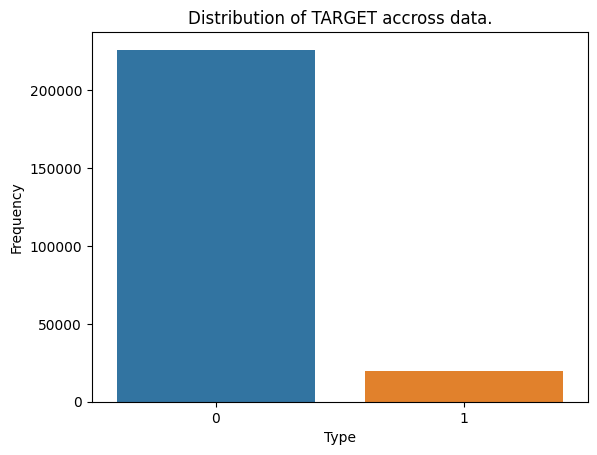

In [19]:
sns.countplot(data = eda_df, x = 'TARGET')
plt.title('Distribution of TARGET accross data.')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.show()

**We notice the data is highly imbalanced, the majority of applications, the clients managed to repay their loans.**

### Look at categorical features:

In [20]:
# Binary Flags:
flag_docs = ['FLAG_DOCUMENT_'+str(i) for i in range(2, 22)]
categorical_features = ['NAME_CONTRACT_TYPE',
                        'CODE_GENDER',
                        'FLAG_OWN_CAR',
                        'FLAG_OWN_REALTY',
                        'NAME_TYPE_SUITE',
                        'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE',
                        'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE',
                        'OCCUPATION_TYPE', 
                        'WEEKDAY_APPR_PROCESS_START',
                        'ORGANIZATION_TYPE',
                        'FLAG_MOBIL',
                        'FLAG_EMP_PHONE',
                        'FLAG_WORK_PHONE',
                        'FLAG_CONT_MOBILE',
                        'FLAG_PHONE',
                        'FLAG_EMAIL',
                        'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY',
                        'REG_REGION_NOT_LIVE_REGION',
                        'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY',
                        'REG_CITY_NOT_WORK_CITY',
                        'AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR',
                        
                       ]
categorical_features += flag_docs
print(len(categorical_features))

49


In [21]:
# Look at the values exists for each features:
for col in categorical_features:
    print(f"{col} existing categories: ")
    print(eda_df[col].unique())
    print('======='*10)

NAME_CONTRACT_TYPE existing categories: 
['Cash loans' 'Revolving loans']
CODE_GENDER existing categories: 
['F' 'M' 'XNA']
FLAG_OWN_CAR existing categories: 
['Y' 'N']
FLAG_OWN_REALTY existing categories: 
['N' 'Y']
NAME_TYPE_SUITE existing categories: 
['Unaccompanied' 'Spouse, partner' nan 'Family' 'Other_B' 'Other_A'
 'Children' 'Group of people']
NAME_INCOME_TYPE existing categories: 
['Pensioner' 'Working' 'Commercial associate' 'State servant' 'Student'
 'Unemployed' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE existing categories: 
['Secondary / secondary special' 'Lower secondary' 'Higher education'
 'Incomplete higher' 'Academic degree']
NAME_FAMILY_STATUS existing categories: 
['Widow' 'Married' 'Civil marriage' 'Single / not married' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE existing categories: 
['House / apartment' 'With parents' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE existing categories: 
[nan 'Laborers' 'D

#### Closer look on each feature:

NAME_CONTRACT_TYPE distribution:

NAME_CONTRACT_TYPE
Cash loans         0.904401
Revolving loans    0.095599
Name: proportion, dtype: float64

According to target:

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         0.916396
                    1         0.083604
Revolving loans     0         0.945786
                    1         0.054214
Name: proportion, dtype: float64



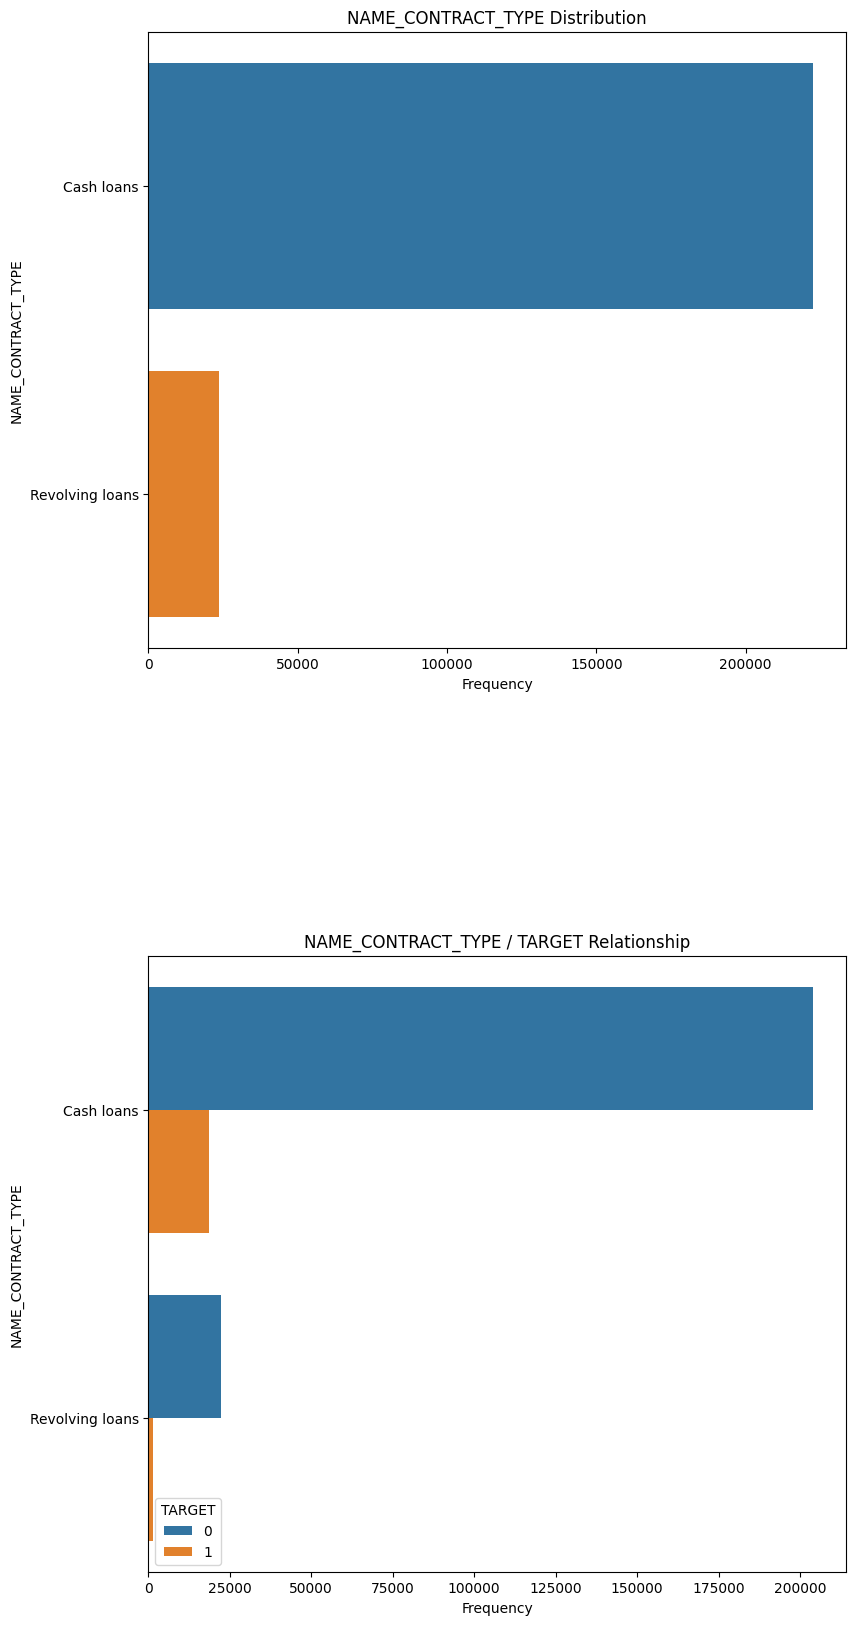

In [24]:
analyze_cat(categorical_features[0], eda_df)

FLAG_OWN_CAR distribution:

FLAG_OWN_CAR
N    0.659259
Y    0.340741
Name: proportion, dtype: float64

According to target:

FLAG_OWN_CAR  TARGET
N             0         0.914664
              1         0.085336
Y             0         0.927993
              1         0.072007
Name: proportion, dtype: float64



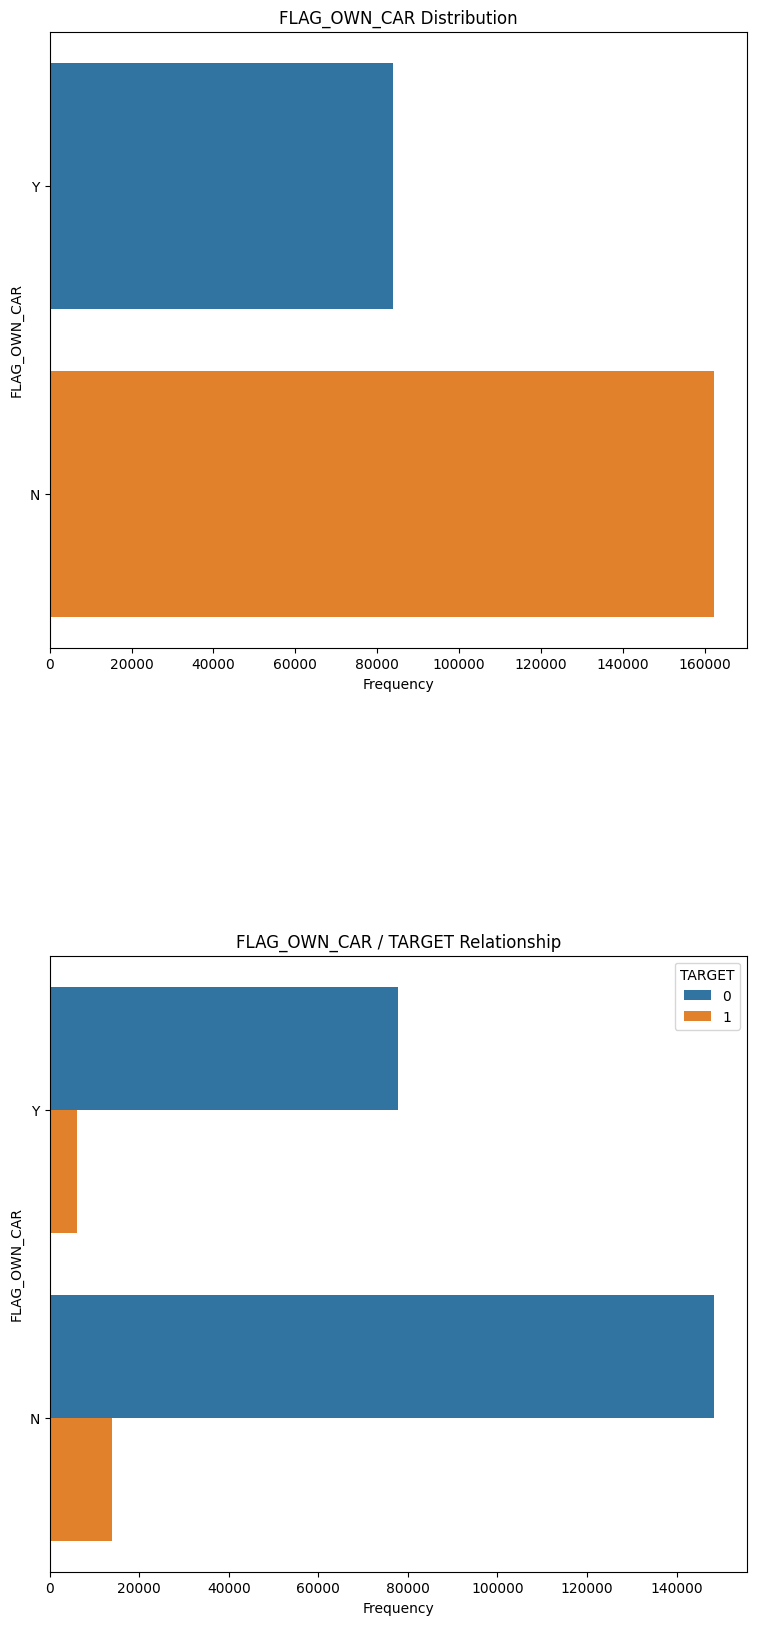

In [26]:
analyze_cat(categorical_features[2], eda_df)

FLAG_OWN_REALTY distribution:

FLAG_OWN_REALTY
Y    0.694461
N    0.305539
Name: proportion, dtype: float64

According to target:

FLAG_OWN_REALTY  TARGET
N                0         0.916344
                 1         0.083656
Y                0         0.920465
                 1         0.079535
Name: proportion, dtype: float64



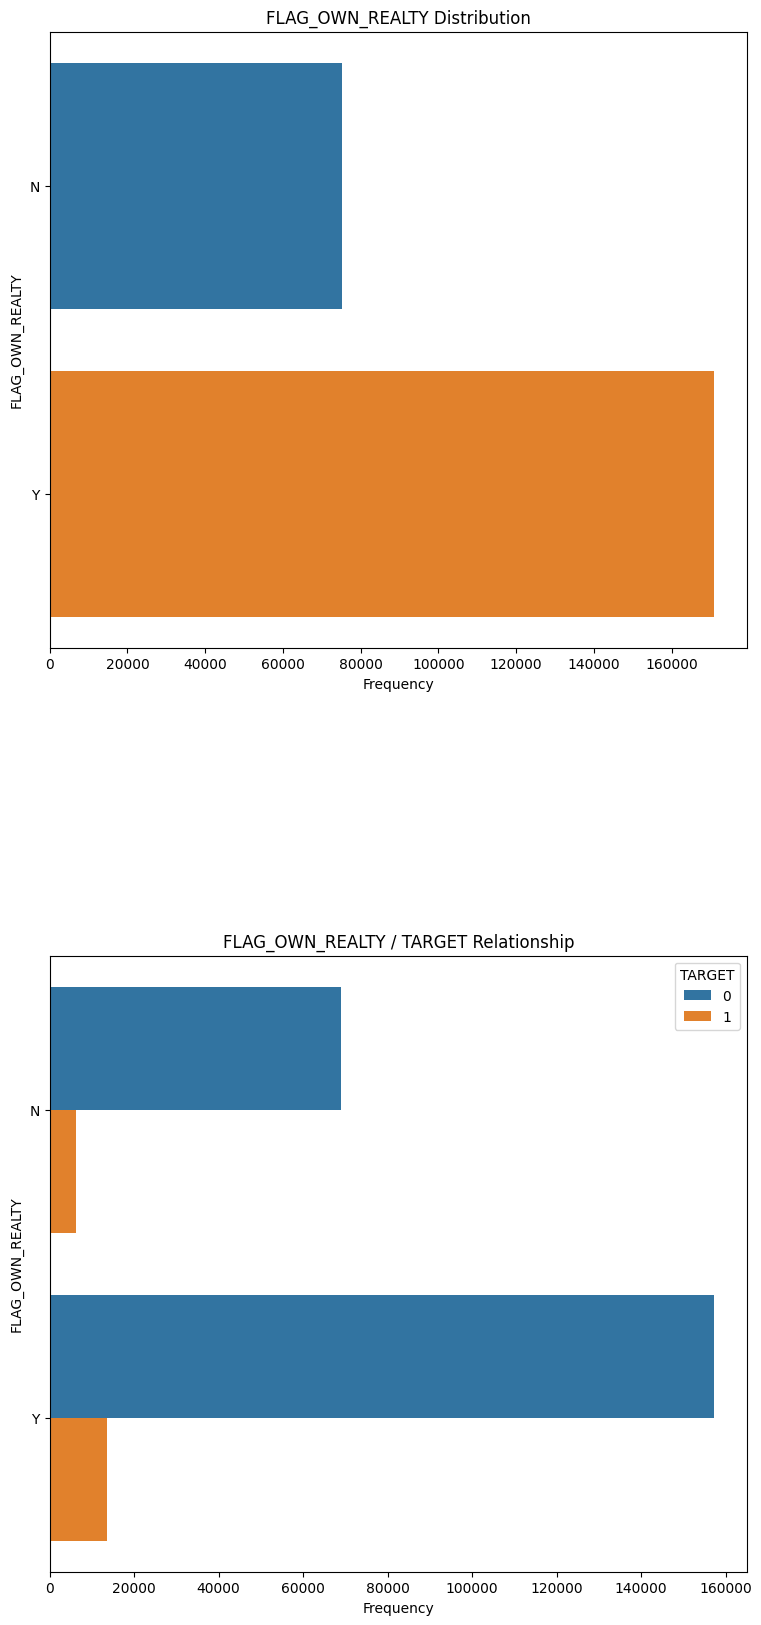

In [27]:
analyze_cat(categorical_features[3], eda_df)

NAME_TYPE_SUITE distribution:

NAME_TYPE_SUITE
Unaccompanied      0.811314
Family             0.131229
Spouse, partner    0.037185
Children           0.010700
Other_B            0.005764
Other_A            0.002911
Group of people    0.000898
Name: proportion, dtype: float64

According to target:

NAME_TYPE_SUITE  TARGET
Children         0         0.922930
                 1         0.077070
Family           0         0.924096
                 1         0.075904
Group of people  0         0.909091
                 1         0.090909
Other_A          0         0.907433
                 1         0.092567
Other_B          0         0.902975
                 1         0.097025
Spouse, partner  0         0.921067
                 1         0.078933
Unaccompanied    0         0.918311
                 1         0.081689
Name: proportion, dtype: float64



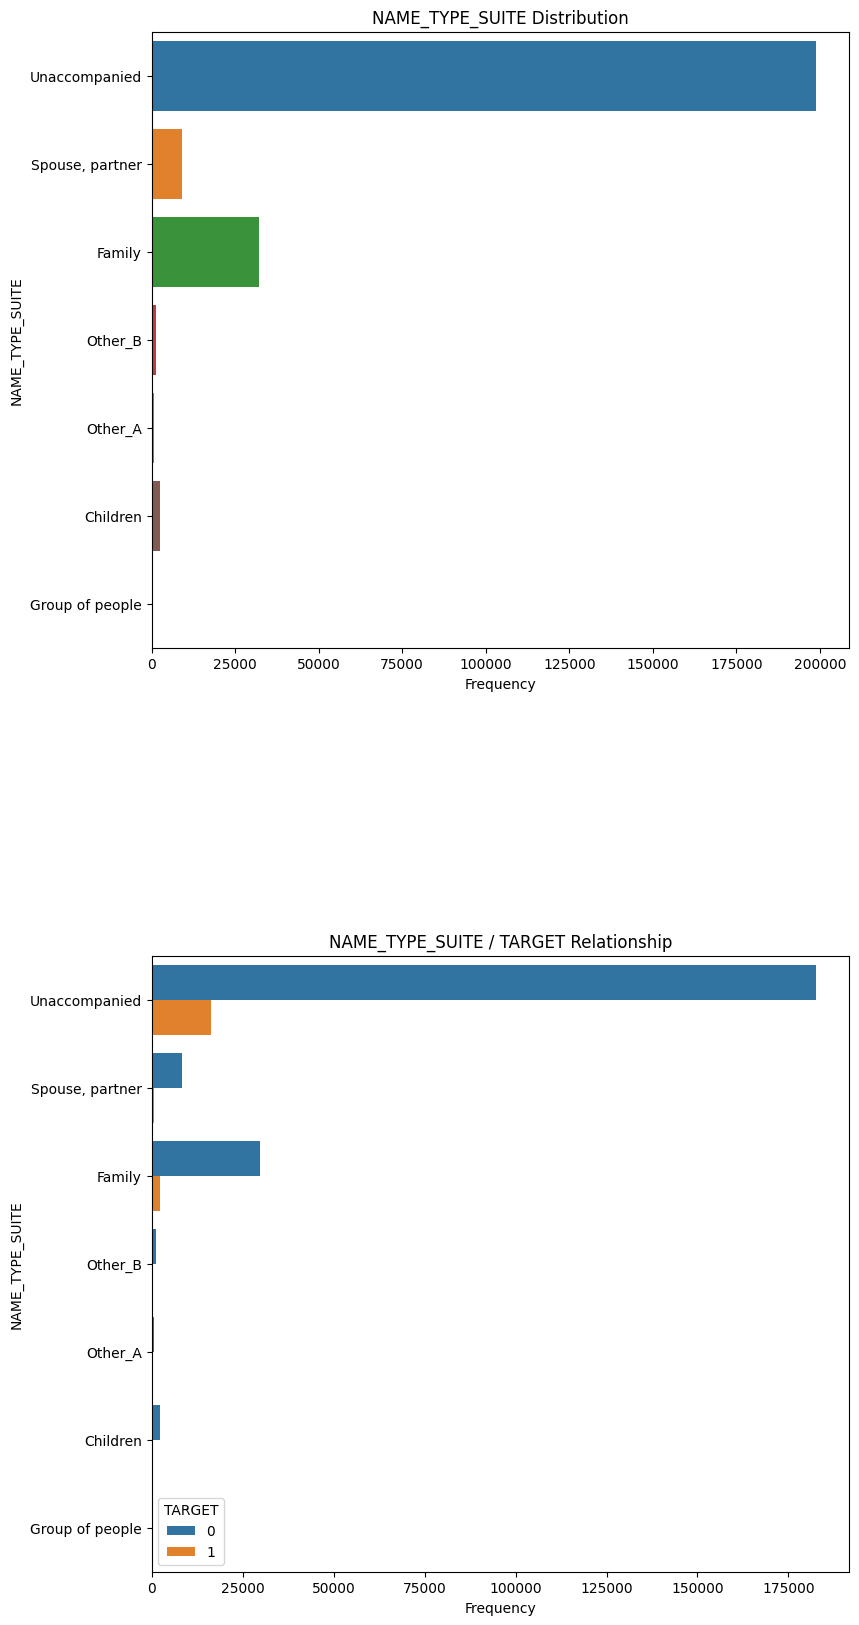

In [28]:
analyze_cat(categorical_features[4], eda_df)

NAME_INCOME_TYPE distribution:

NAME_INCOME_TYPE
Working                 0.515955
Commercial associate    0.233078
Pensioner               0.180132
State servant           0.070652
Unemployed              0.000077
Student                 0.000061
Businessman             0.000037
Maternity leave         0.000008
Name: proportion, dtype: float64

According to target:

NAME_INCOME_TYPE      TARGET
Businessman           0         1.000000
Commercial associate  0         0.924327
                      1         0.075673
Maternity leave       0         0.500000
                      1         0.500000
Pensioner             0         0.945886
                      1         0.054114
State servant         0         0.941660
                      1         0.058340
Student               0         1.000000
Unemployed            0         0.684211
                      1         0.315789
Working               0         0.904529
                      1         0.095471
Name: proportion, dtype: flo

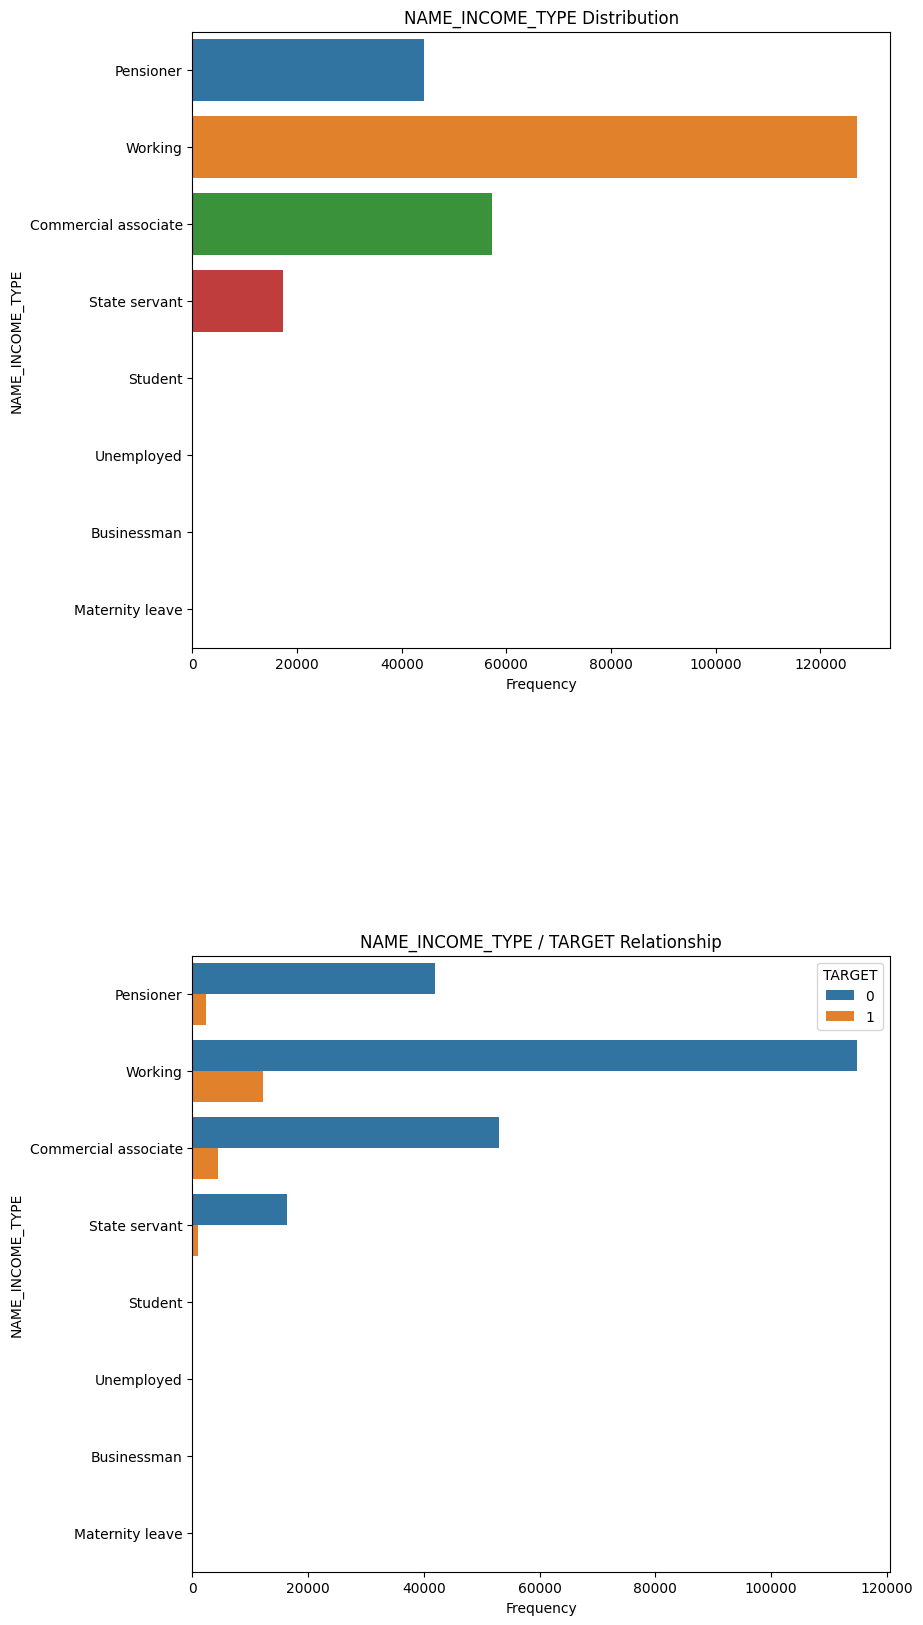

In [29]:
analyze_cat(categorical_features[5], eda_df)

NAME_EDUCATION_TYPE distribution:

NAME_EDUCATION_TYPE
Secondary / secondary special    0.709416
Higher education                 0.244138
Incomplete higher                0.033377
Lower secondary                  0.012540
Academic degree                  0.000528
Name: proportion, dtype: float64

According to target:

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         0.976923
                               1         0.023077
Higher education               0         0.946004
                               1         0.053996
Incomplete higher              0         0.914018
                               1         0.085982
Lower secondary                0         0.890438
                               1         0.109562
Secondary / secondary special  0         0.910693
                               1         0.089307
Name: proportion, dtype: float64



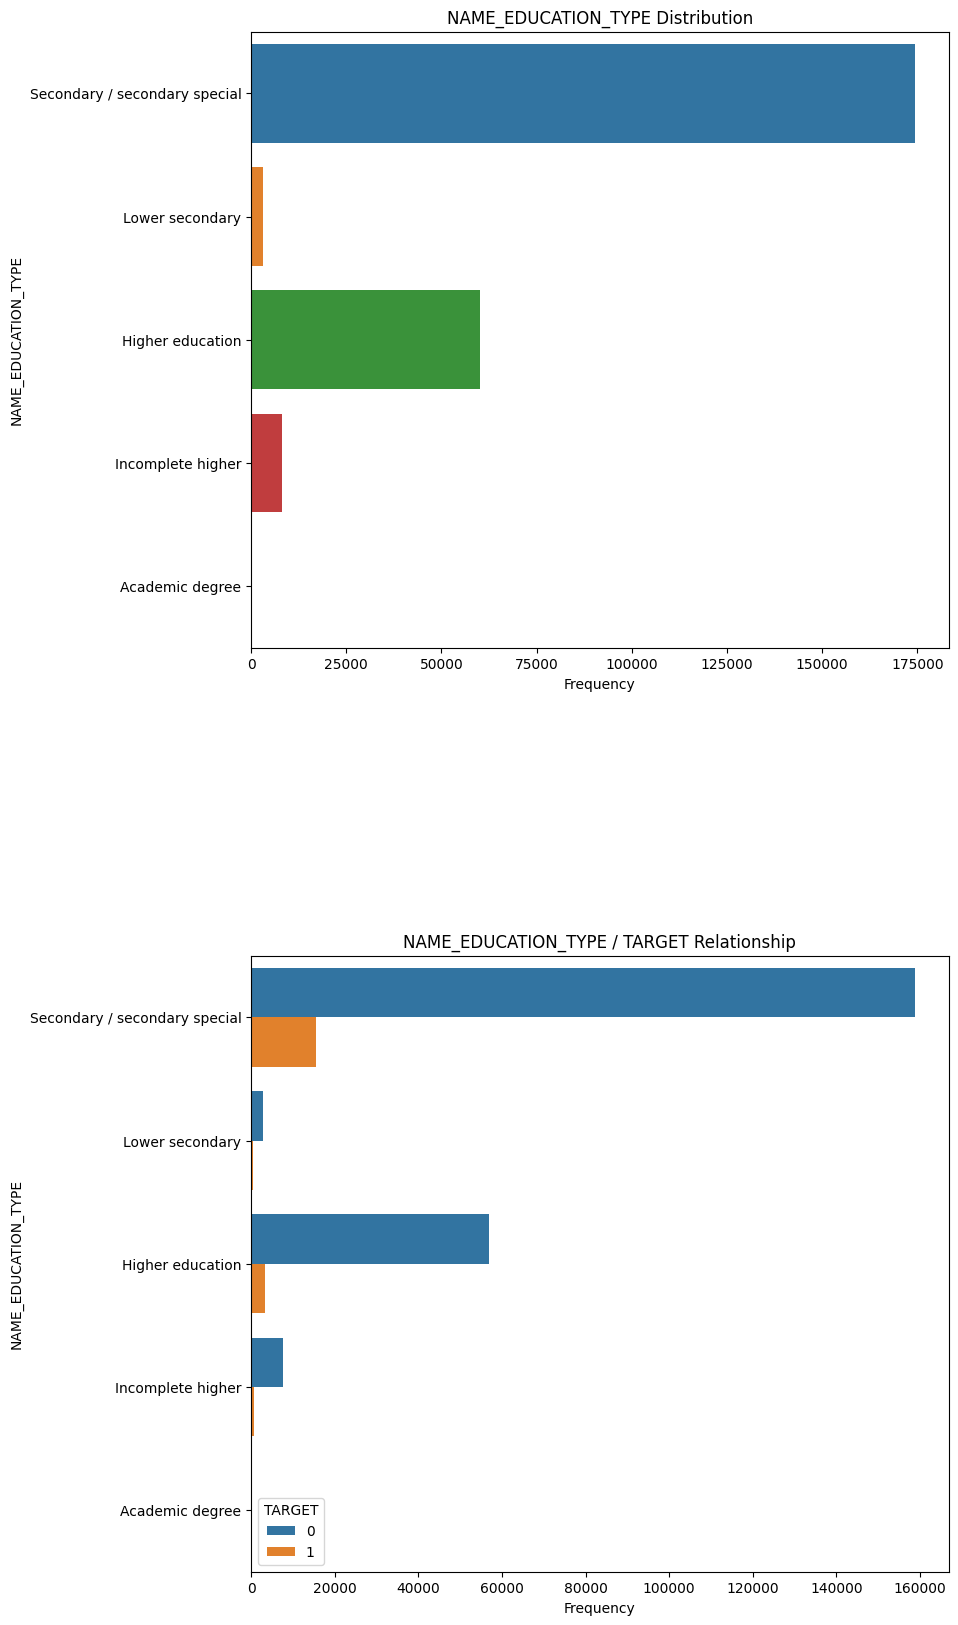

In [30]:
analyze_cat(categorical_features[6], eda_df)

NAME_FAMILY_STATUS distribution:

NAME_FAMILY_STATUS
Married                 0.639491
Single / not married    0.147434
Civil marriage          0.096916
Separated               0.064246
Widow                   0.051909
Unknown                 0.000004
Name: proportion, dtype: float64

According to target:

NAME_FAMILY_STATUS    TARGET
Civil marriage        0         0.900512
                      1         0.099488
Married               0         0.924275
                      1         0.075725
Separated             0         0.917684
                      1         0.082316
Single / not married  0         0.901958
                      1         0.098042
Unknown               0         1.000000
Widow                 0         0.942522
                      1         0.057478
Name: proportion, dtype: float64



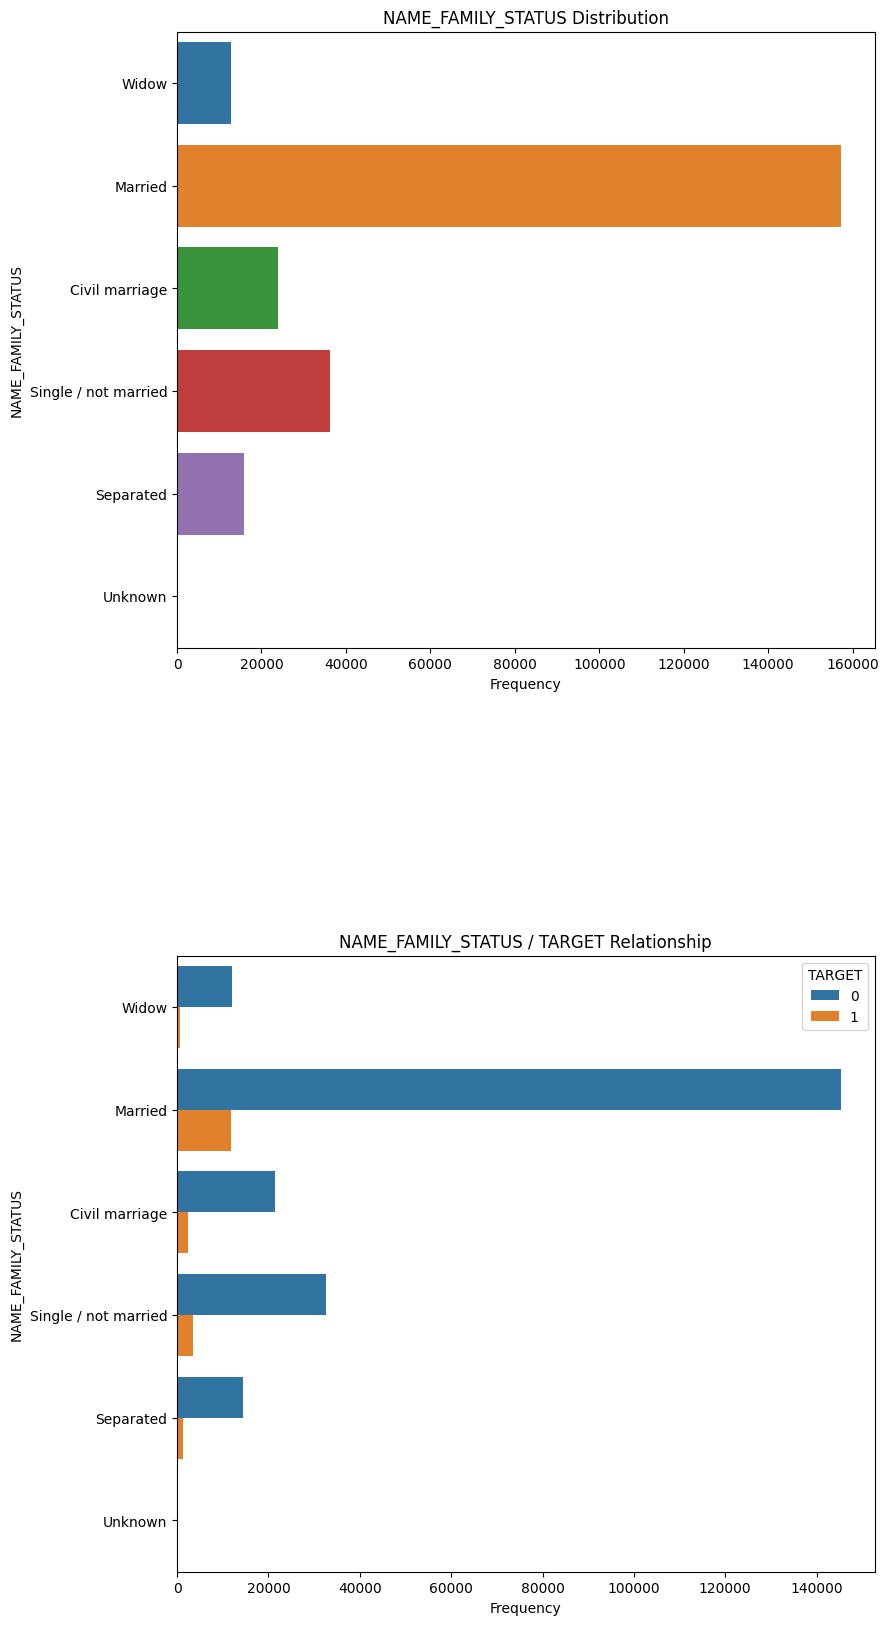

In [31]:
analyze_cat(categorical_features[7], eda_df)

NAME_HOUSING_TYPE distribution:

NAME_HOUSING_TYPE
House / apartment      0.887731
With parents           0.048120
Municipal apartment    0.036039
Rented apartment       0.015918
Office apartment       0.008504
Co-op apartment        0.003687
Name: proportion, dtype: float64

According to target:

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         0.918412
                     1         0.081588
House / apartment    0         0.921828
                     1         0.078172
Municipal apartment  0         0.916309
                     1         0.083691
Office apartment     0         0.933556
                     1         0.066444
Rented apartment     0         0.879213
                     1         0.120787
With parents         0         0.883764
                     1         0.116236
Name: proportion, dtype: float64



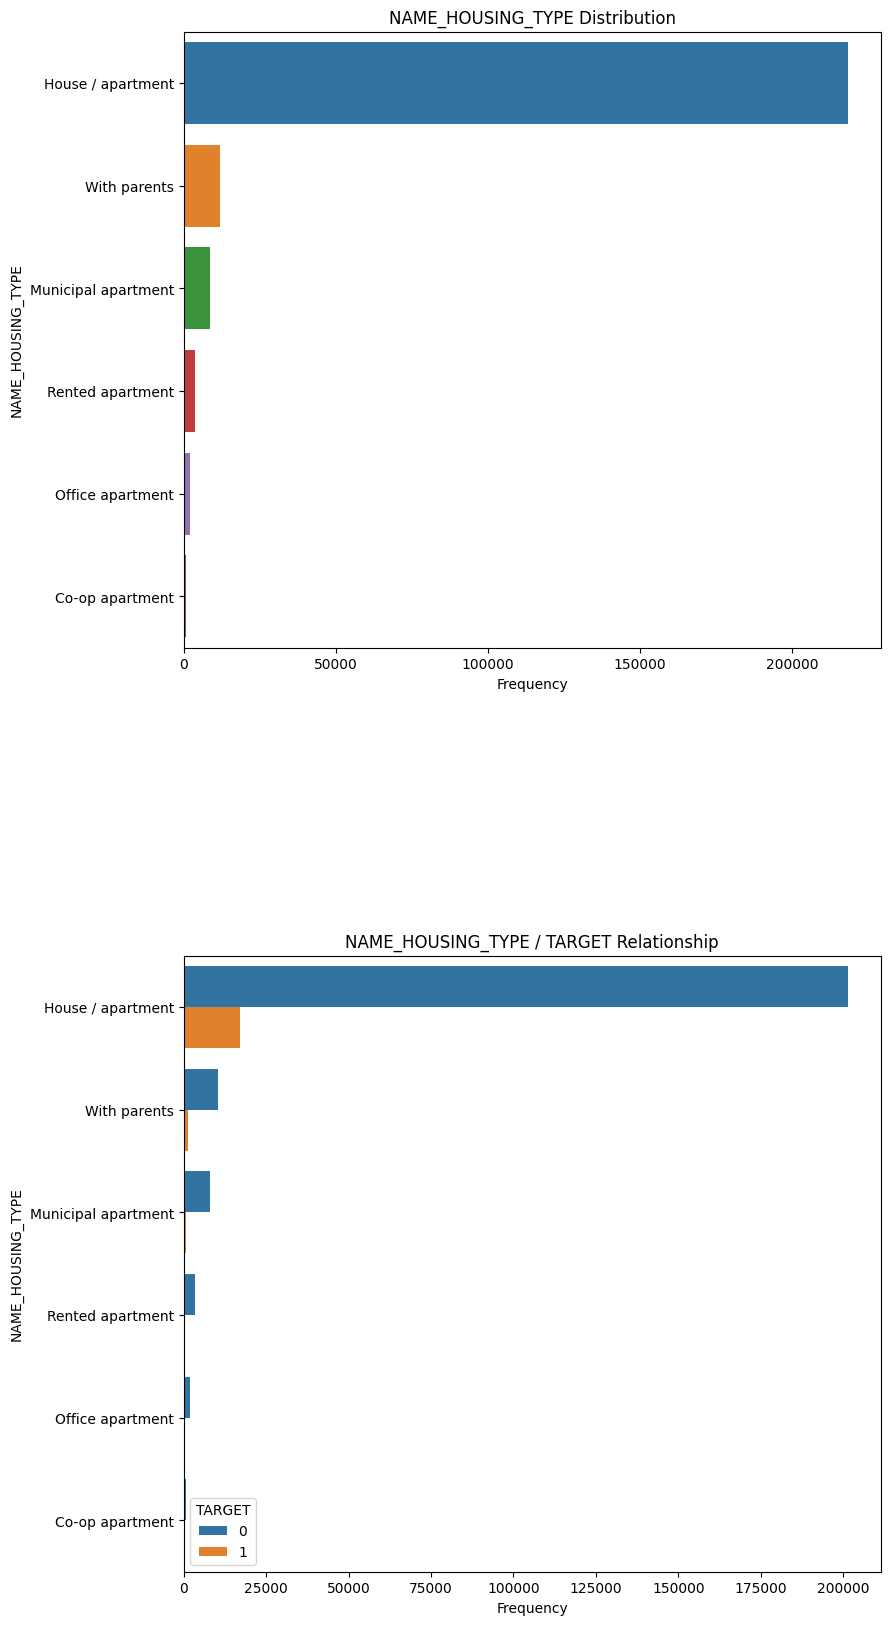

In [32]:
analyze_cat(categorical_features[8], eda_df)

OCCUPATION_TYPE distribution:

OCCUPATION_TYPE
Laborers                 0.261696
Sales staff              0.151697
Core staff               0.130502
Managers                 0.101627
Drivers                  0.088134
High skill tech staff    0.054351
Accountants              0.046465
Medicine staff           0.040361
Security staff           0.031823
Cooking staff            0.027756
Cleaning staff           0.022036
Private service staff    0.012522
Low-skill Laborers       0.009810
Waiters/barmen staff     0.006341
Secretaries              0.006270
Realty agents            0.003529
HR staff                 0.002647
IT staff                 0.002433
Name: proportion, dtype: float64

According to target:

OCCUPATION_TYPE        TARGET
Accountants            0         0.951070
                       1         0.048930
Cleaning staff         0         0.903815
                       1         0.096185
Cooking staff          0         0.893985
                       1         0.106015
Cor

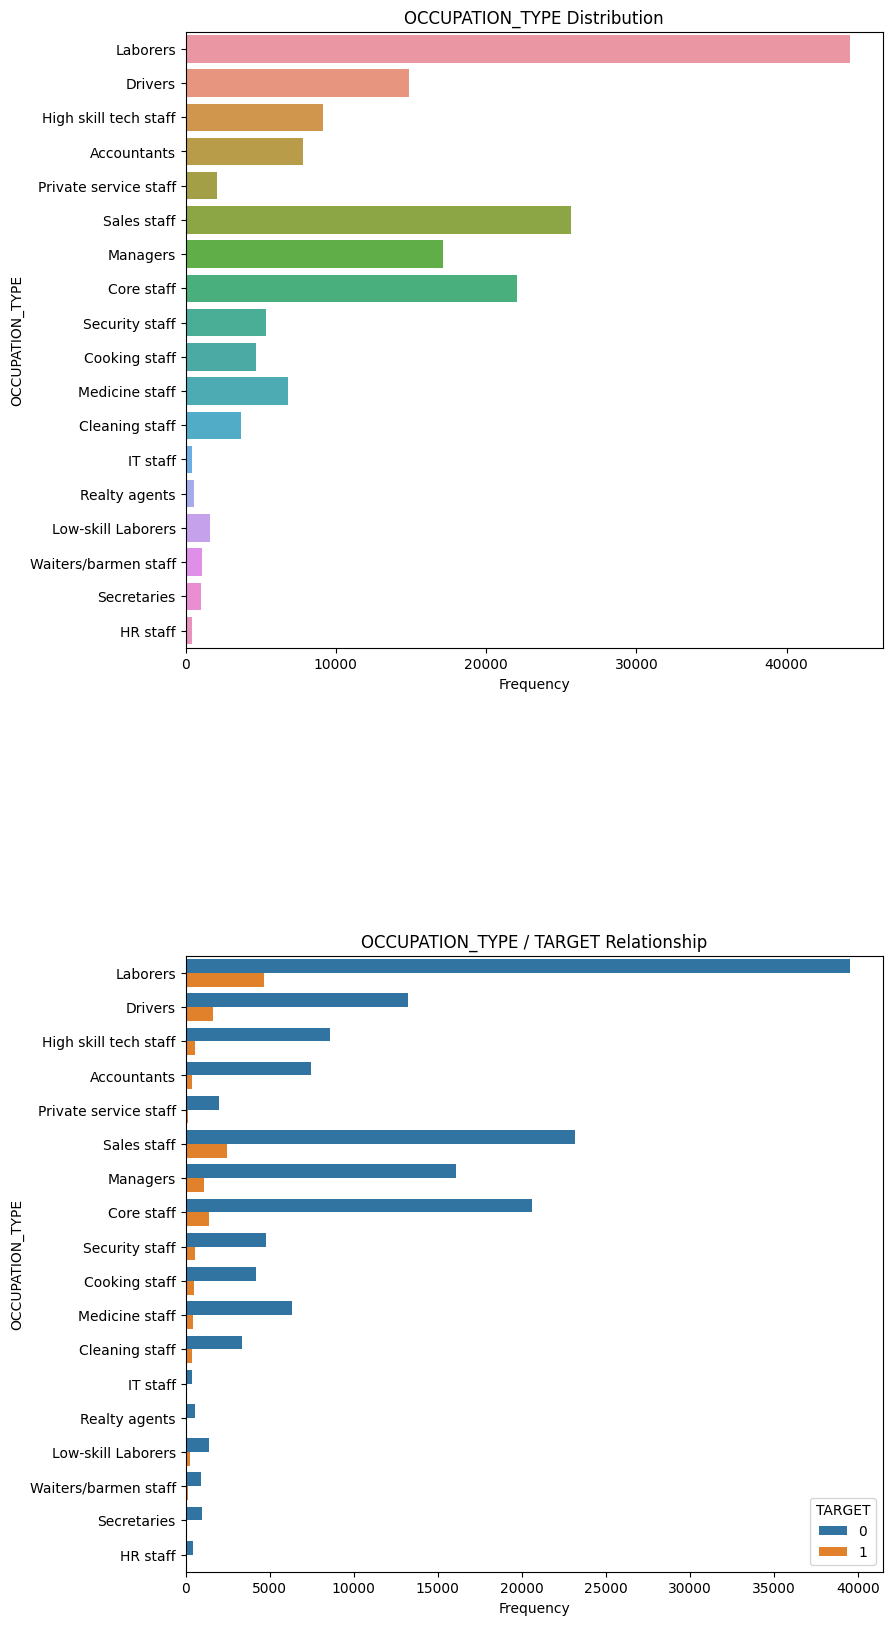

In [33]:
analyze_cat(categorical_features[9], eda_df)

WEEKDAY_APPR_PROCESS_START distribution:

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175311
WEDNESDAY    0.168836
THURSDAY     0.164991
MONDAY       0.164645
FRIDAY       0.163495
SATURDAY     0.110456
SUNDAY       0.052267
Name: proportion, dtype: float64

According to target:

WEEKDAY_APPR_PROCESS_START  TARGET
FRIDAY                      0         0.917804
                            1         0.082196
MONDAY                      0         0.921786
                            1         0.078214
SATURDAY                    0         0.921724
                            1         0.078276
SUNDAY                      0         0.921450
                            1         0.078550
THURSDAY                    0         0.918820
                            1         0.081180
TUESDAY                     0         0.916759
                            1         0.083241
WEDNESDAY                   0         0.918623
                            1         0.081377
Name: proportion, dtype: flo

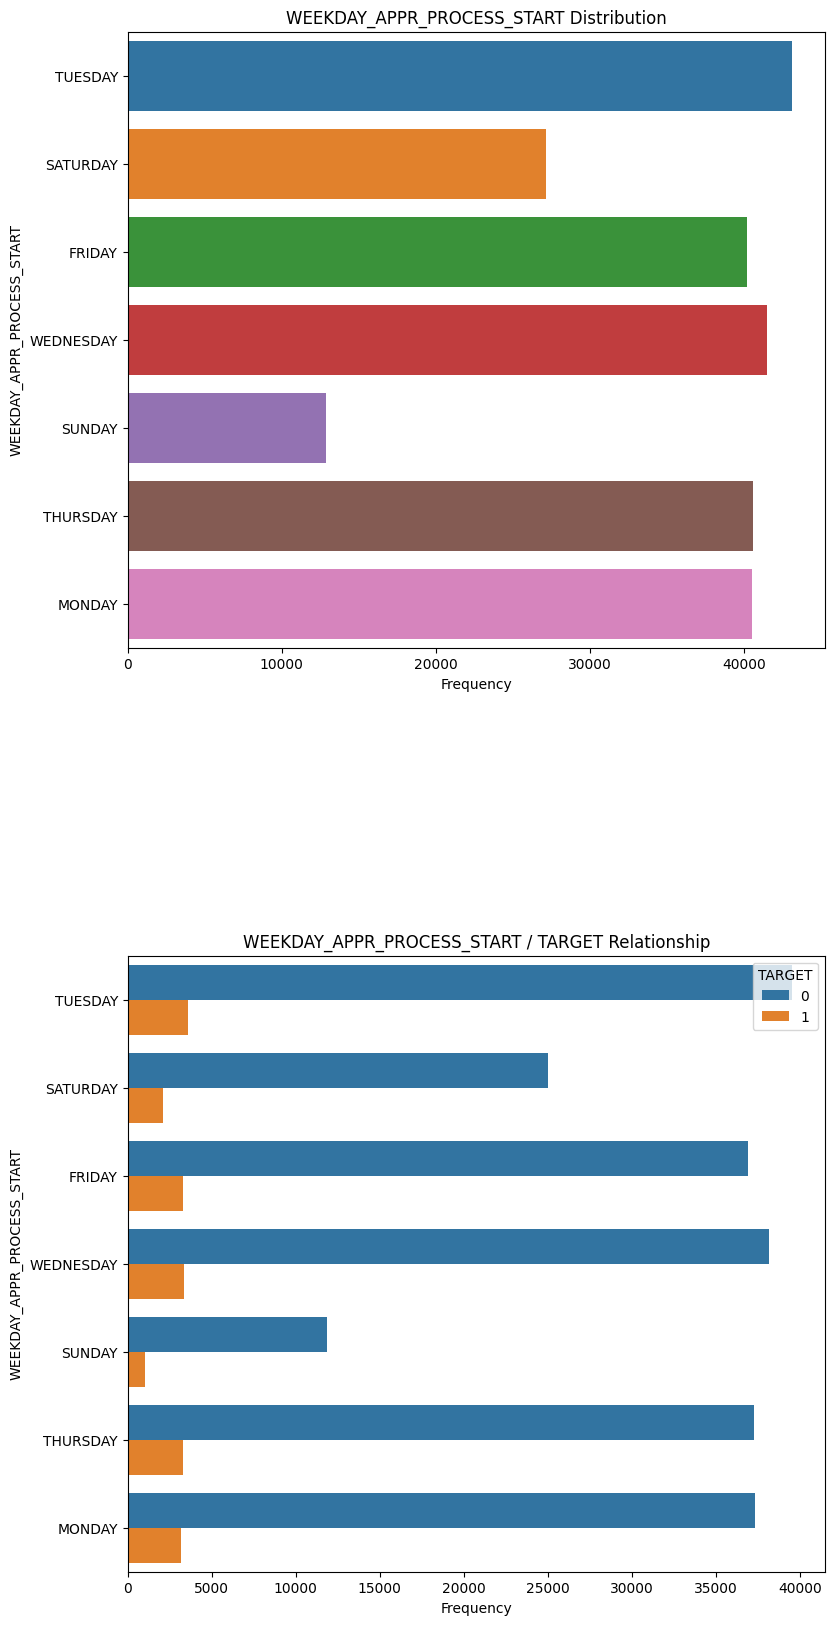

In [34]:
analyze_cat(categorical_features[10], eda_df)

In [ ]:
analyze_cat(categorical_features[11], eda_df)

ORGANIZATION_TYPE distribution:

ORGANIZATION_TYPE
Business Entity Type 3    0.220769
XNA                       0.180173
Self-employed             0.124793
Other                     0.054474
Medicine                  0.036361
Business Entity Type 2    0.034458
Government                0.033930
School                    0.029084
Trade: type 7             0.025381
Kindergarten              0.022426
Construction              0.022048
Business Entity Type 1    0.019573
Transport: type 4         0.017581
Trade: type 3             0.011329
Industry: type 9          0.010926
Industry: type 3          0.010597
Security                  0.010479
Housing                   0.009593
Industry: type 11         0.008894
Military                  0.008557
Bank                      0.008057
Agriculture               0.008004
Police                    0.007553
Transport: type 2         0.007170
Postal                    0.006943
Security Ministries       0.006508
Trade: type 2             0.006199
Rest

FLAG_MOBIL distribution:

FLAG_MOBIL
1    0.999996
0    0.000004
Name: proportion, dtype: float64

According to target:

FLAG_MOBIL  TARGET
0           0         1.000000
1           0         0.919206
            1         0.080794
Name: proportion, dtype: float64



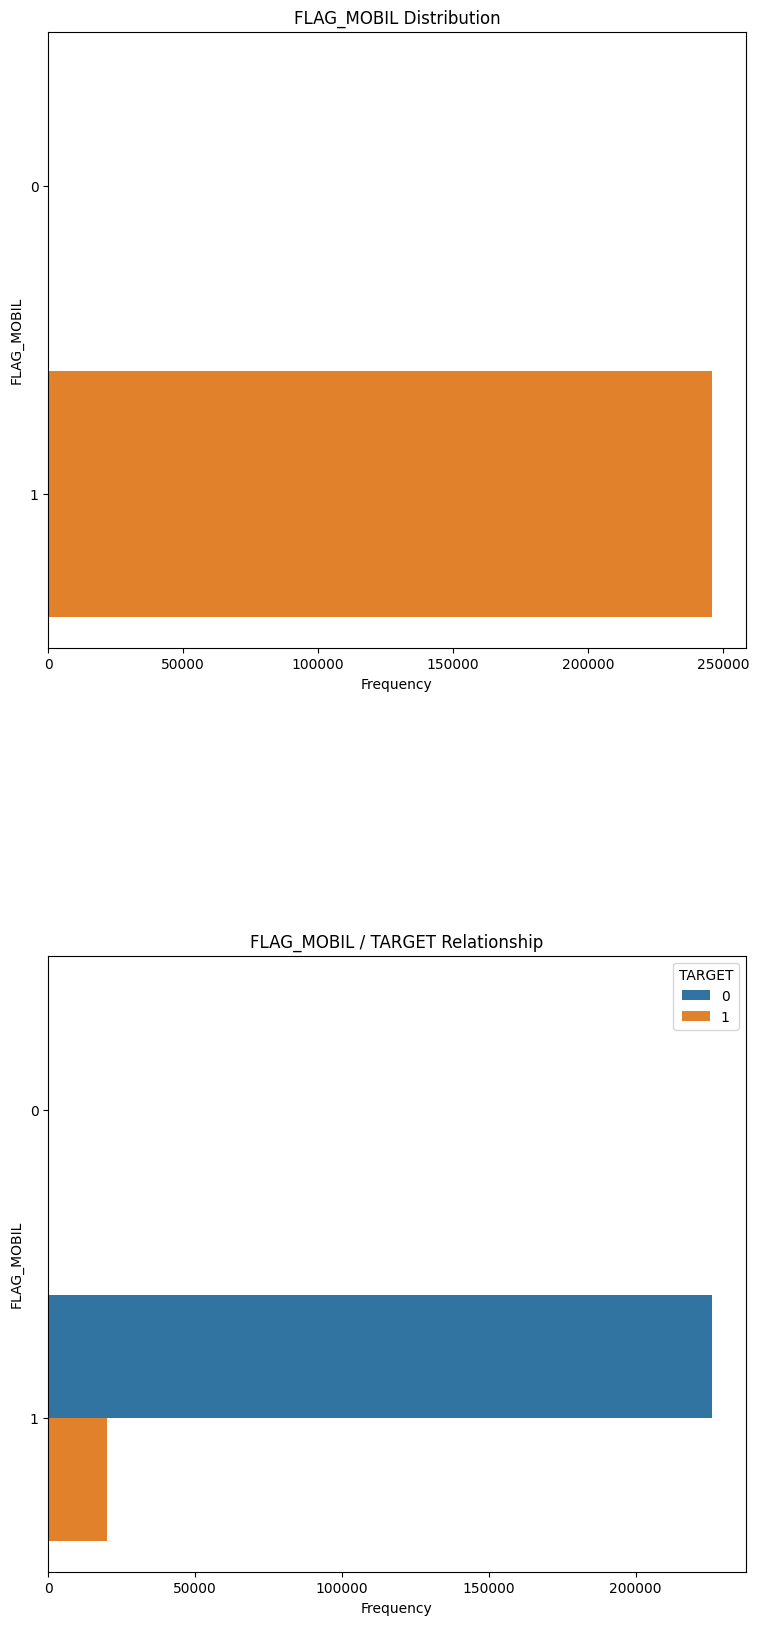

In [36]:
analyze_cat(categorical_features[12], eda_df)

FLAG_EMP_PHONE distribution:

FLAG_EMP_PHONE
1    0.819786
0    0.180214
Name: proportion, dtype: float64

According to target:

FLAG_EMP_PHONE  TARGET
0               0         0.945753
                1         0.054247
1               0         0.913370
                1         0.086630
Name: proportion, dtype: float64



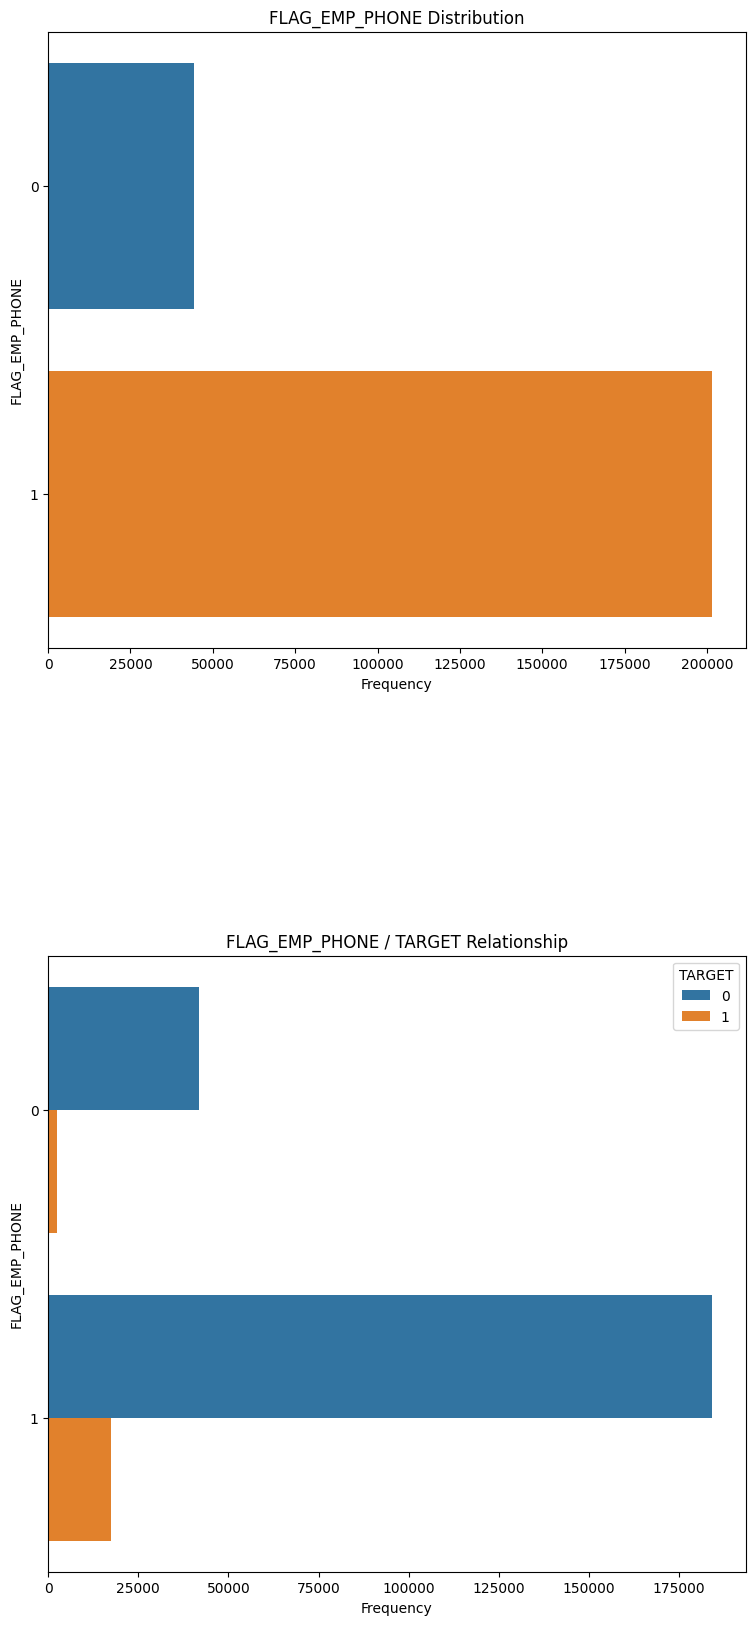

In [37]:
analyze_cat(categorical_features[13], eda_df)

FLAG_WORK_PHONE distribution:

FLAG_WORK_PHONE
0    0.801072
1    0.198928
Name: proportion, dtype: float64

According to target:

FLAG_WORK_PHONE  TARGET
0                0         0.923154
                 1         0.076846
1                0         0.903306
                 1         0.096694
Name: proportion, dtype: float64



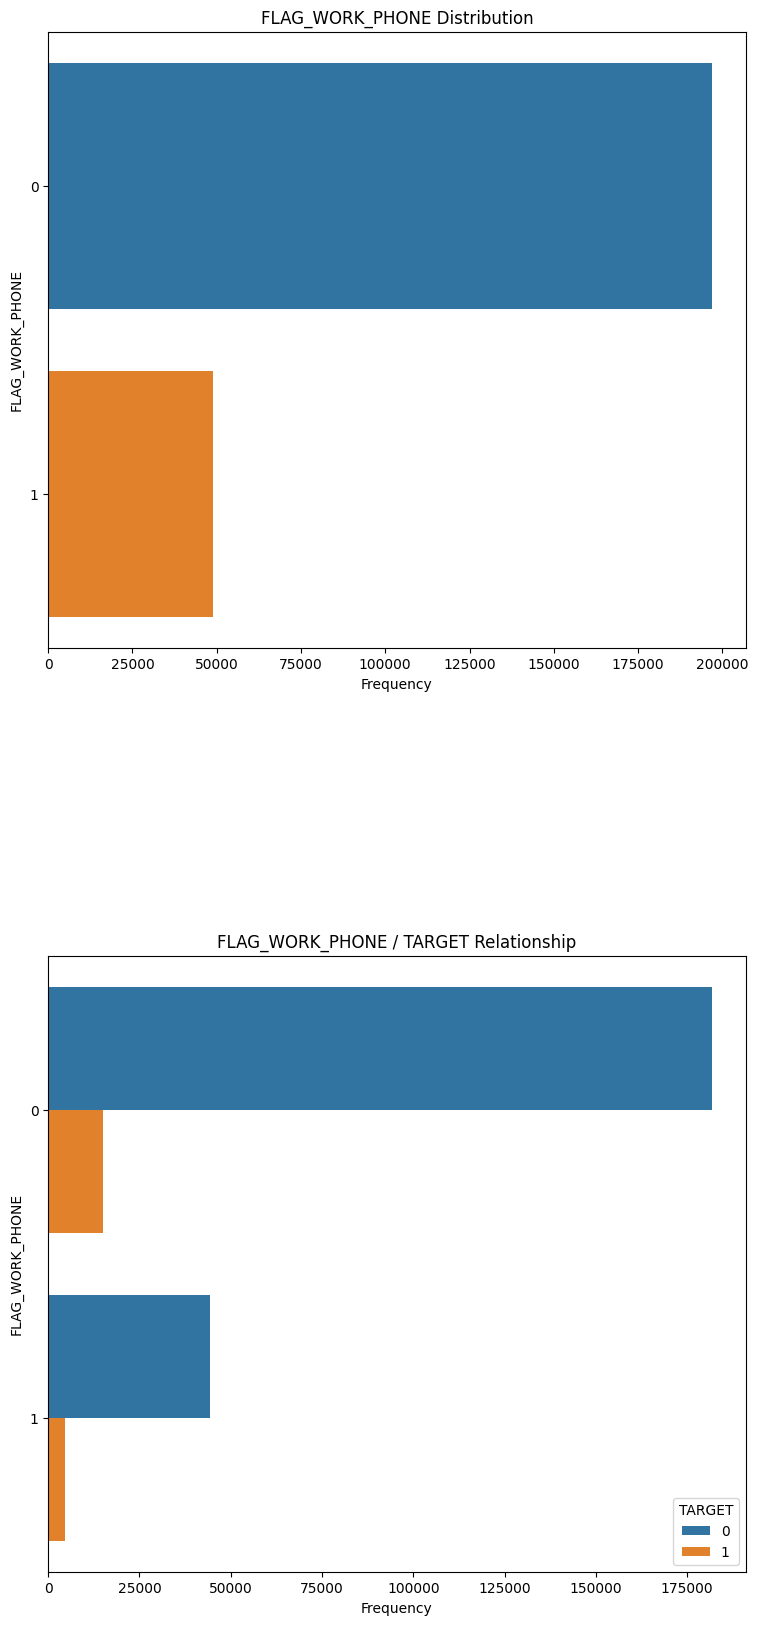

In [38]:
analyze_cat(categorical_features[14], eda_df)

FLAG_CONT_MOBILE distribution:

FLAG_CONT_MOBILE
1    0.998114
0    0.001886
Name: proportion, dtype: float64

According to target:

FLAG_CONT_MOBILE  TARGET
0                 0         0.922414
                  1         0.077586
1                 0         0.919200
                  1         0.080800
Name: proportion, dtype: float64



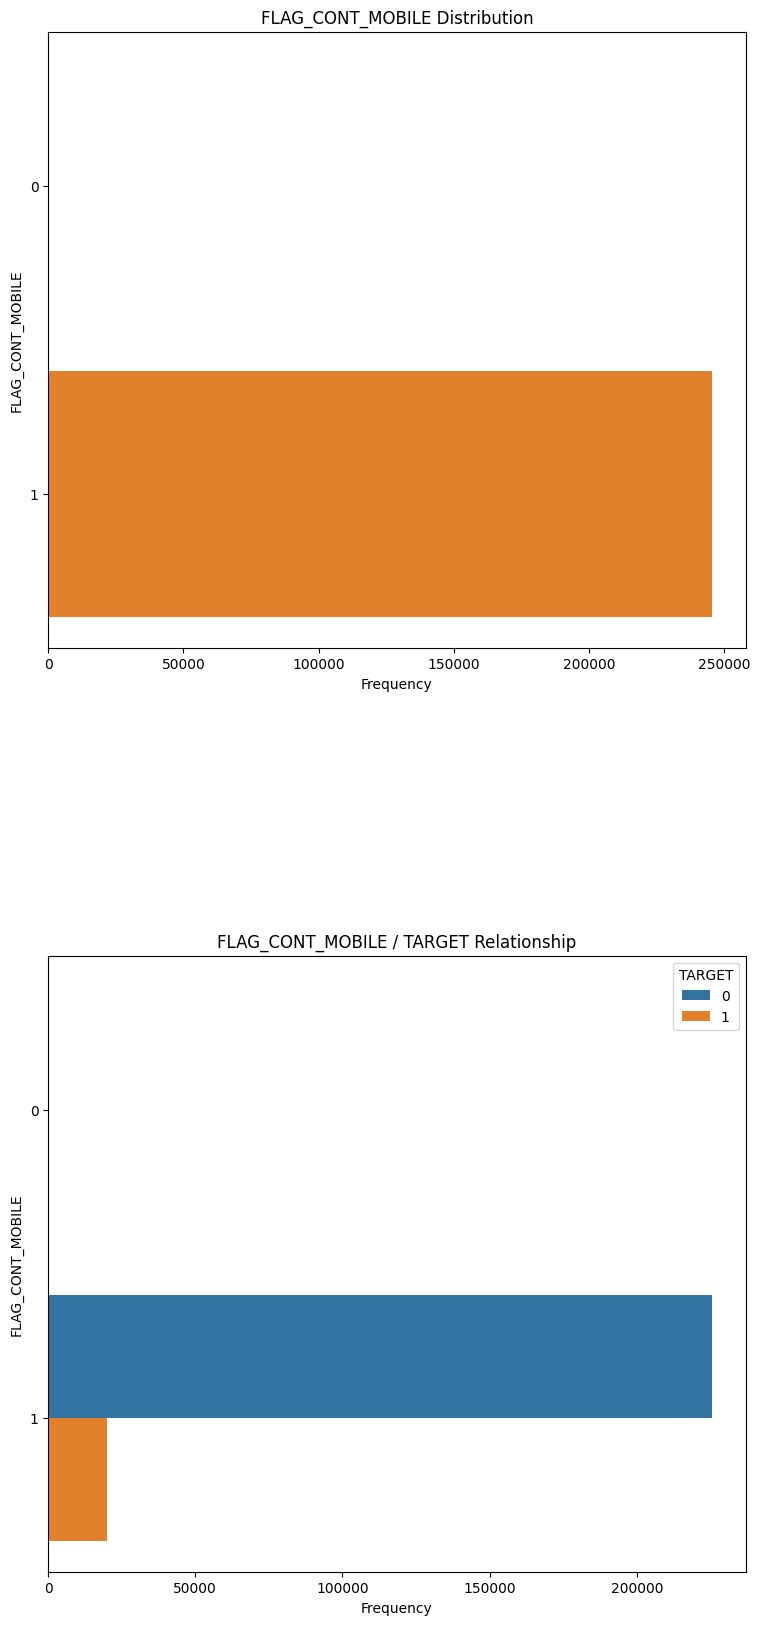

In [39]:
analyze_cat(categorical_features[15], eda_df)

FLAG_PHONE distribution:

FLAG_PHONE
0    0.719334
1    0.280666
Name: proportion, dtype: float64

According to target:

FLAG_PHONE  TARGET
0           0         0.915191
            1         0.084809
1           0         0.929496
            1         0.070504
Name: proportion, dtype: float64



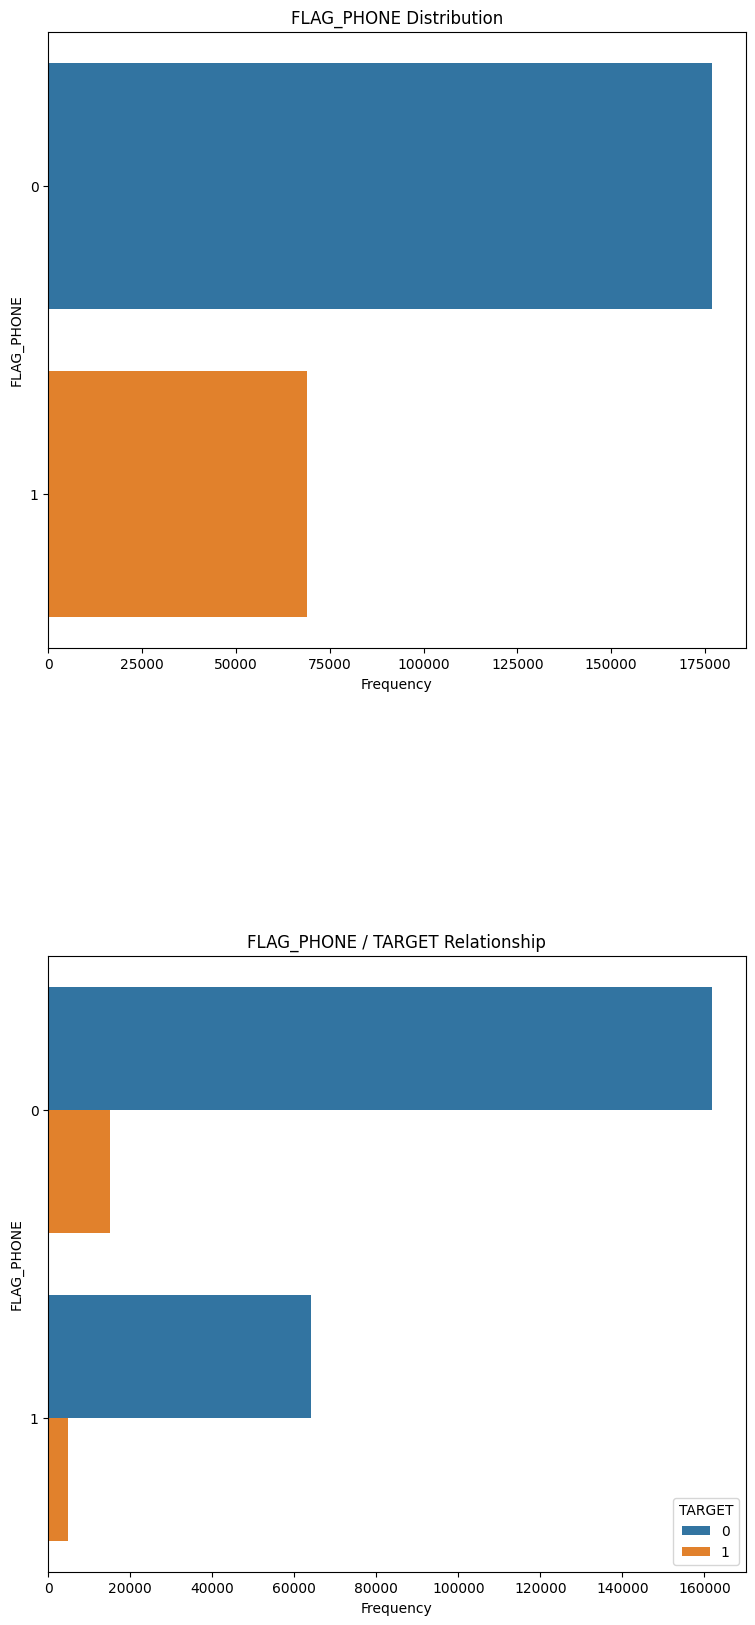

In [40]:
analyze_cat(categorical_features[16], eda_df)

FLAG_EMAIL distribution:

FLAG_EMAIL
0    0.943038
1    0.056962
Name: proportion, dtype: float64

According to target:

FLAG_EMAIL  TARGET
0           0         0.919205
            1         0.080795
1           0         0.919218
            1         0.080782
Name: proportion, dtype: float64



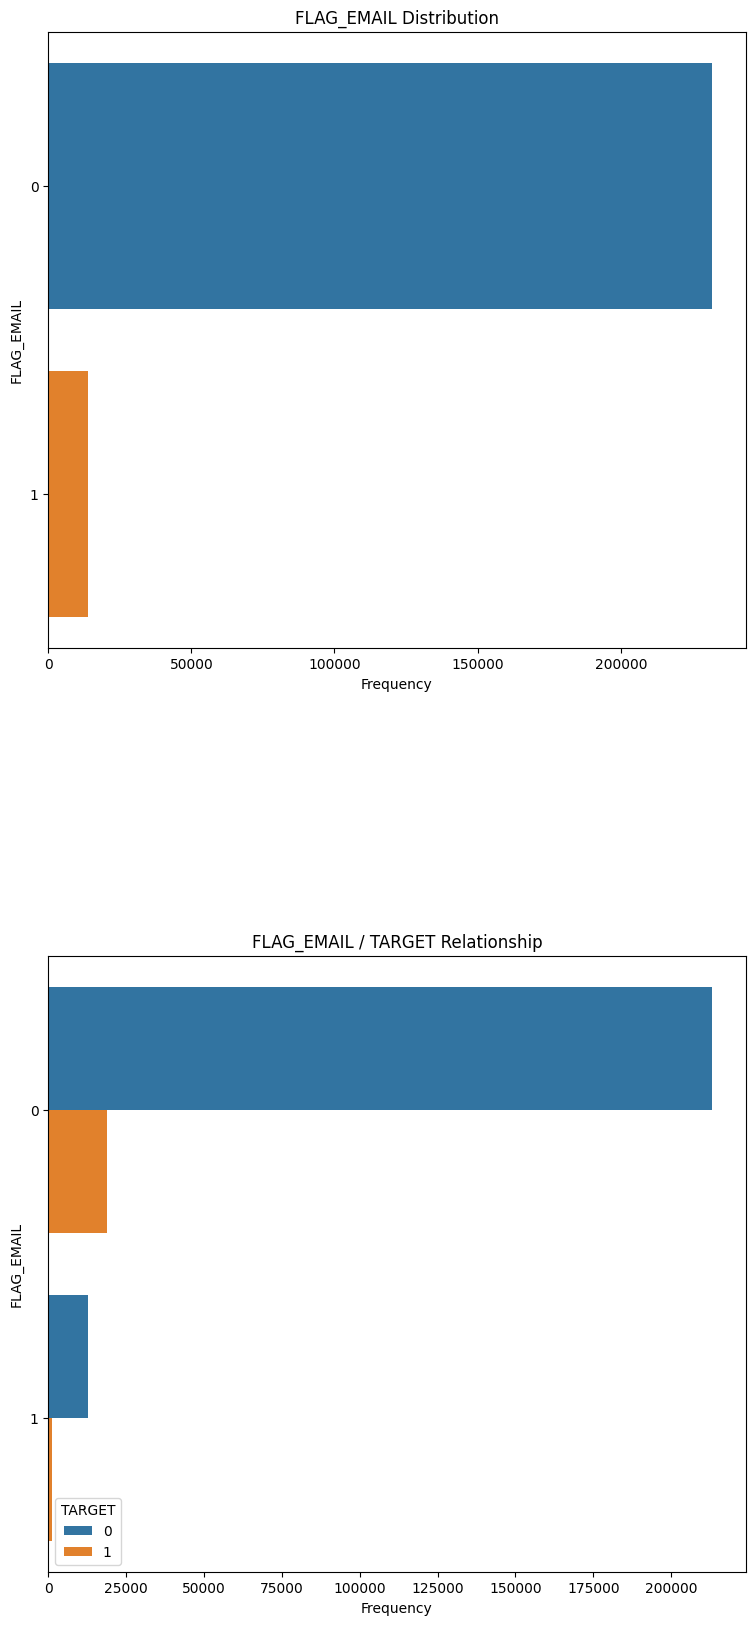

In [41]:
analyze_cat(categorical_features[17], eda_df)

REGION_RATING_CLIENT distribution:

REGION_RATING_CLIENT
2    0.738147
3    0.157235
1    0.104619
Name: proportion, dtype: float64

According to target:

REGION_RATING_CLIENT  TARGET
1                     0         0.951004
                      1         0.048996
2                     0         0.921102
                      1         0.078898
3                     0         0.889145
                      1         0.110855
Name: proportion, dtype: float64



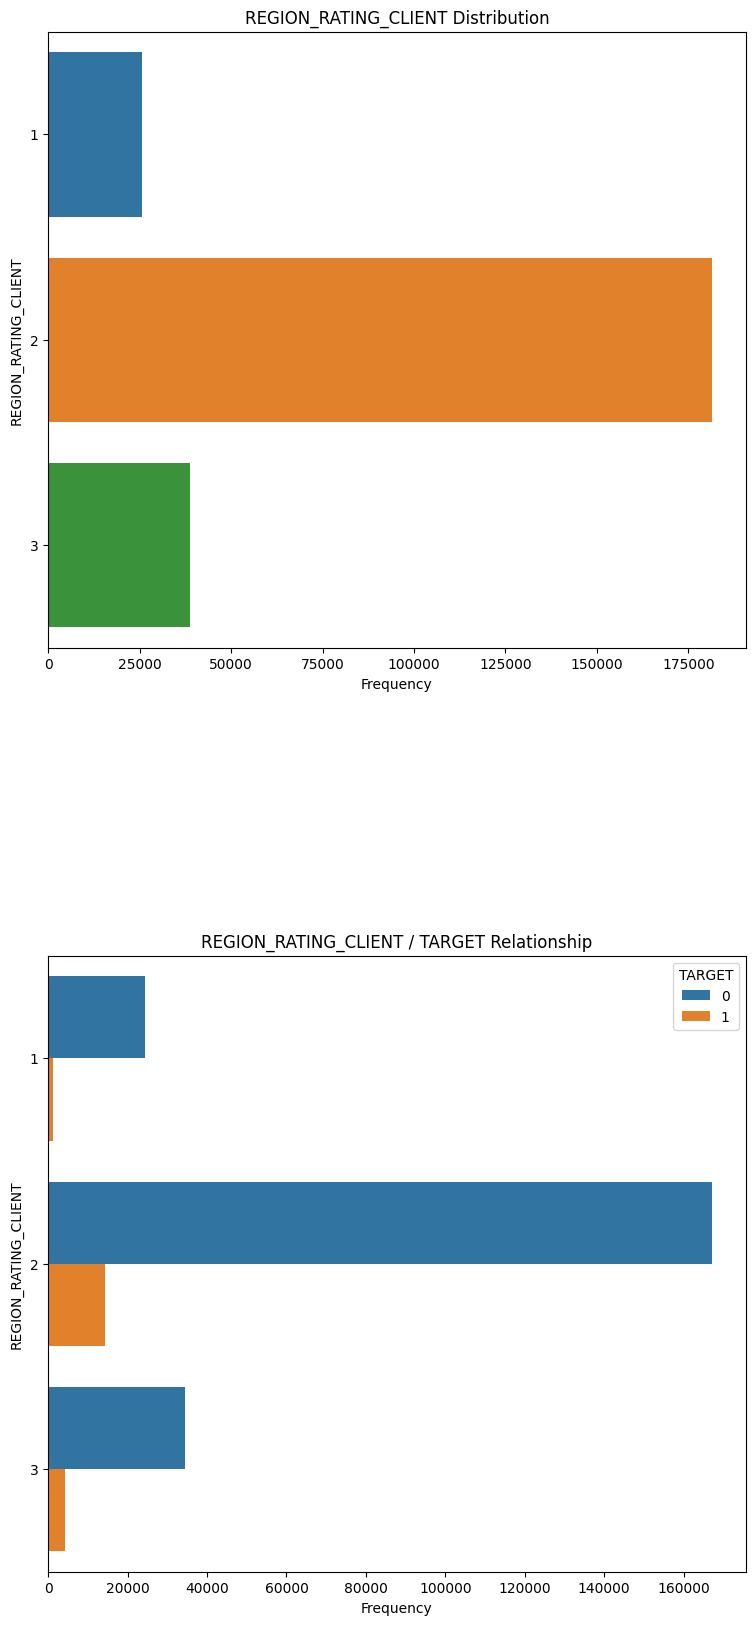

In [42]:
analyze_cat(categorical_features[18], eda_df)

REGION_RATING_CLIENT_W_CITY distribution:

REGION_RATING_CLIENT_W_CITY
2    0.746285
3    0.142699
1    0.111017
Name: proportion, dtype: float64

According to target:

REGION_RATING_CLIENT_W_CITY  TARGET
1                            0         0.951009
                             1         0.048991
2                            0         0.920868
                             1         0.079132
3                            0         0.885771
                             1         0.114229
Name: proportion, dtype: float64



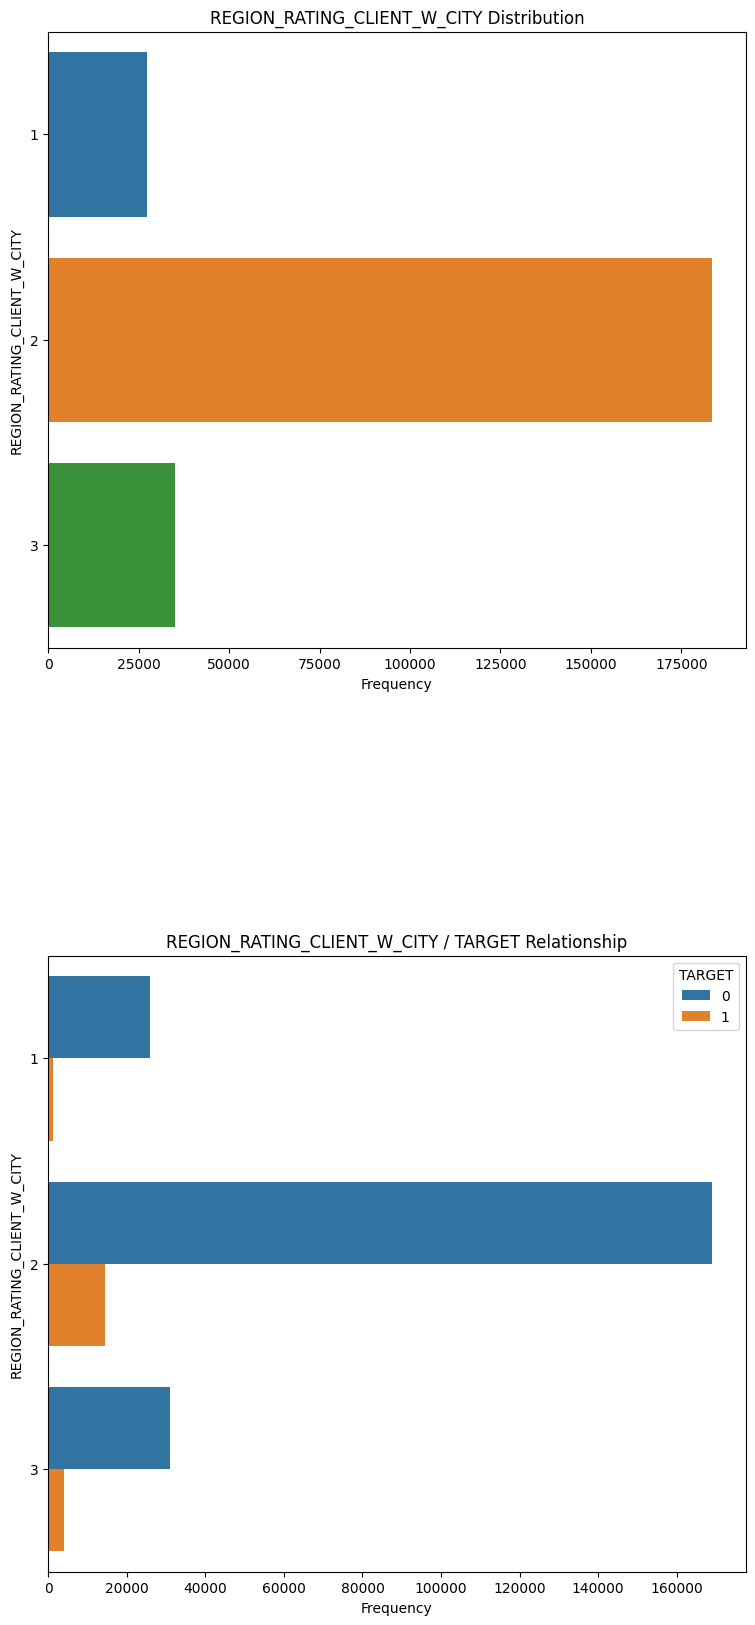

In [43]:
analyze_cat(categorical_features[19], eda_df)

REG_REGION_NOT_LIVE_REGION distribution:

REG_REGION_NOT_LIVE_REGION
0    0.984773
1    0.015227
Name: proportion, dtype: float64

According to target:

REG_REGION_NOT_LIVE_REGION  TARGET
0                           0         0.919410
                            1         0.080590
1                           0         0.906033
                            1         0.093967
Name: proportion, dtype: float64



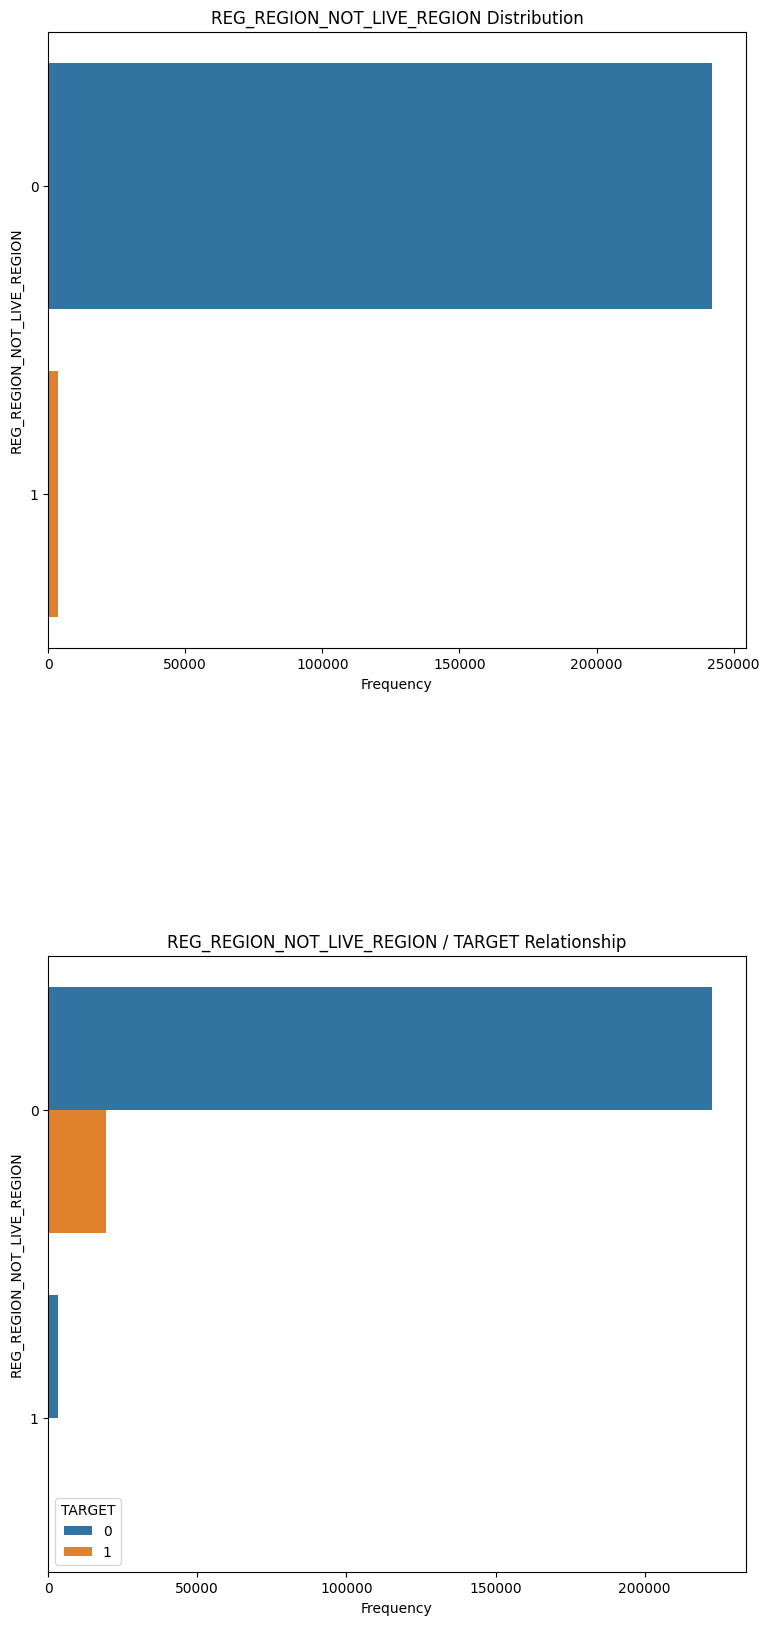

In [44]:
analyze_cat(categorical_features[20], eda_df)

LIVE_REGION_NOT_WORK_REGION distribution:

LIVE_REGION_NOT_WORK_REGION
0    0.959314
1    0.040686
Name: proportion, dtype: float64

According to target:

LIVE_REGION_NOT_WORK_REGION  TARGET
0                            0         0.919339
                             1         0.080661
1                            0         0.916076
                             1         0.083924
Name: proportion, dtype: float64



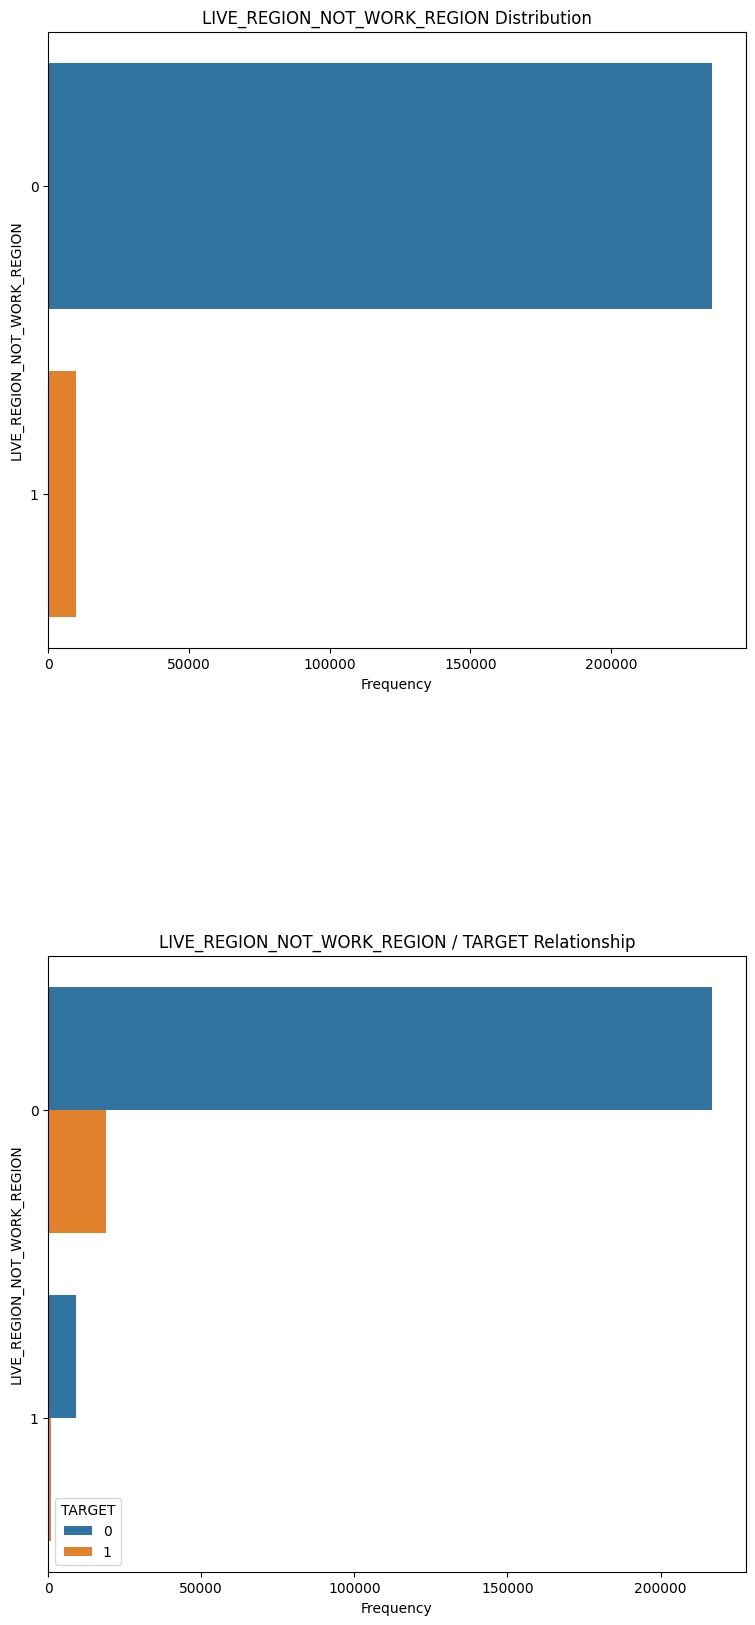

In [45]:
analyze_cat(categorical_features[21], eda_df)

REG_CITY_NOT_LIVE_CITY distribution:

REG_CITY_NOT_LIVE_CITY
0    0.921637
1    0.078363
Name: proportion, dtype: float64

According to target:

REG_CITY_NOT_LIVE_CITY  TARGET
0                       0         0.922741
                        1         0.077259
1                       0         0.877633
                        1         0.122367
Name: proportion, dtype: float64



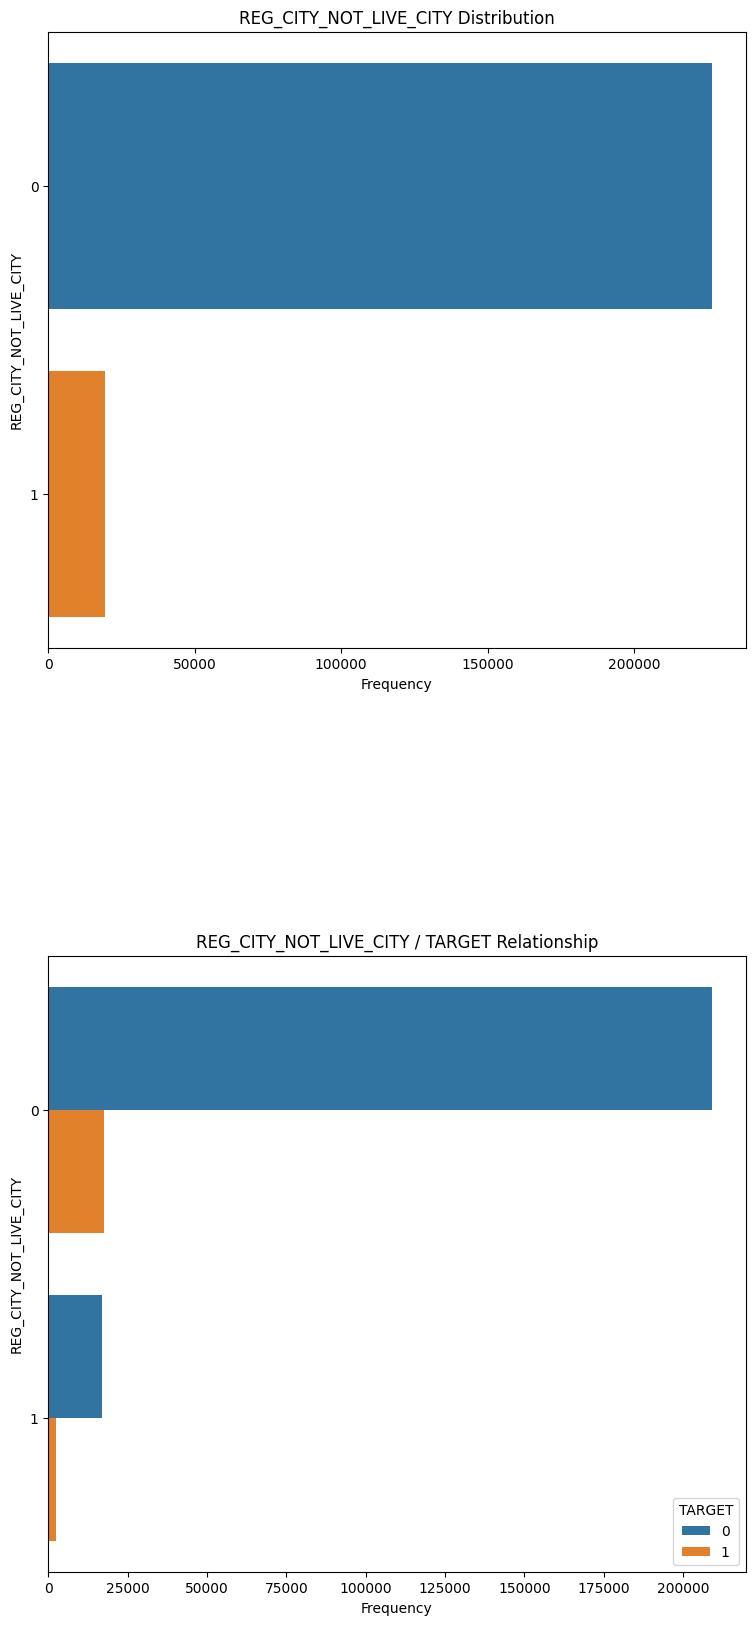

In [46]:
analyze_cat(categorical_features[22], eda_df)

REG_CITY_NOT_WORK_CITY distribution:

REG_CITY_NOT_WORK_CITY
0    0.769857
1    0.230143
Name: proportion, dtype: float64

According to target:

REG_CITY_NOT_WORK_CITY  TARGET
0                       0         0.926808
                        1         0.073192
1                       0         0.893777
                        1         0.106223
Name: proportion, dtype: float64



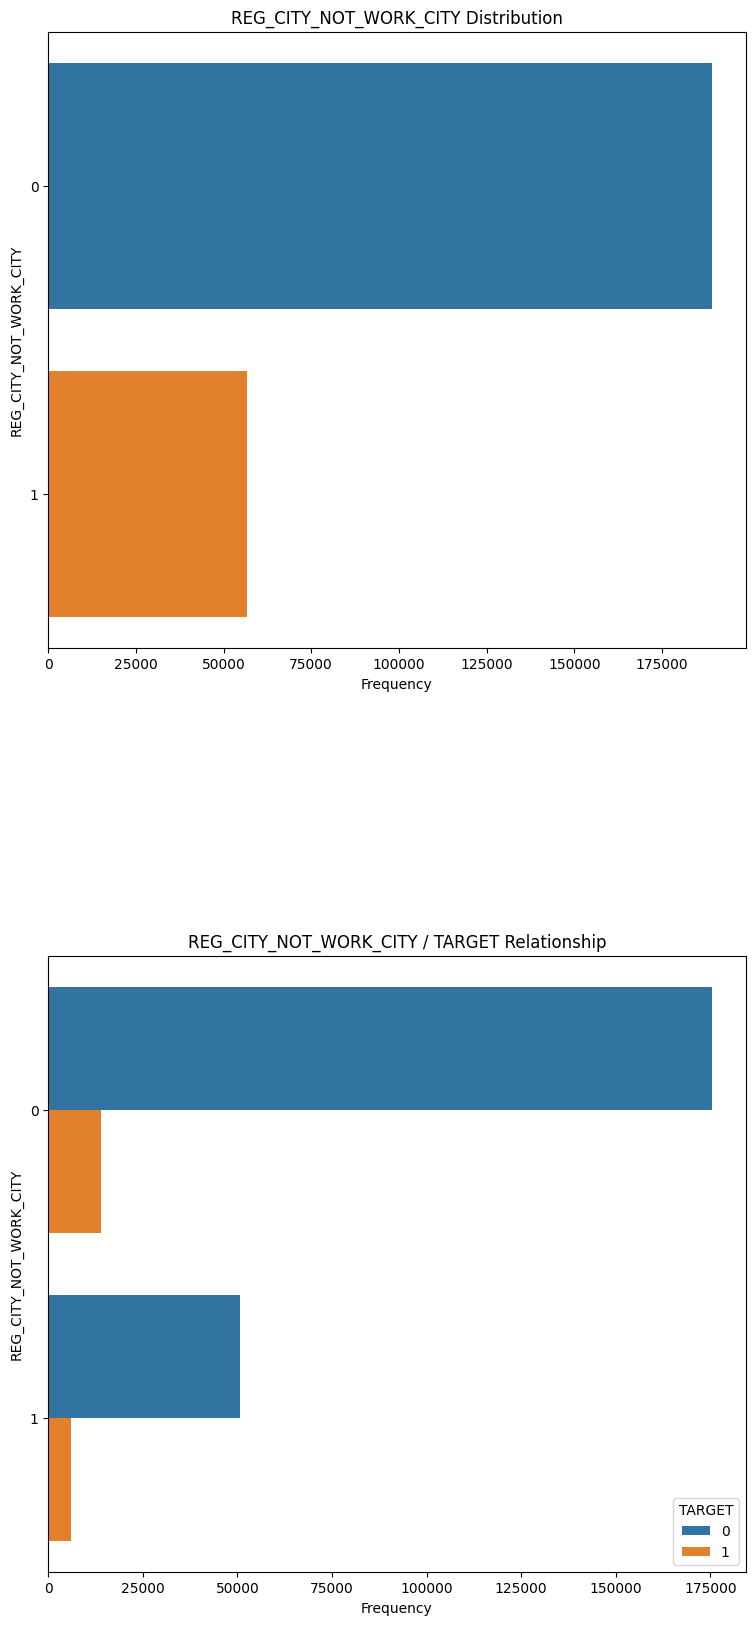

In [47]:
analyze_cat(categorical_features[23], eda_df)

AMT_REQ_CREDIT_BUREAU_HOUR distribution:

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    0.993811
1.0    0.005935
2.0    0.000216
3.0    0.000038
Name: proportion, dtype: float64

According to target:

AMT_REQ_CREDIT_BUREAU_HOUR  TARGET
0.0                         0         0.922721
                            1         0.077279
1.0                         0         0.918448
                            1         0.081552
2.0                         0         0.891304
                            1         0.108696
3.0                         0         1.000000
Name: proportion, dtype: float64



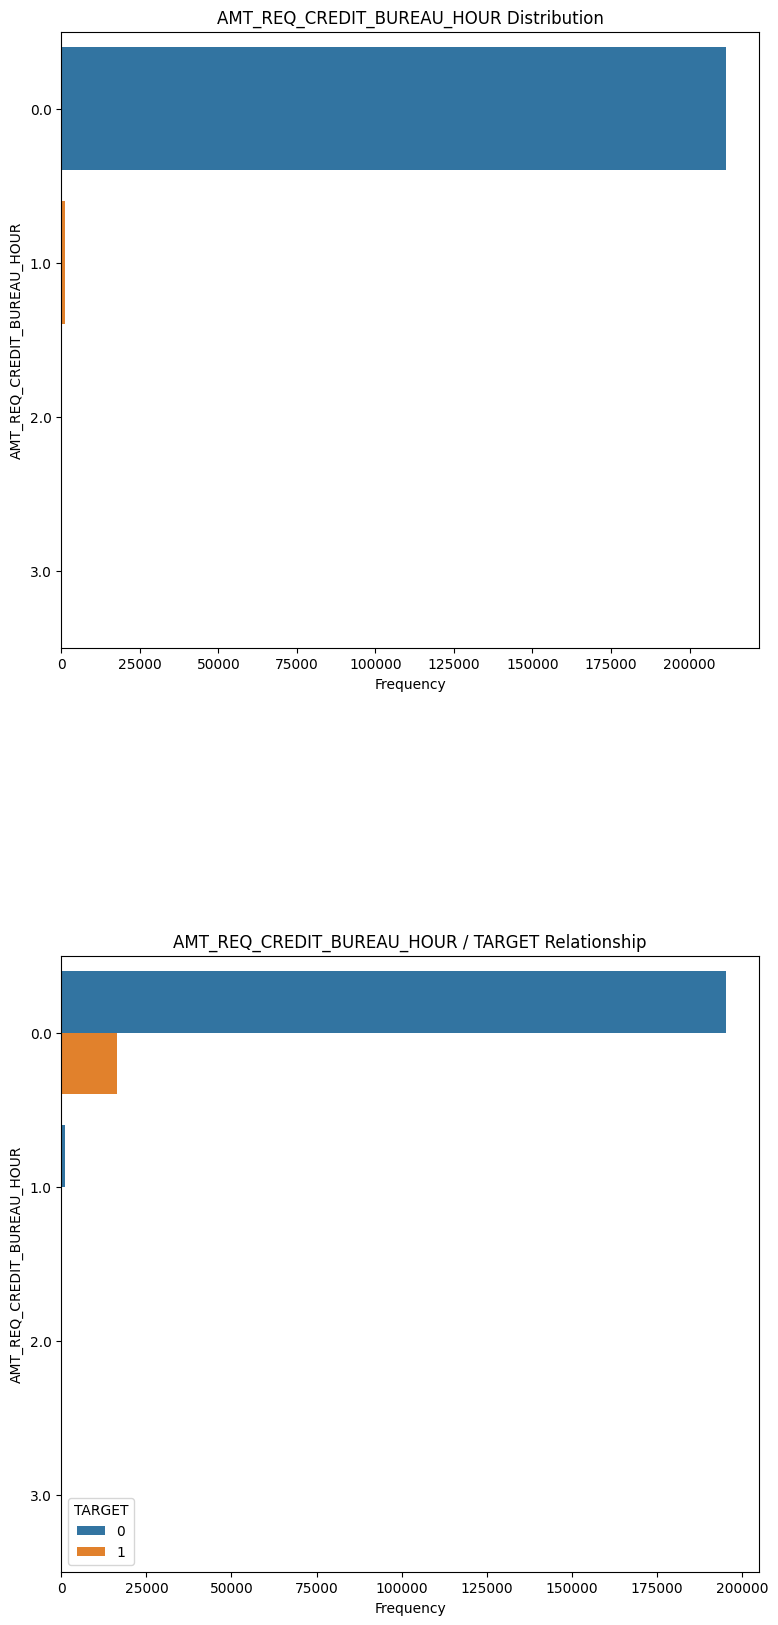

In [48]:
analyze_cat(categorical_features[24], eda_df)

AMT_REQ_CREDIT_BUREAU_WEEK distribution:

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    0.968049
1.0    0.030710
2.0    0.000766
3.0    0.000221
4.0    0.000122
6.0    0.000070
5.0    0.000028
8.0    0.000023
7.0    0.000009
Name: proportion, dtype: float64

According to target:

AMT_REQ_CREDIT_BUREAU_WEEK  TARGET
0.0                         0         0.922679
                            1         0.077321
1.0                         0         0.924101
                            1         0.075899
2.0                         0         0.883436
                            1         0.116564
3.0                         0         0.936170
                            1         0.063830
4.0                         0         0.884615
                            1         0.115385
5.0                         0         0.833333
                            1         0.166667
6.0                         0         0.933333
                            1         0.066667
7.0                         0         

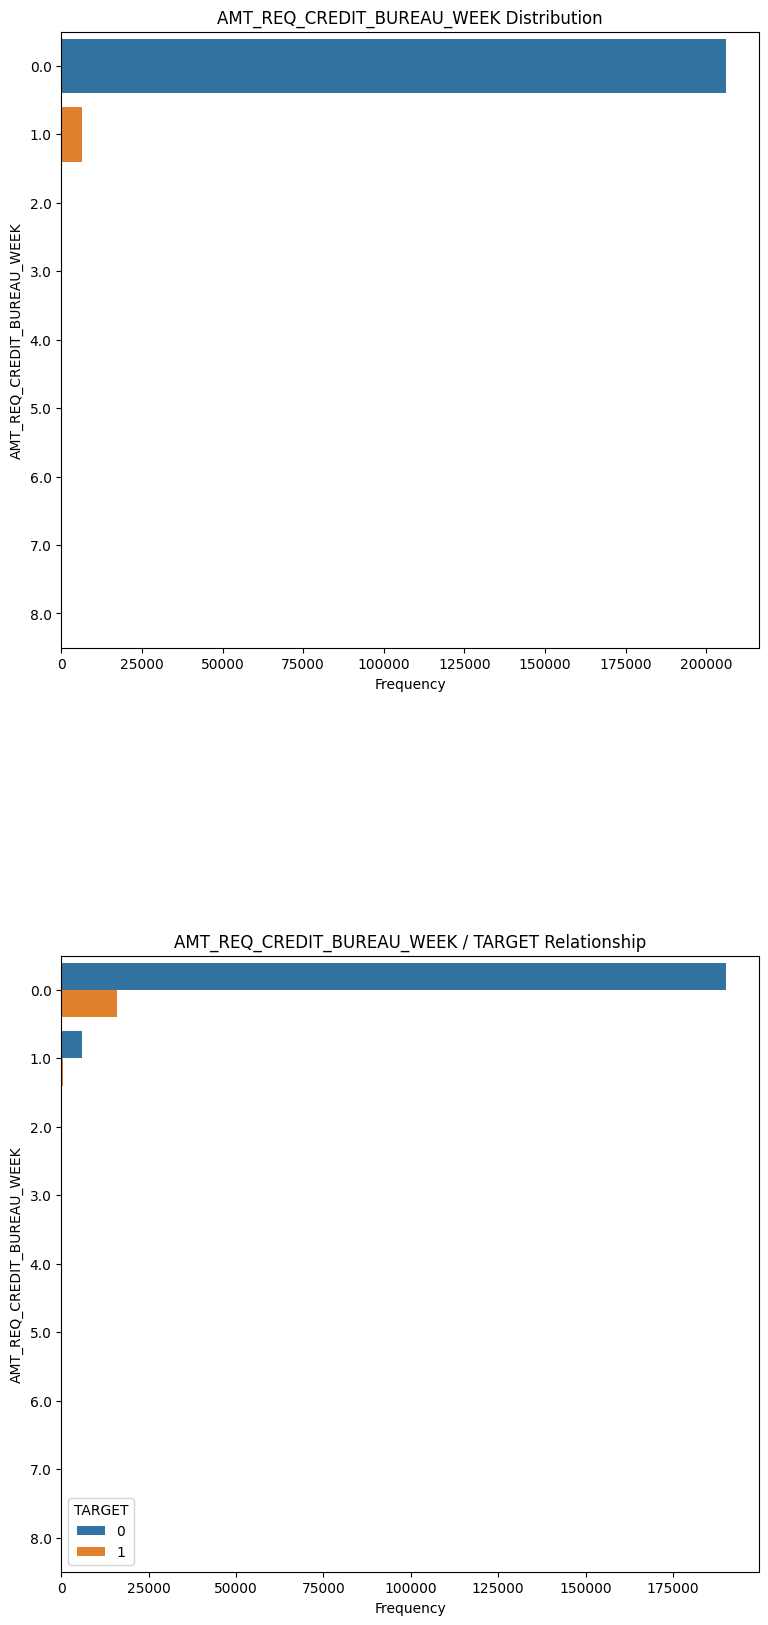

In [49]:
analyze_cat(categorical_features[25], eda_df)

AMT_REQ_CREDIT_BUREAU_MON distribution:

AMT_REQ_CREDIT_BUREAU_MON
0.0     0.835505
1.0     0.124565
2.0     0.020428
3.0     0.007491
4.0     0.003999
5.0     0.002270
6.0     0.001278
7.0     0.001100
9.0     0.000724
8.0     0.000672
10.0    0.000479
11.0    0.000475
12.0    0.000277
13.0    0.000277
14.0    0.000141
15.0    0.000132
16.0    0.000094
17.0    0.000042
18.0    0.000028
19.0    0.000009
27.0    0.000005
24.0    0.000005
23.0    0.000005
Name: proportion, dtype: float64

According to target:

AMT_REQ_CREDIT_BUREAU_MON  TARGET
0.0                        0         0.921887
                           1         0.078113
1.0                        0         0.922964
                           1         0.077036
2.0                        0         0.931217
                           1         0.068783
3.0                        0         0.947302
                           1         0.052698
4.0                        0         0.940071
                           1         0

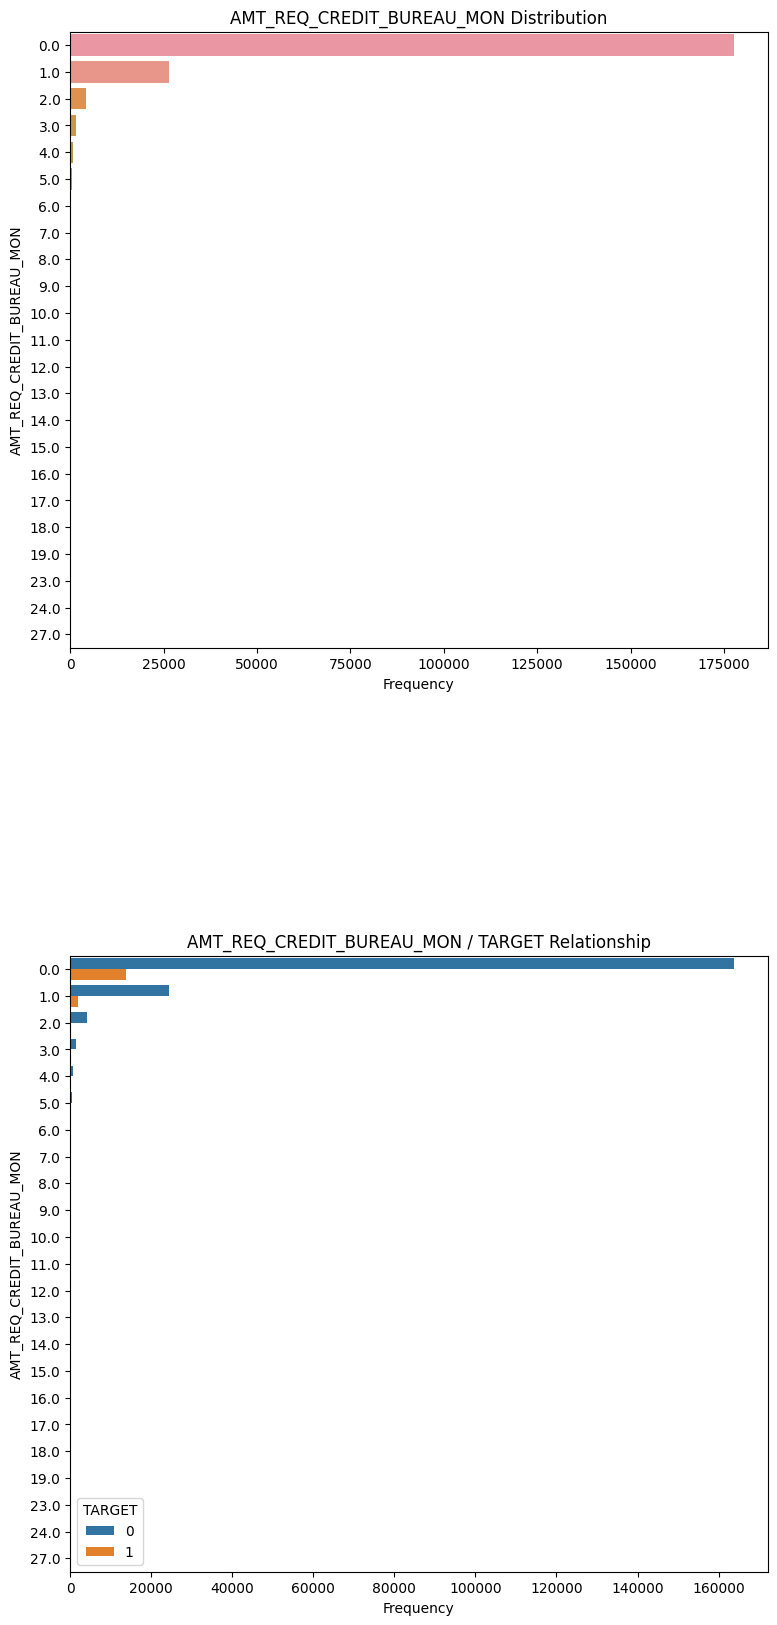

In [50]:
analyze_cat(categorical_features[26], eda_df)

AMT_REQ_CREDIT_BUREAU_QRT distribution:

AMT_REQ_CREDIT_BUREAU_QRT
0.0      0.809161
1.0      0.127417
2.0      0.054789
3.0      0.006466
4.0      0.001805
5.0      0.000202
6.0      0.000099
8.0      0.000028
7.0      0.000023
261.0    0.000005
19.0     0.000005
Name: proportion, dtype: float64

According to target:

AMT_REQ_CREDIT_BUREAU_QRT  TARGET
0.0                        0         0.921370
                           1         0.078630
1.0                        0         0.934056
                           1         0.065944
2.0                        0         0.917489
                           1         0.082511
3.0                        0         0.924419
                           1         0.075581
4.0                        0         0.875000
                           1         0.125000
5.0                        0         0.930233
                           1         0.069767
6.0                        0         0.761905
                           1         0.238095
7

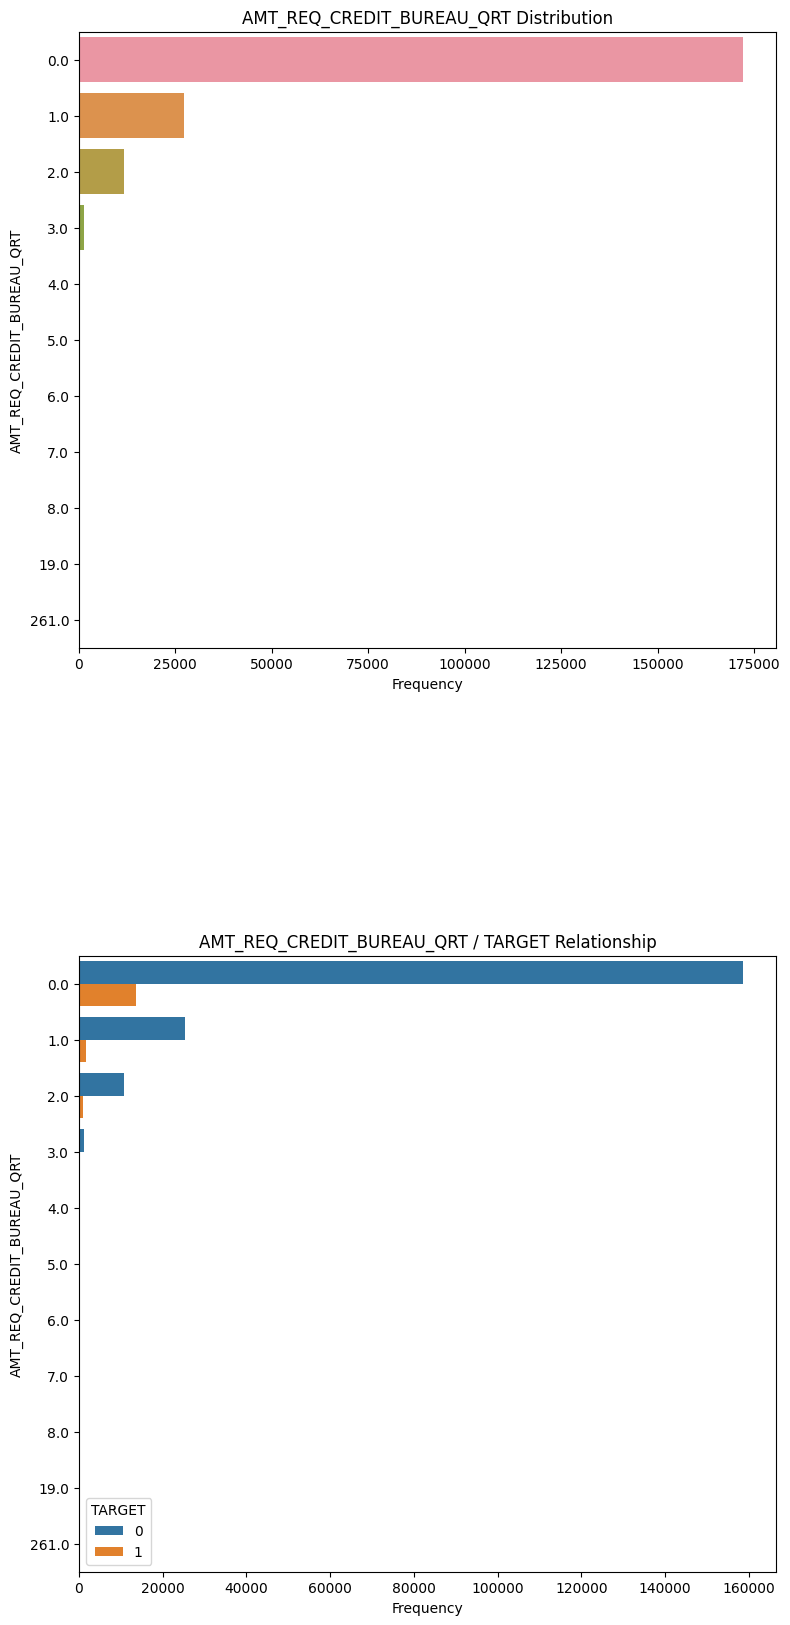

In [51]:
analyze_cat(categorical_features[27], eda_df)

AMT_REQ_CREDIT_BUREAU_YEAR distribution:

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     0.270018
1.0     0.238072
2.0     0.188621
3.0     0.126543
4.0     0.078009
5.0     0.045207
6.0     0.026053
7.0     0.014704
8.0     0.008059
9.0     0.004182
11.0    0.000132
12.0    0.000117
10.0    0.000075
13.0    0.000075
14.0    0.000038
17.0    0.000023
15.0    0.000023
19.0    0.000019
16.0    0.000014
18.0    0.000005
25.0    0.000005
21.0    0.000005
Name: proportion, dtype: float64

According to target:

AMT_REQ_CREDIT_BUREAU_YEAR  TARGET
0.0                         0         0.928175
                            1         0.071825
1.0                         0         0.926176
                            1         0.073824
2.0                         0         0.919428
                            1         0.080572
3.0                         0         0.920455
                            1         0.079545
4.0                         0         0.918253
                            1         0.081

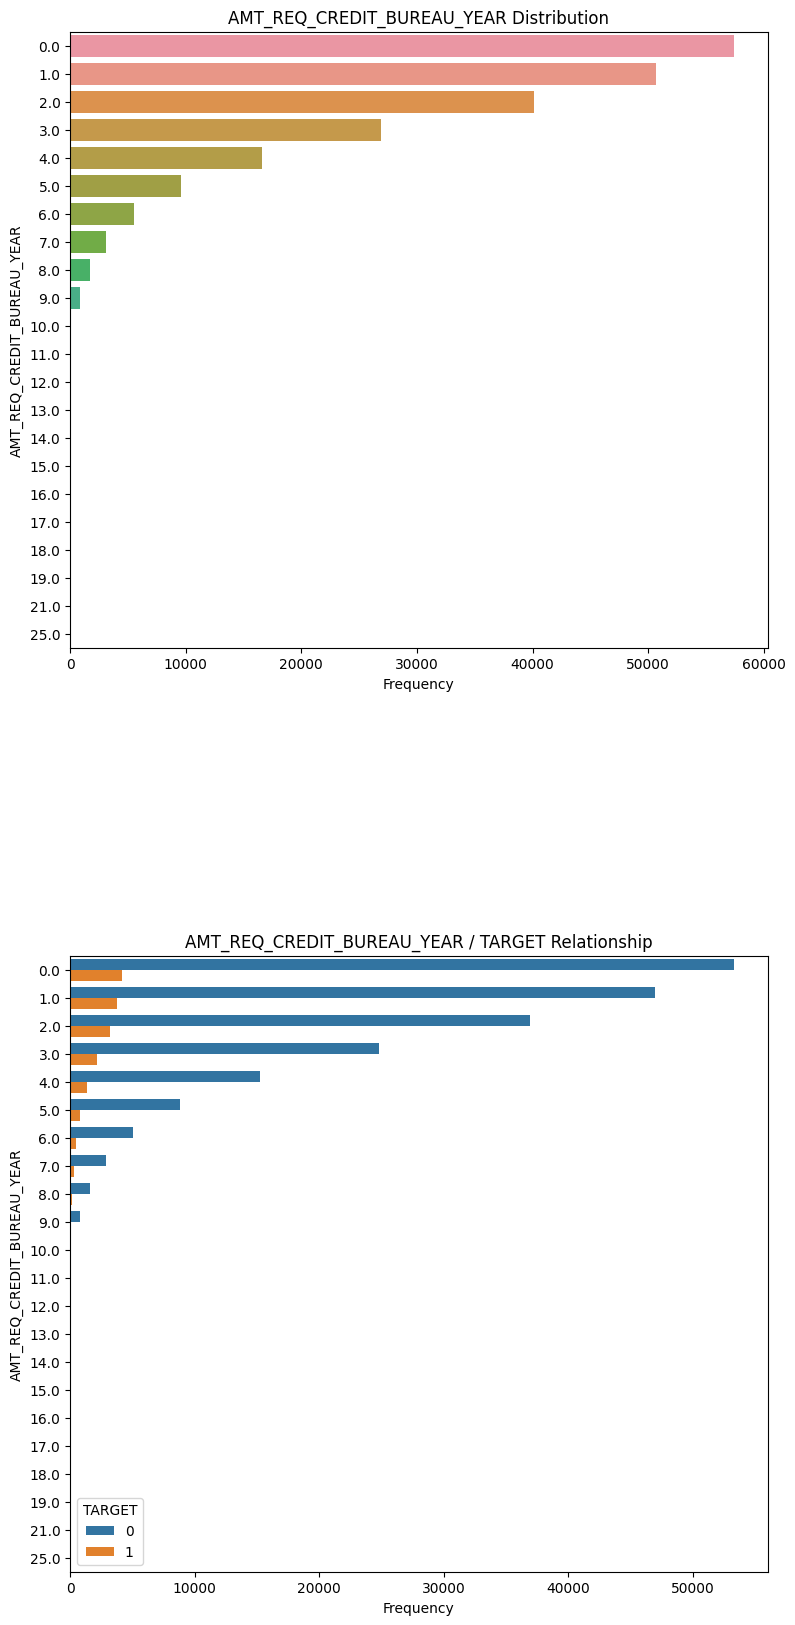

In [52]:
analyze_cat(categorical_features[28], eda_df)

FLAG_DOCUMENT_2 distribution:

FLAG_DOCUMENT_2
0    0.999967
1    0.000033
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_2  TARGET
0                0         0.91922
                 1         0.08078
1                0         0.50000
                 1         0.50000
Name: proportion, dtype: float64



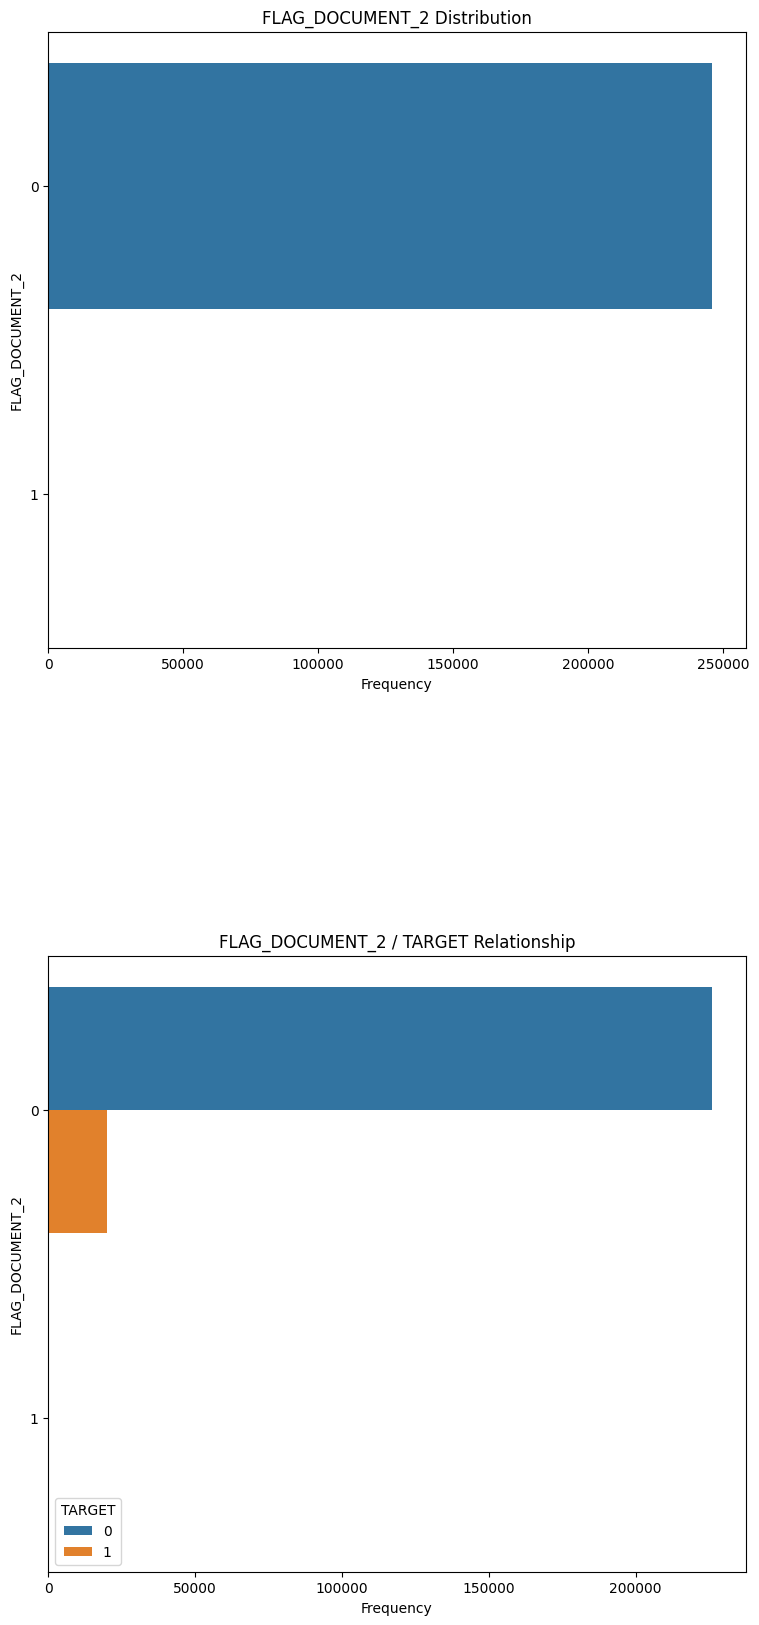

In [53]:
analyze_cat(categorical_features[29], eda_df)

FLAG_DOCUMENT_3 distribution:

FLAG_DOCUMENT_3
1    0.709883
0    0.290117
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_3  TARGET
0                0         0.938196
                 1         0.061804
1                0         0.911445
                 1         0.088555
Name: proportion, dtype: float64



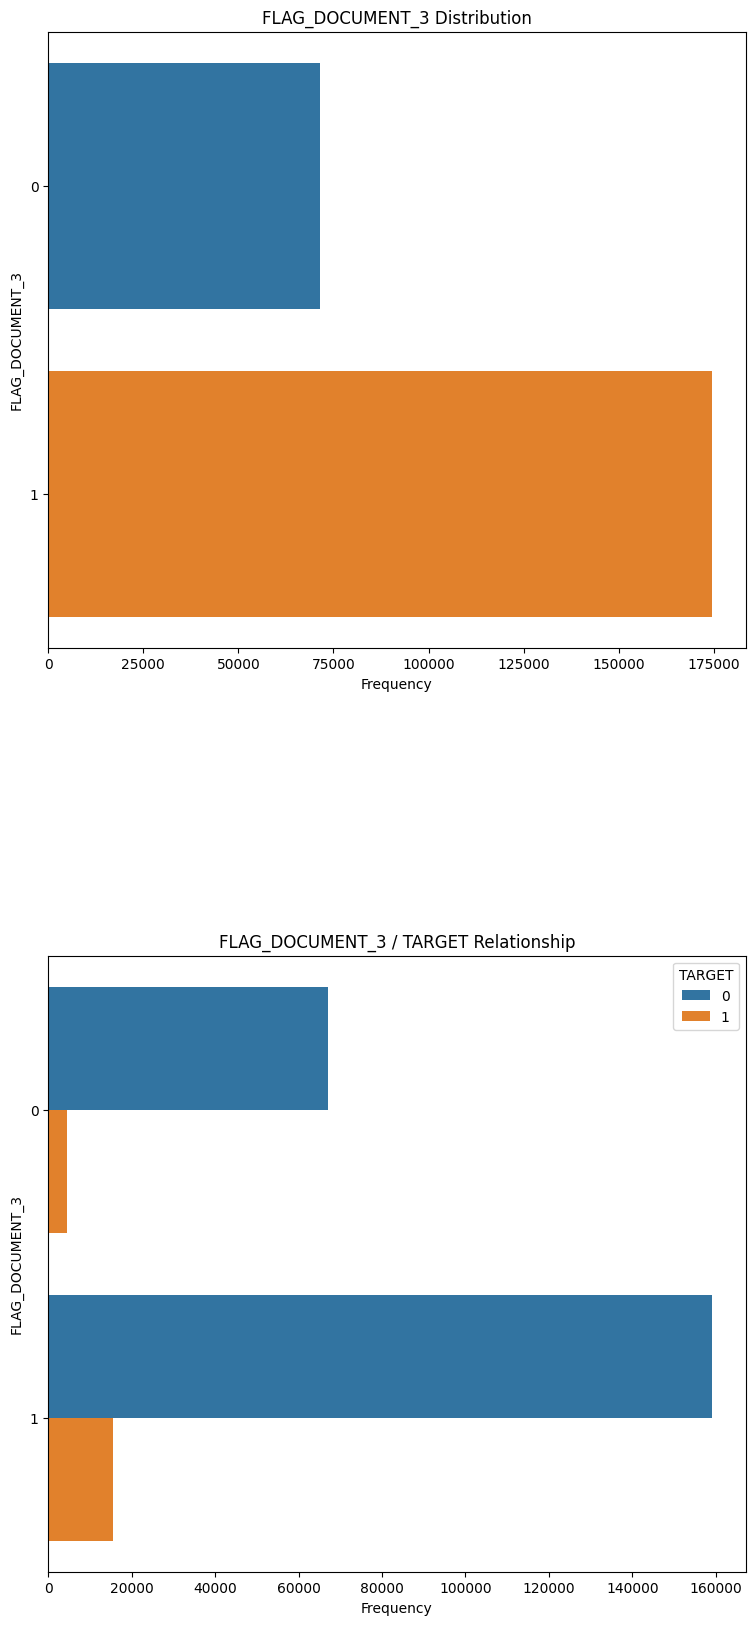

In [54]:
analyze_cat(categorical_features[30], eda_df)

FLAG_DOCUMENT_4 distribution:

FLAG_DOCUMENT_4
0    0.999927
1    0.000073
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_4  TARGET
0                0         0.9192
                 1         0.0808
1                0         1.0000
Name: proportion, dtype: float64



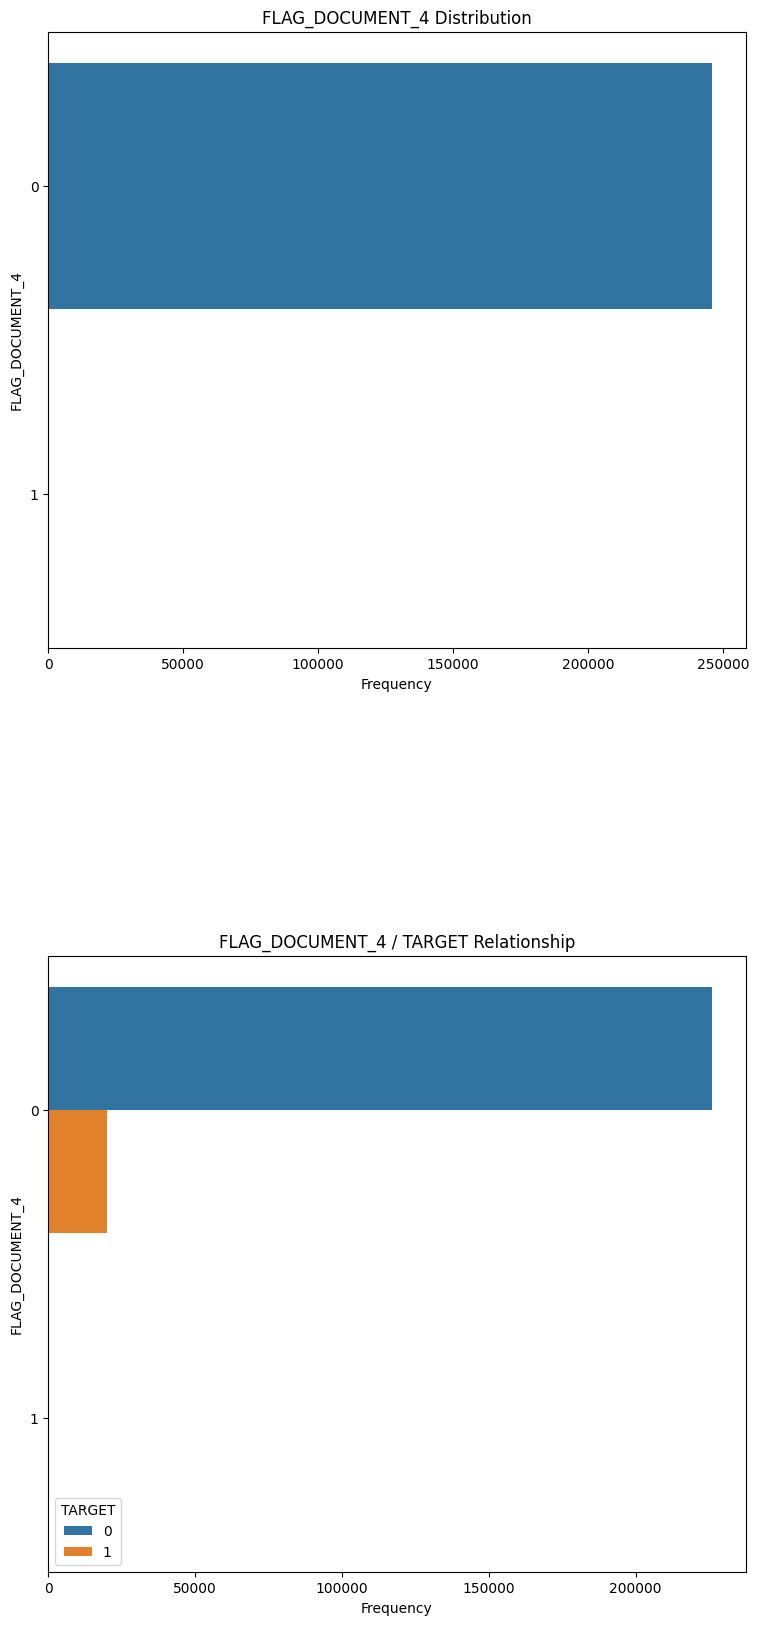

In [55]:
analyze_cat(categorical_features[31], eda_df)

FLAG_DOCUMENT_5 distribution:

FLAG_DOCUMENT_5
0    0.984846
1    0.015154
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_5  TARGET
0                0         0.919168
                 1         0.080832
1                0         0.921674
                 1         0.078326
Name: proportion, dtype: float64



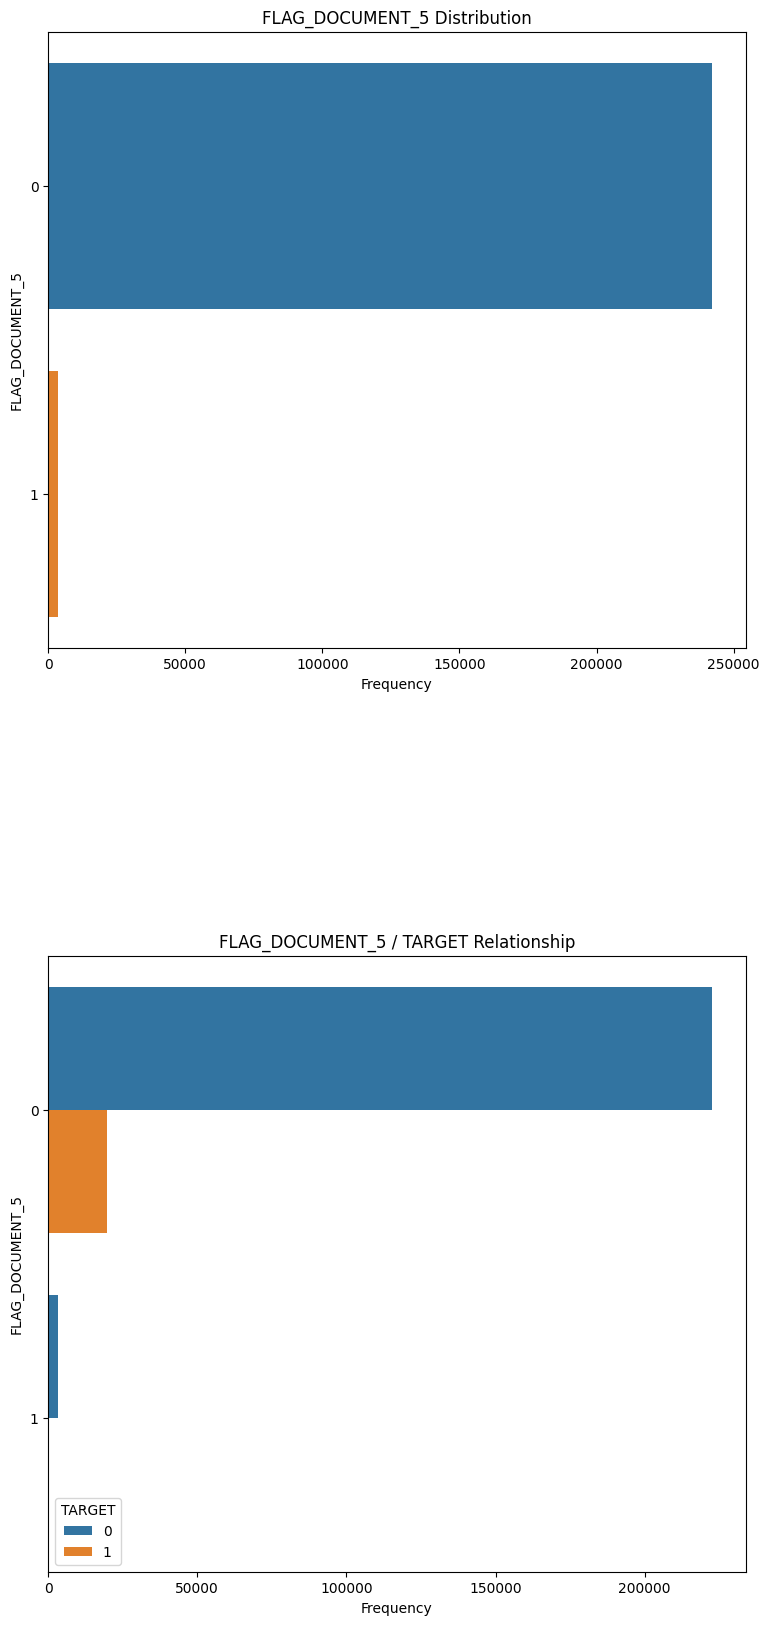

In [56]:
analyze_cat(categorical_features[32], eda_df)

FLAG_DOCUMENT_6 distribution:

FLAG_DOCUMENT_6
0    0.911974
1    0.088026
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_6  TARGET
0                0         0.916805
                 1         0.083195
1                0         0.944078
                 1         0.055922
Name: proportion, dtype: float64



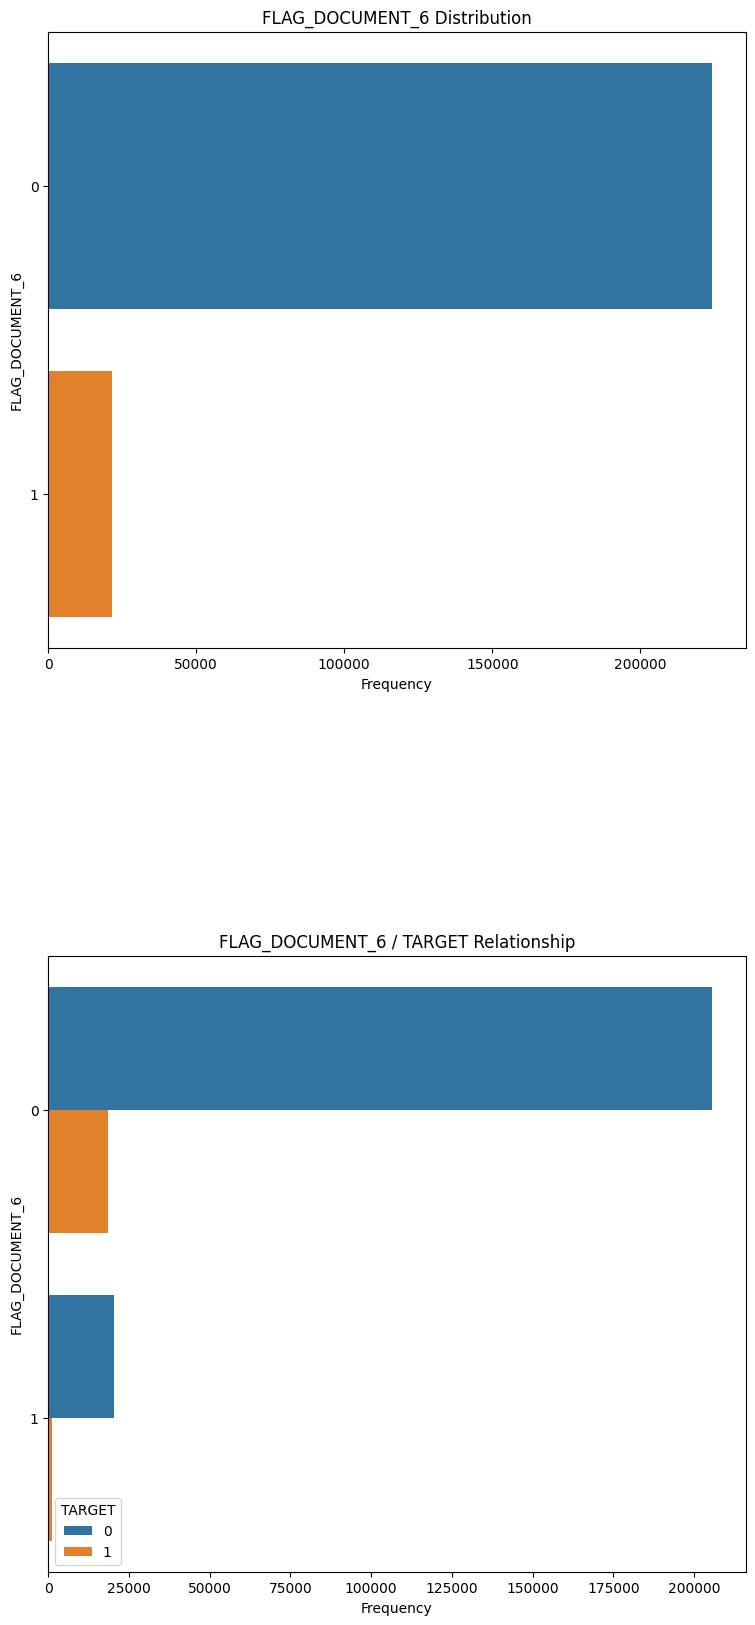

In [57]:
analyze_cat(categorical_features[33], eda_df)

FLAG_DOCUMENT_7 distribution:

FLAG_DOCUMENT_7
0    0.999805
1    0.000195
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_7  TARGET
0                0         0.919198
                 1         0.080802
1                0         0.958333
                 1         0.041667
Name: proportion, dtype: float64



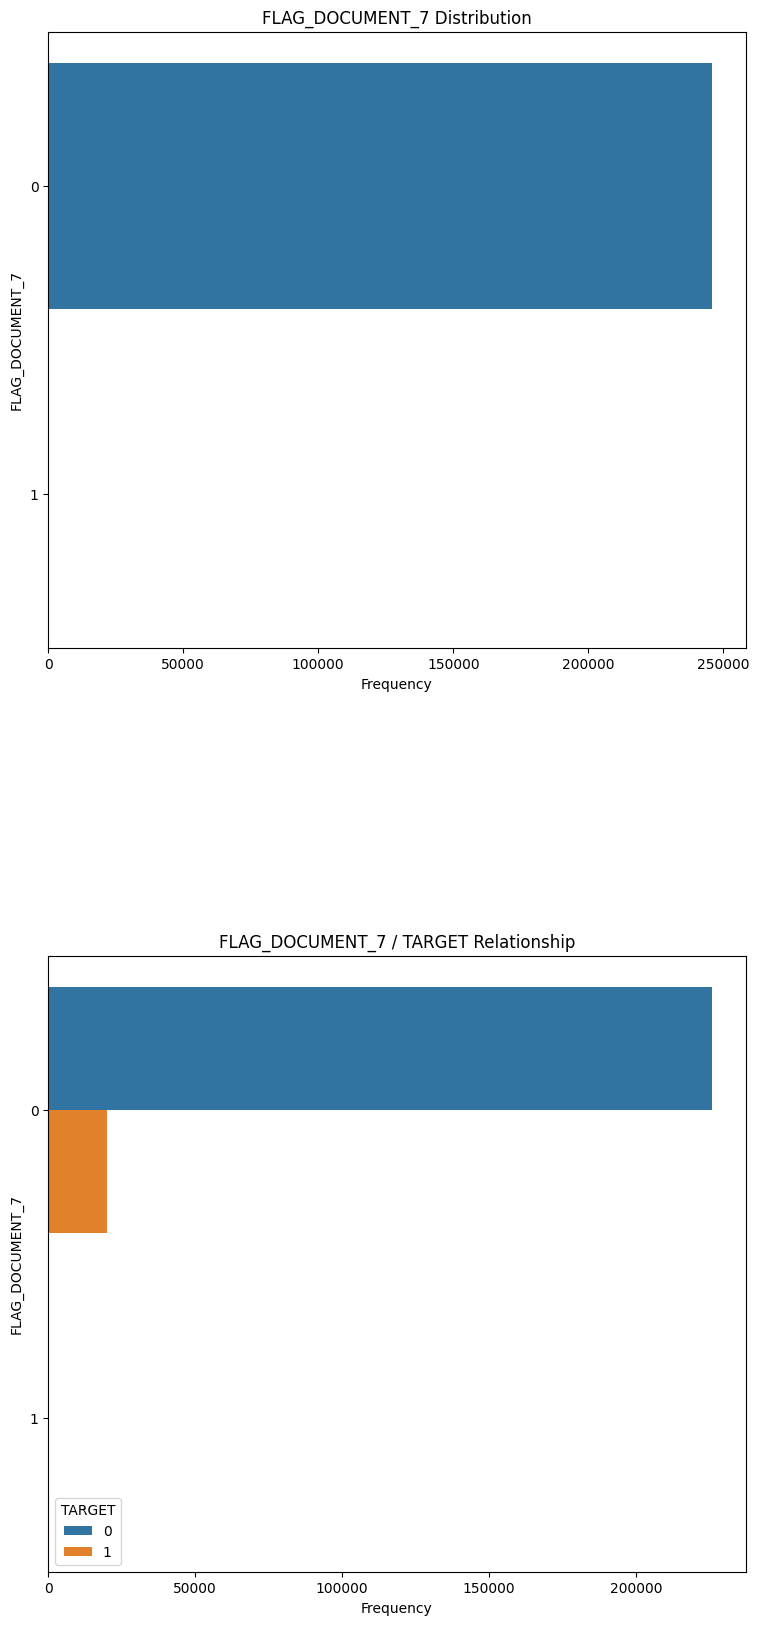

In [58]:
analyze_cat(categorical_features[34], eda_df)

FLAG_DOCUMENT_8 distribution:

FLAG_DOCUMENT_8
0    0.918925
1    0.081075
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_8  TARGET
0                0         0.918589
                 1         0.081411
1                0         0.926197
                 1         0.073803
Name: proportion, dtype: float64



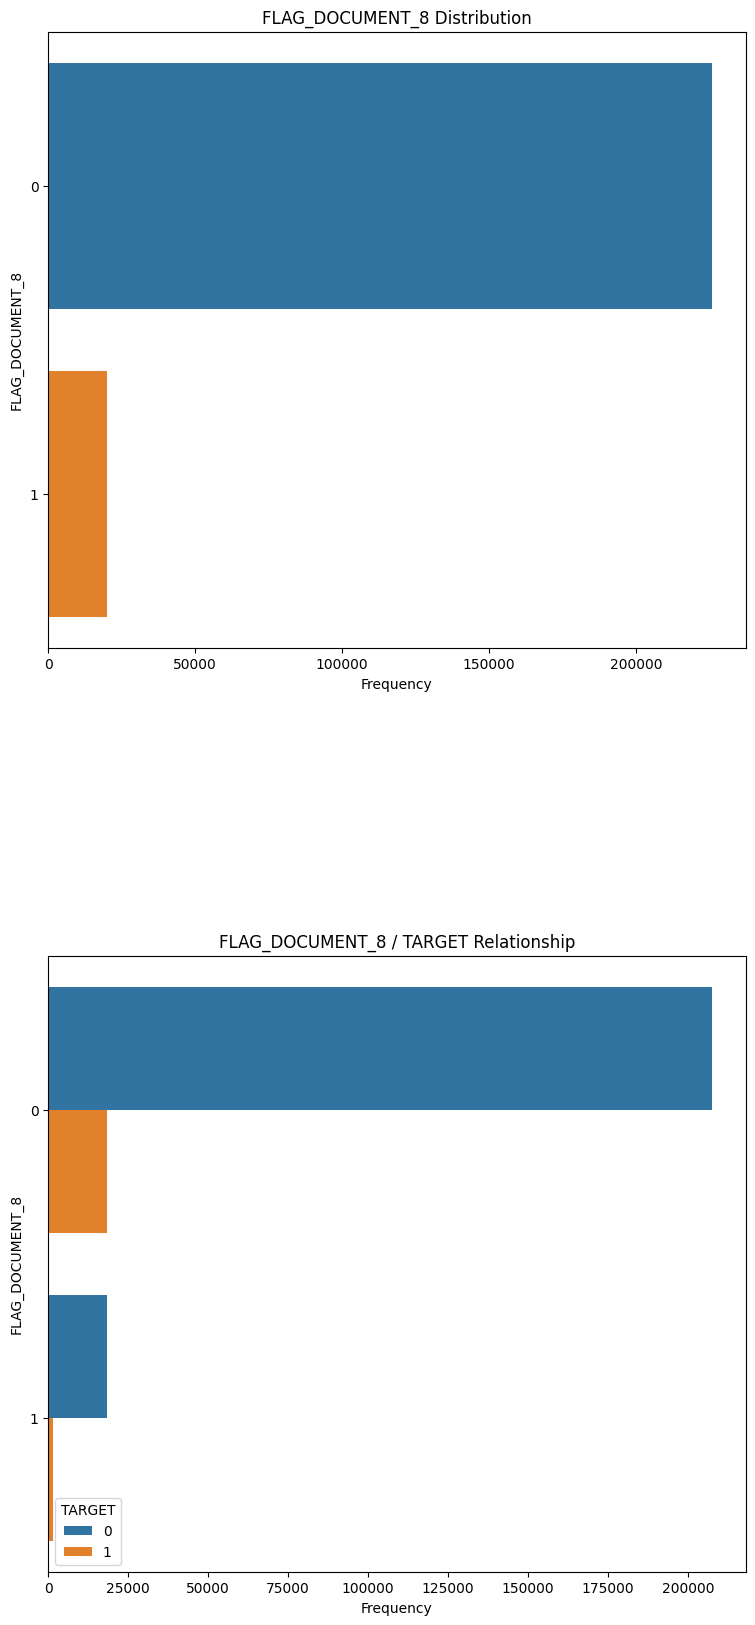

In [59]:
analyze_cat(categorical_features[35], eda_df)

FLAG_DOCUMENT_9 distribution:

FLAG_DOCUMENT_9
0    0.996081
1    0.003919
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_9  TARGET
0                0         0.919141
                 1         0.080859
1                0         0.935685
                 1         0.064315
Name: proportion, dtype: float64



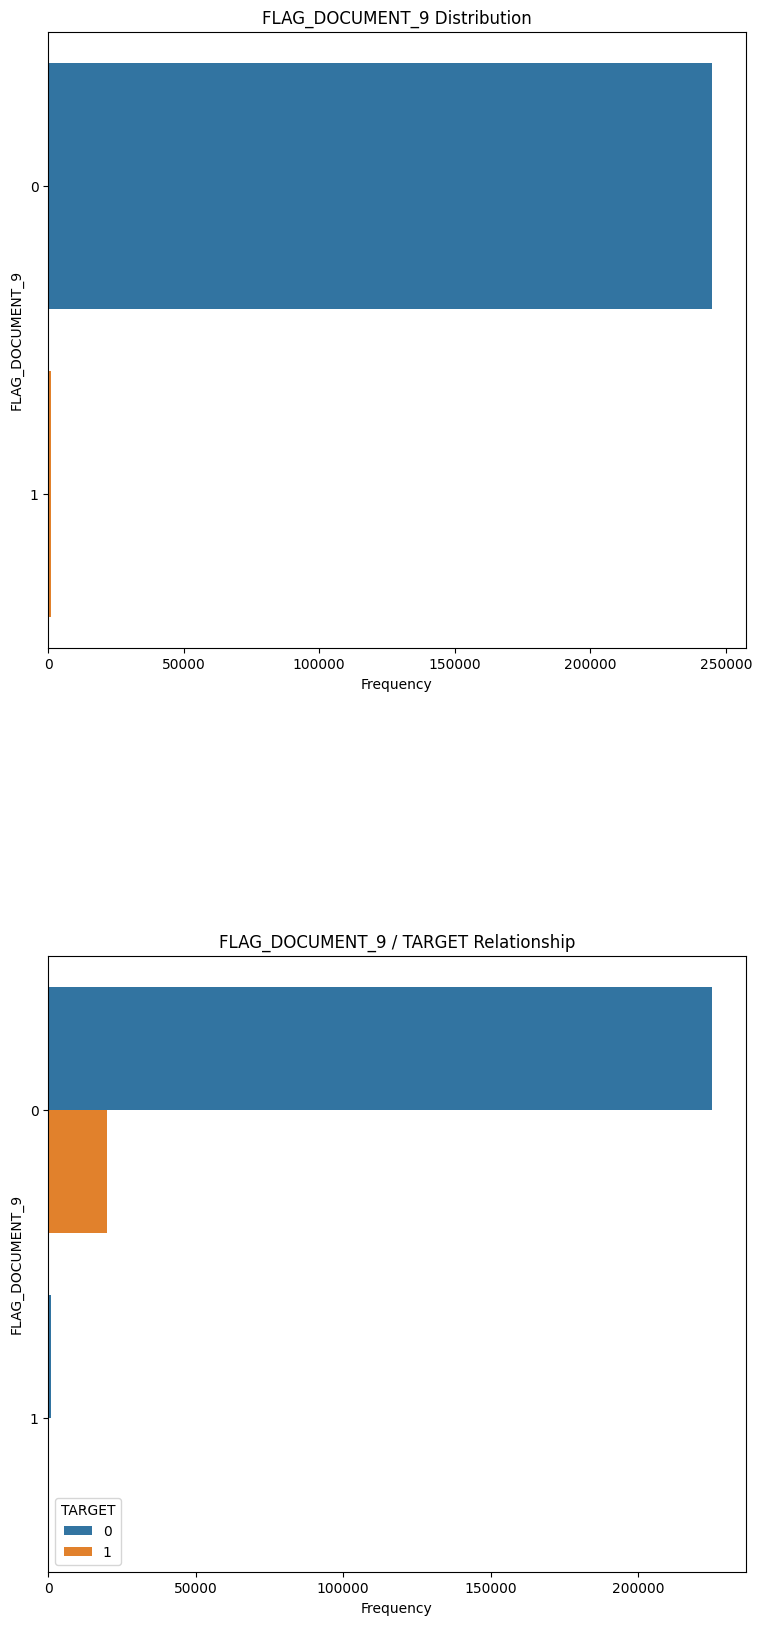

In [60]:
analyze_cat(categorical_features[36], eda_df)

FLAG_DOCUMENT_10 distribution:

FLAG_DOCUMENT_10
0    0.999984
1    0.000016
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_10  TARGET
0                 0         0.919205
                  1         0.080795
1                 0         1.000000
Name: proportion, dtype: float64



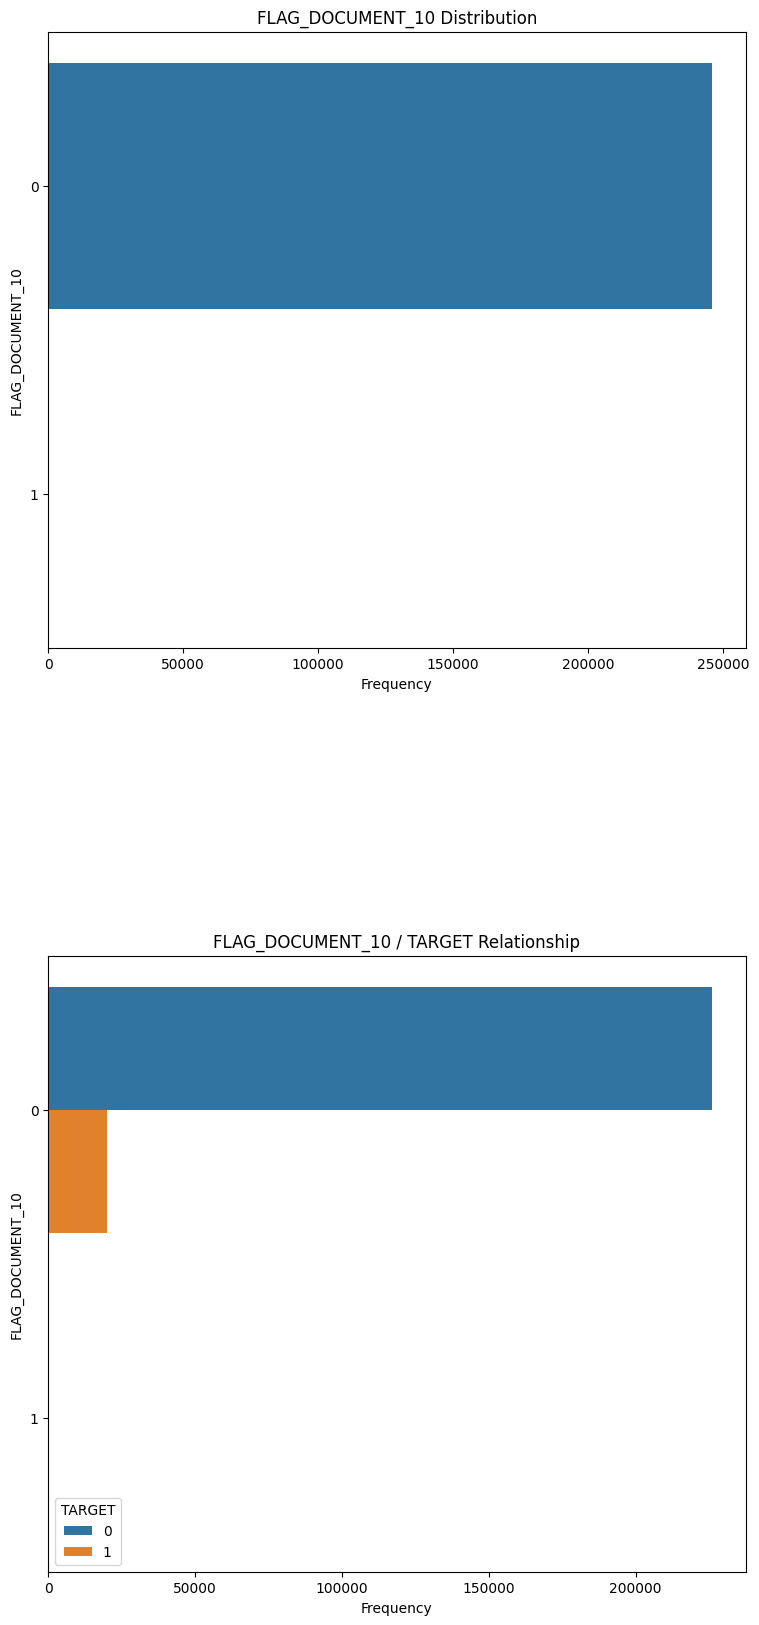

In [61]:
analyze_cat(categorical_features[37], eda_df)

FLAG_DOCUMENT_11 distribution:

FLAG_DOCUMENT_11
0    0.996098
1    0.003902
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_11  TARGET
0                 0         0.919138
                  1         0.080862
1                 0         0.936458
                  1         0.063542
Name: proportion, dtype: float64



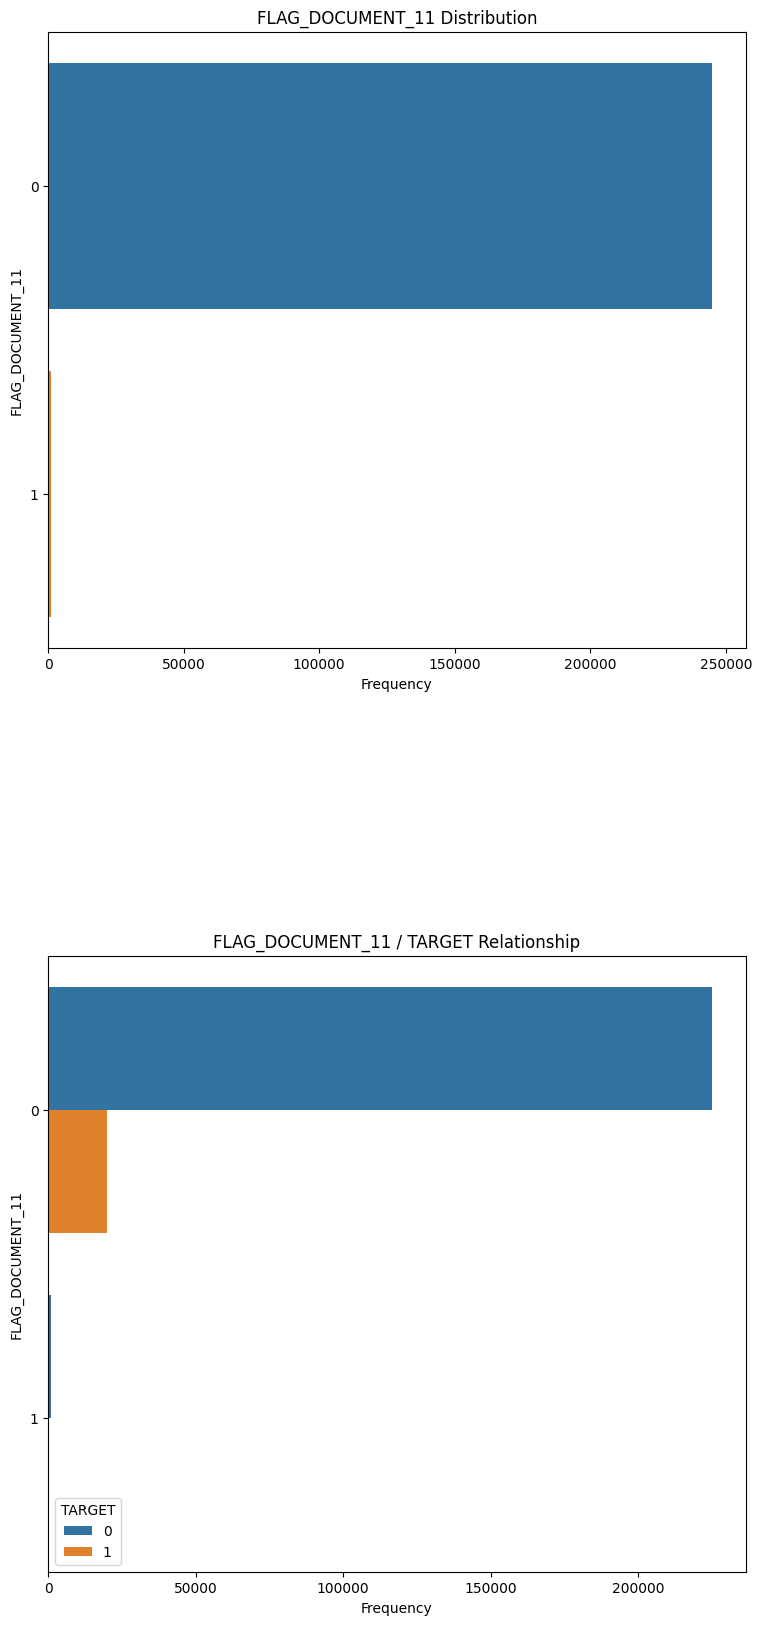

In [62]:
analyze_cat(categorical_features[38], eda_df)

FLAG_DOCUMENT_12 distribution:

FLAG_DOCUMENT_12
0    0.999996
1    0.000004
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_12  TARGET
0                 0         0.919206
                  1         0.080794
1                 0         1.000000
Name: proportion, dtype: float64



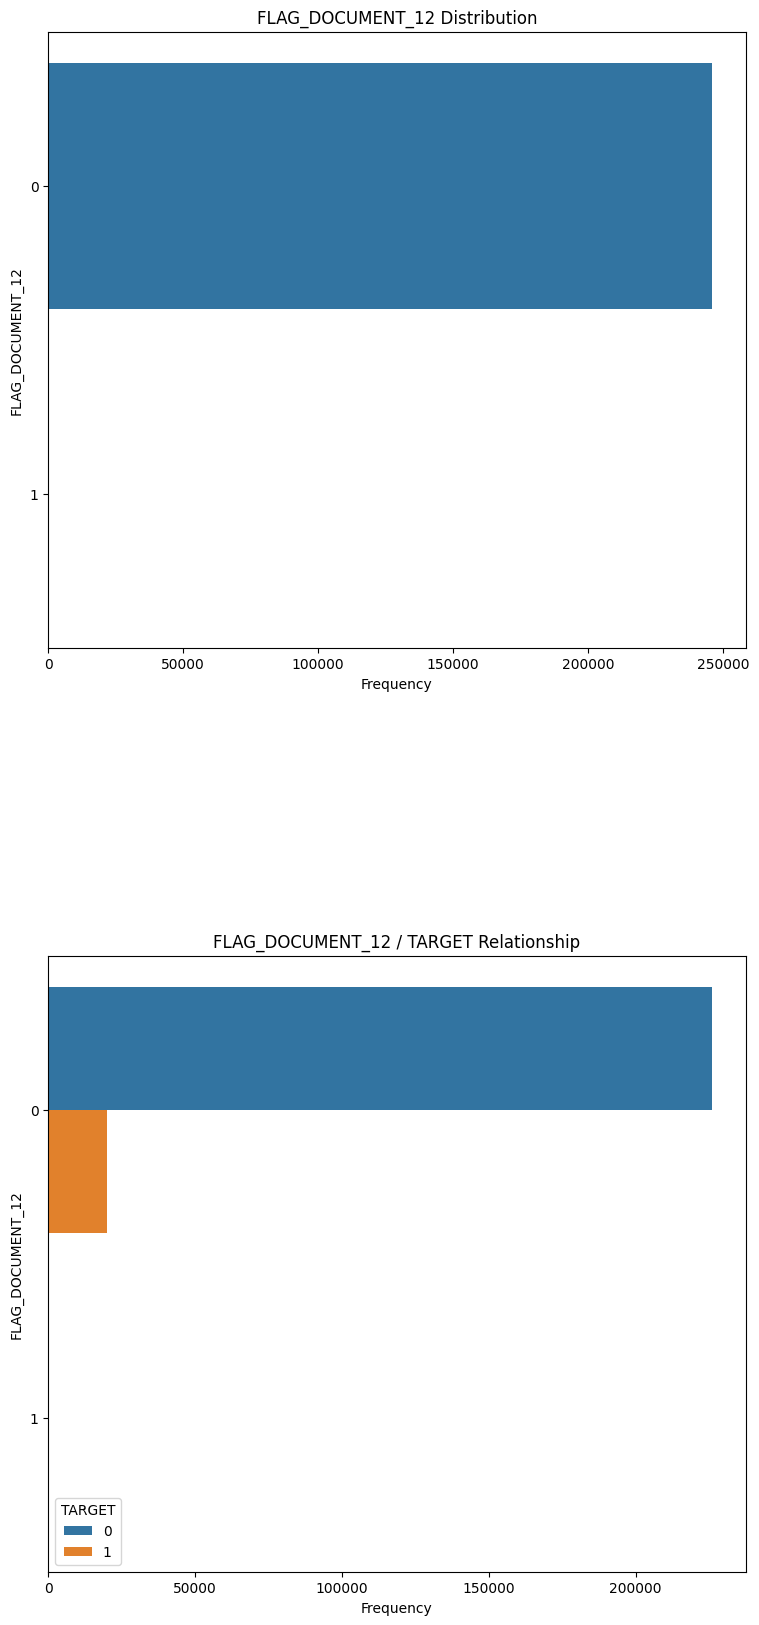

In [63]:
analyze_cat(categorical_features[39], eda_df)

FLAG_DOCUMENT_13 distribution:

FLAG_DOCUMENT_13
0    0.996549
1    0.003451
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_13  TARGET
0                 0         0.919028
                  1         0.080972
1                 0         0.970554
                  1         0.029446
Name: proportion, dtype: float64



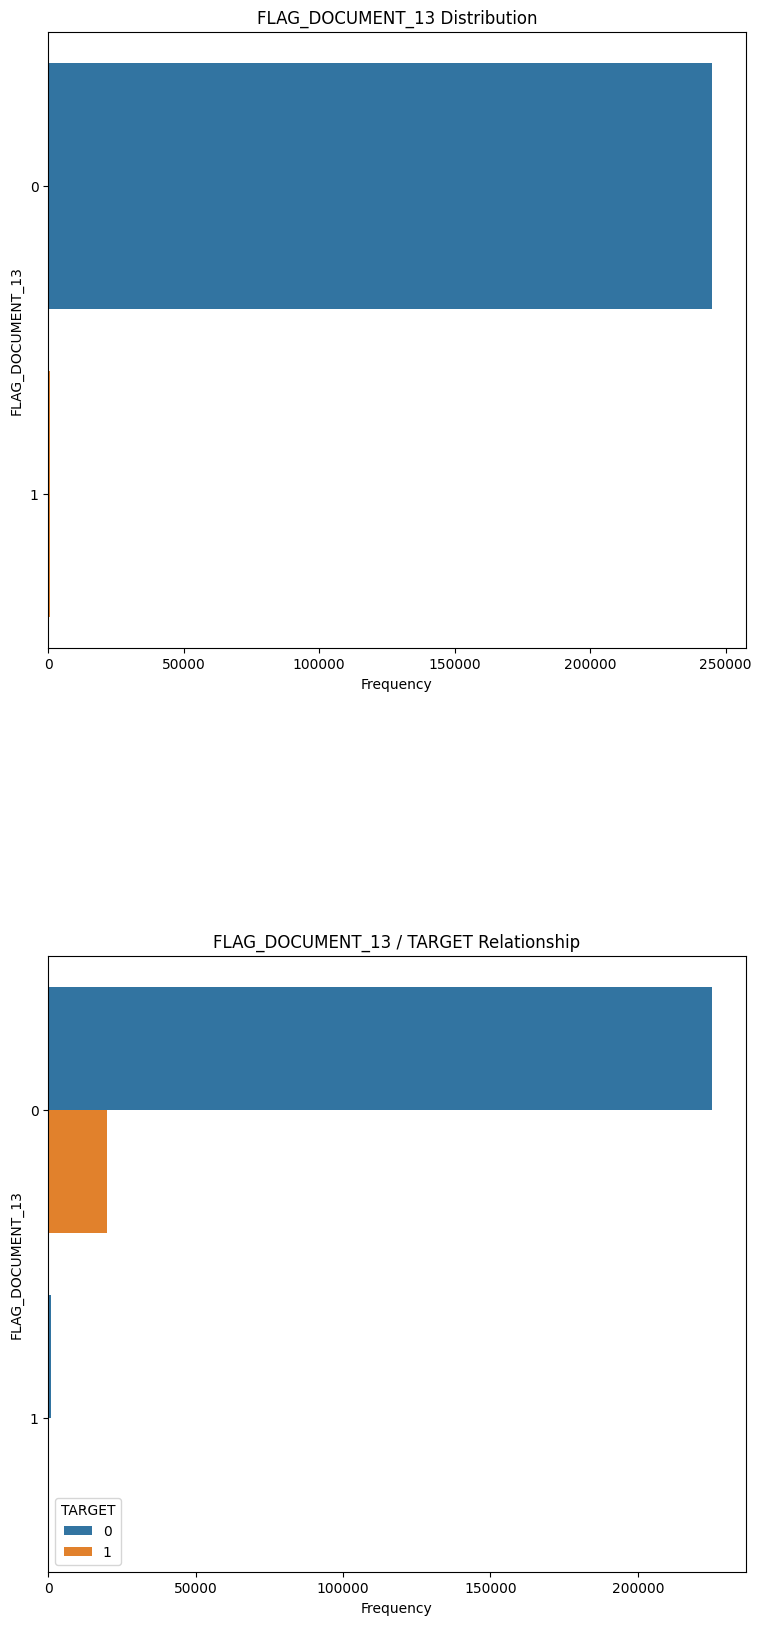

In [64]:
analyze_cat(categorical_features[40], eda_df)

FLAG_DOCUMENT_14 distribution:

FLAG_DOCUMENT_14
0    0.997053
1    0.002947
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_14  TARGET
0                 0         0.919065
                  1         0.080935
1                 0         0.966897
                  1         0.033103
Name: proportion, dtype: float64



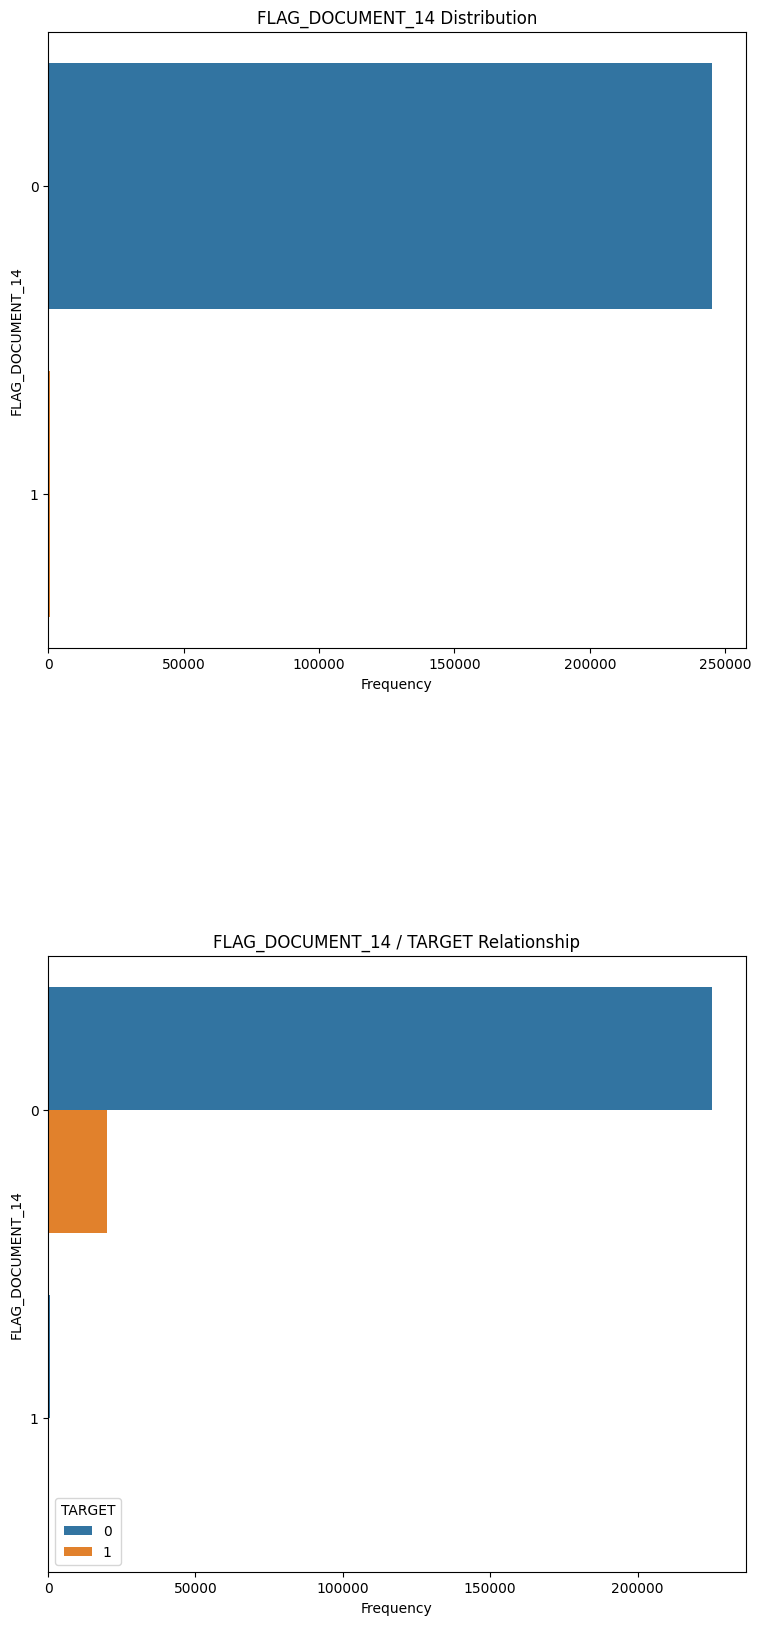

In [65]:
analyze_cat(categorical_features[41], eda_df)

FLAG_DOCUMENT_15 distribution:

FLAG_DOCUMENT_15
0    0.998837
1    0.001163
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_15  TARGET
0                 0         0.919153
                  1         0.080847
1                 0         0.965035
                  1         0.034965
Name: proportion, dtype: float64



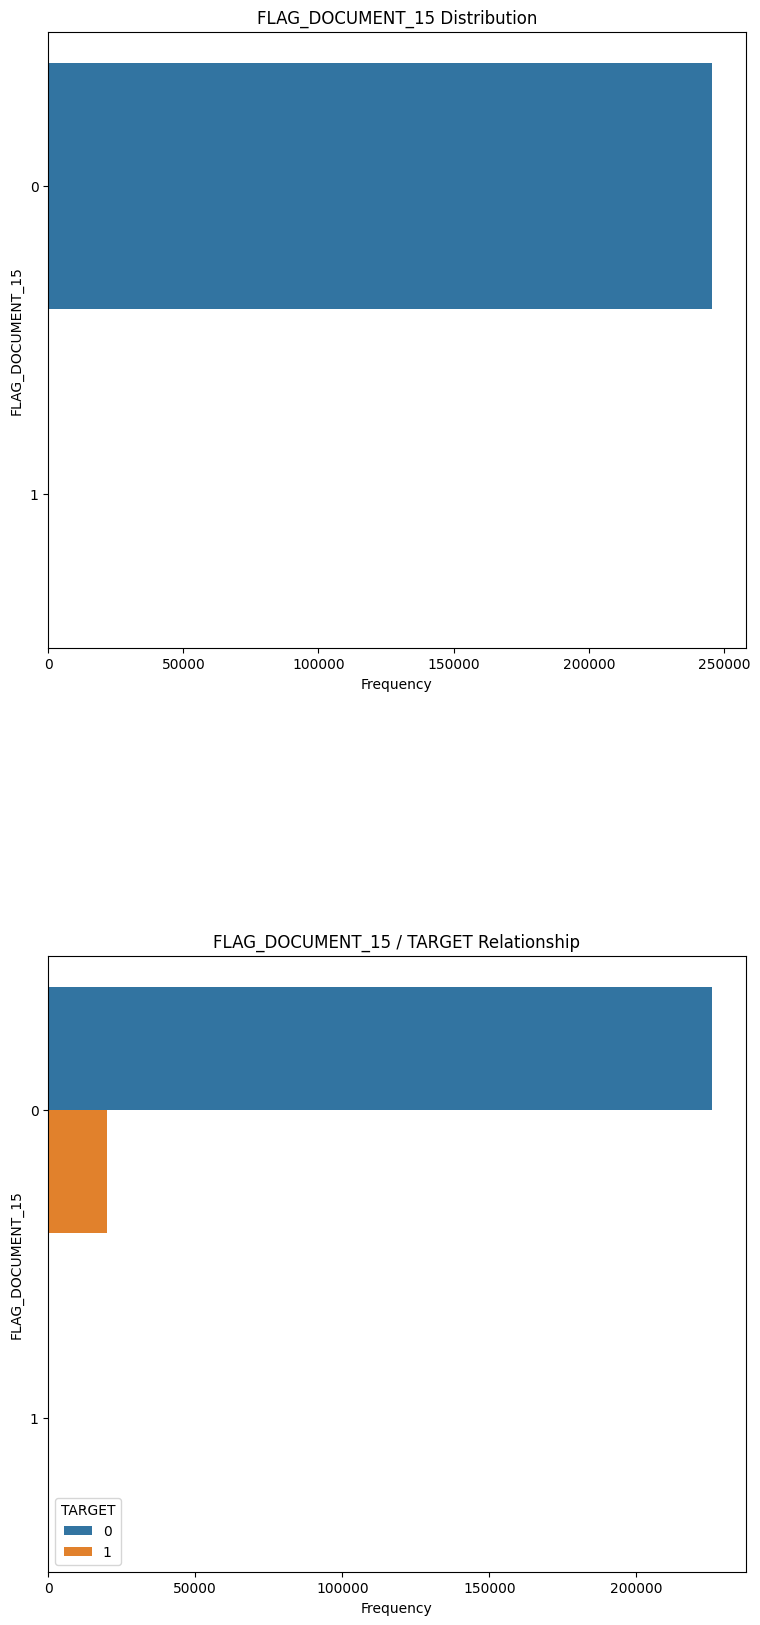

In [66]:
analyze_cat(categorical_features[42], eda_df)

FLAG_DOCUMENT_16 distribution:

FLAG_DOCUMENT_16
0    0.990037
1    0.009963
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_16  TARGET
0                 0         0.918873
                  1         0.081127
1                 0         0.952264
                  1         0.047736
Name: proportion, dtype: float64



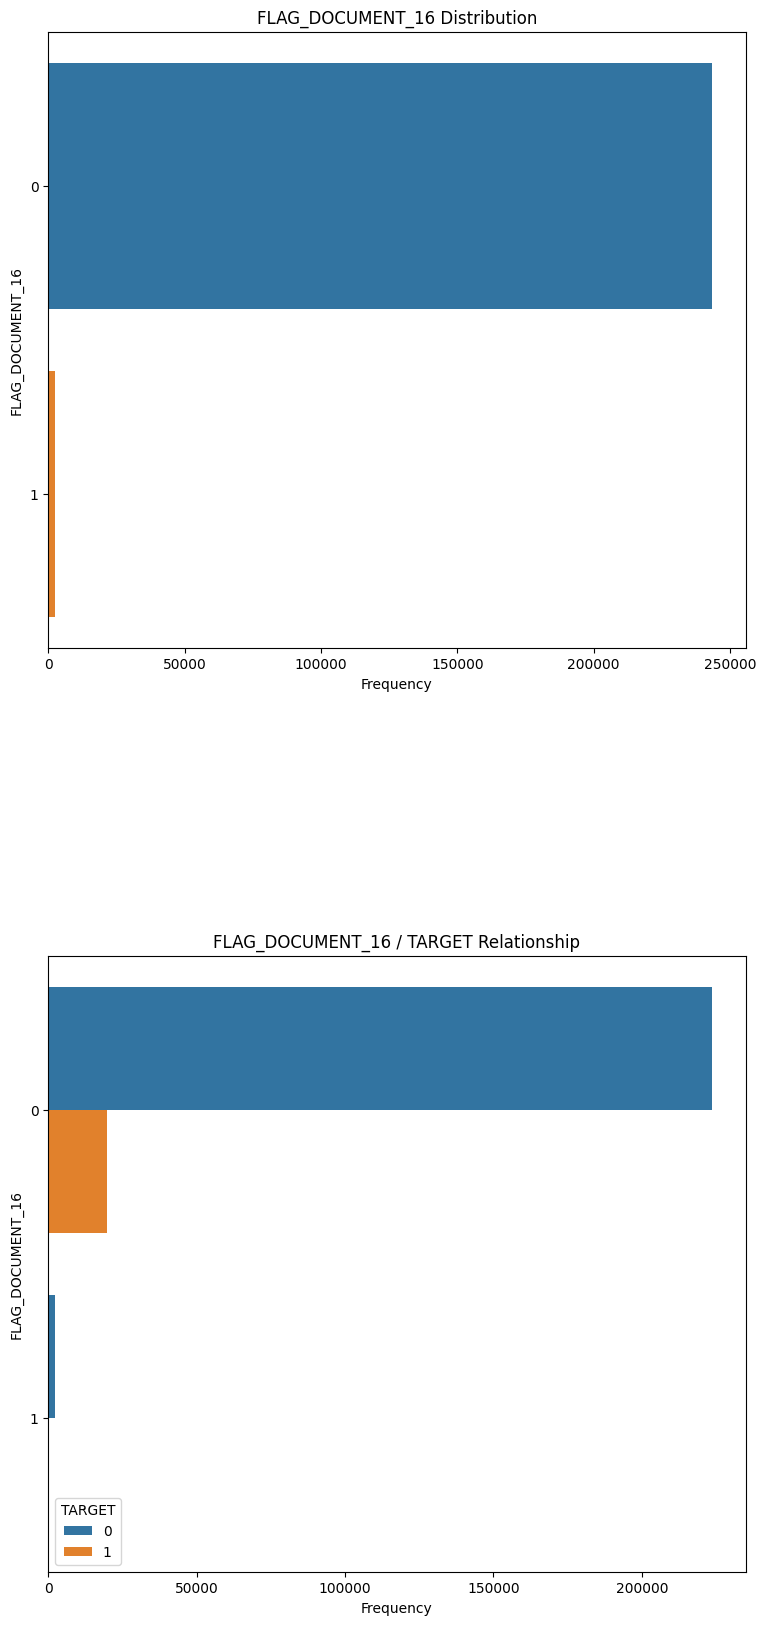

In [67]:
analyze_cat(categorical_features[43], eda_df)

FLAG_DOCUMENT_17 distribution:

FLAG_DOCUMENT_17
0    0.999756
1    0.000244
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_17  TARGET
0                 0         0.919194
                  1         0.080806
1                 0         0.966667
                  1         0.033333
Name: proportion, dtype: float64



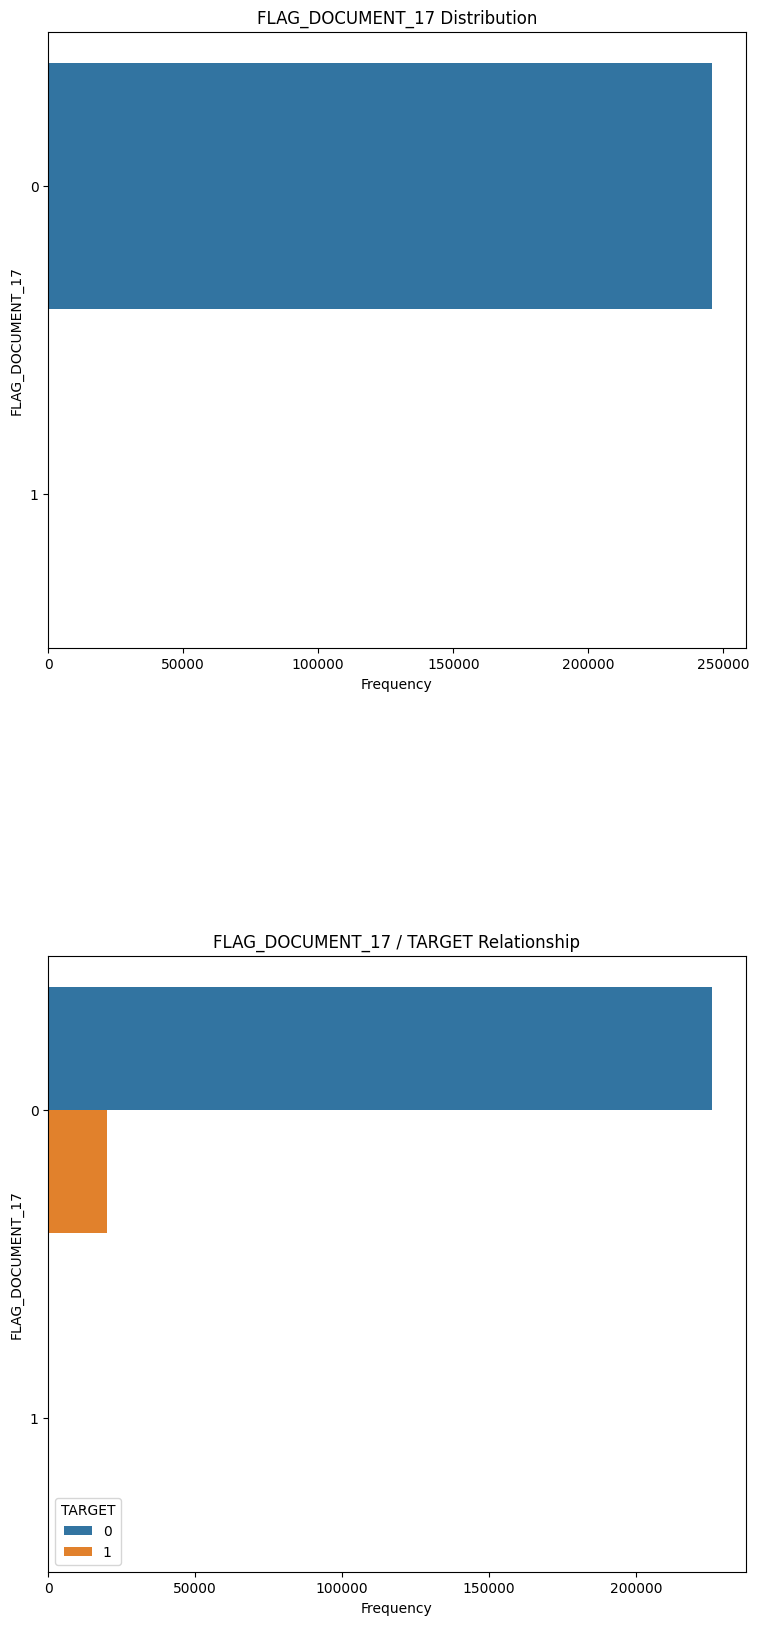

In [68]:
analyze_cat(categorical_features[44], eda_df)

FLAG_DOCUMENT_18 distribution:

FLAG_DOCUMENT_18
0    0.99187
1    0.00813
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_18  TARGET
0                 0         0.919003
                  1         0.080997
1                 0         0.944000
                  1         0.056000
Name: proportion, dtype: float64



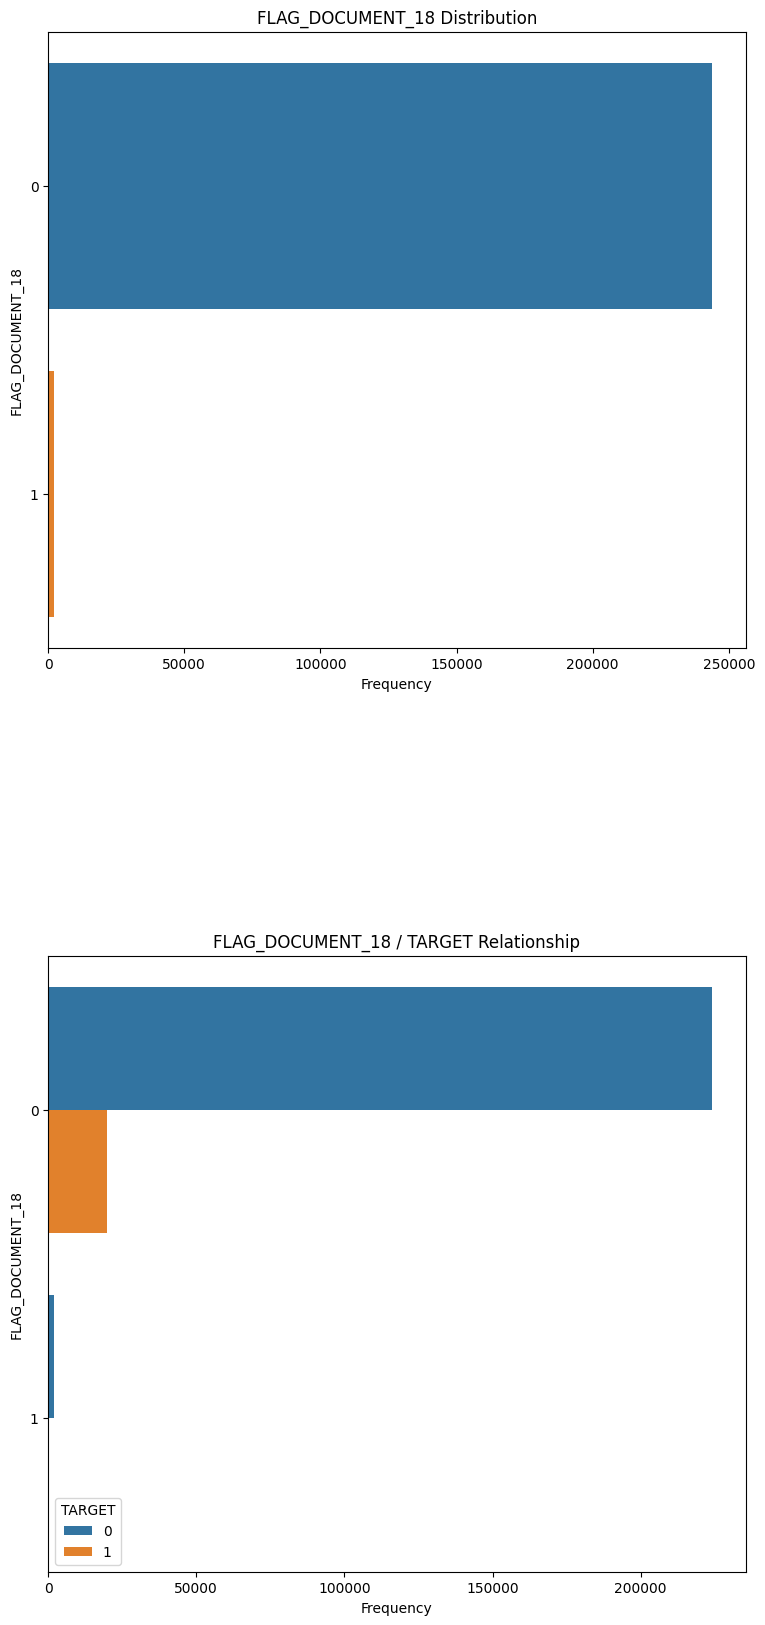

In [69]:
analyze_cat(categorical_features[45], eda_df)

FLAG_DOCUMENT_19 distribution:

FLAG_DOCUMENT_19
0    0.999419
1    0.000581
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_19  TARGET
0                 0         0.919204
                  1         0.080796
1                 0         0.923077
                  1         0.076923
Name: proportion, dtype: float64



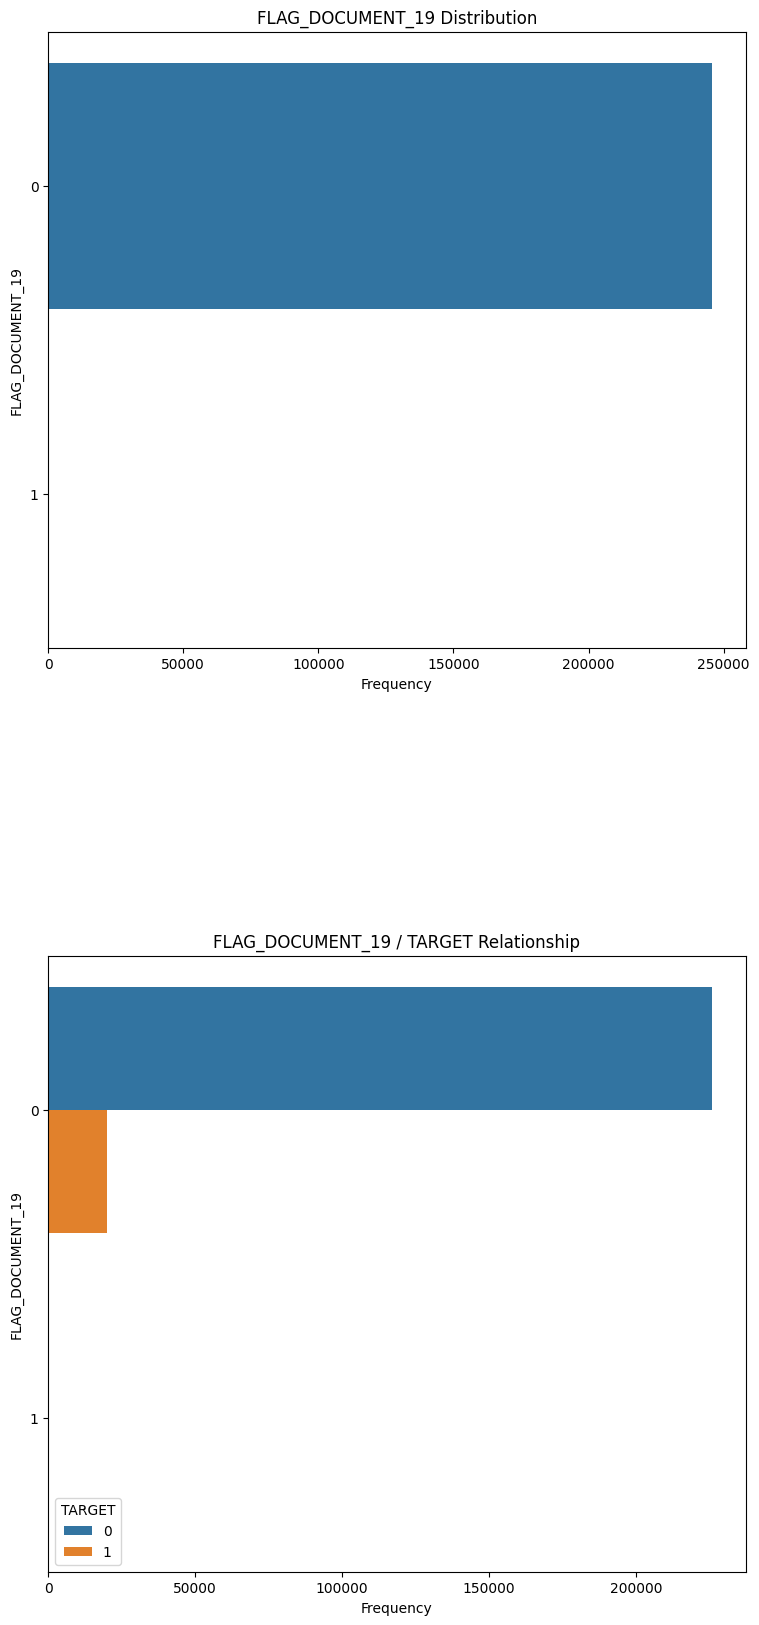

In [70]:
analyze_cat(categorical_features[46], eda_df)

FLAG_DOCUMENT_20 distribution:

FLAG_DOCUMENT_20
0    0.999504
1    0.000496
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_20  TARGET
0                 0         0.919198
                  1         0.080802
1                 0         0.934426
                  1         0.065574
Name: proportion, dtype: float64



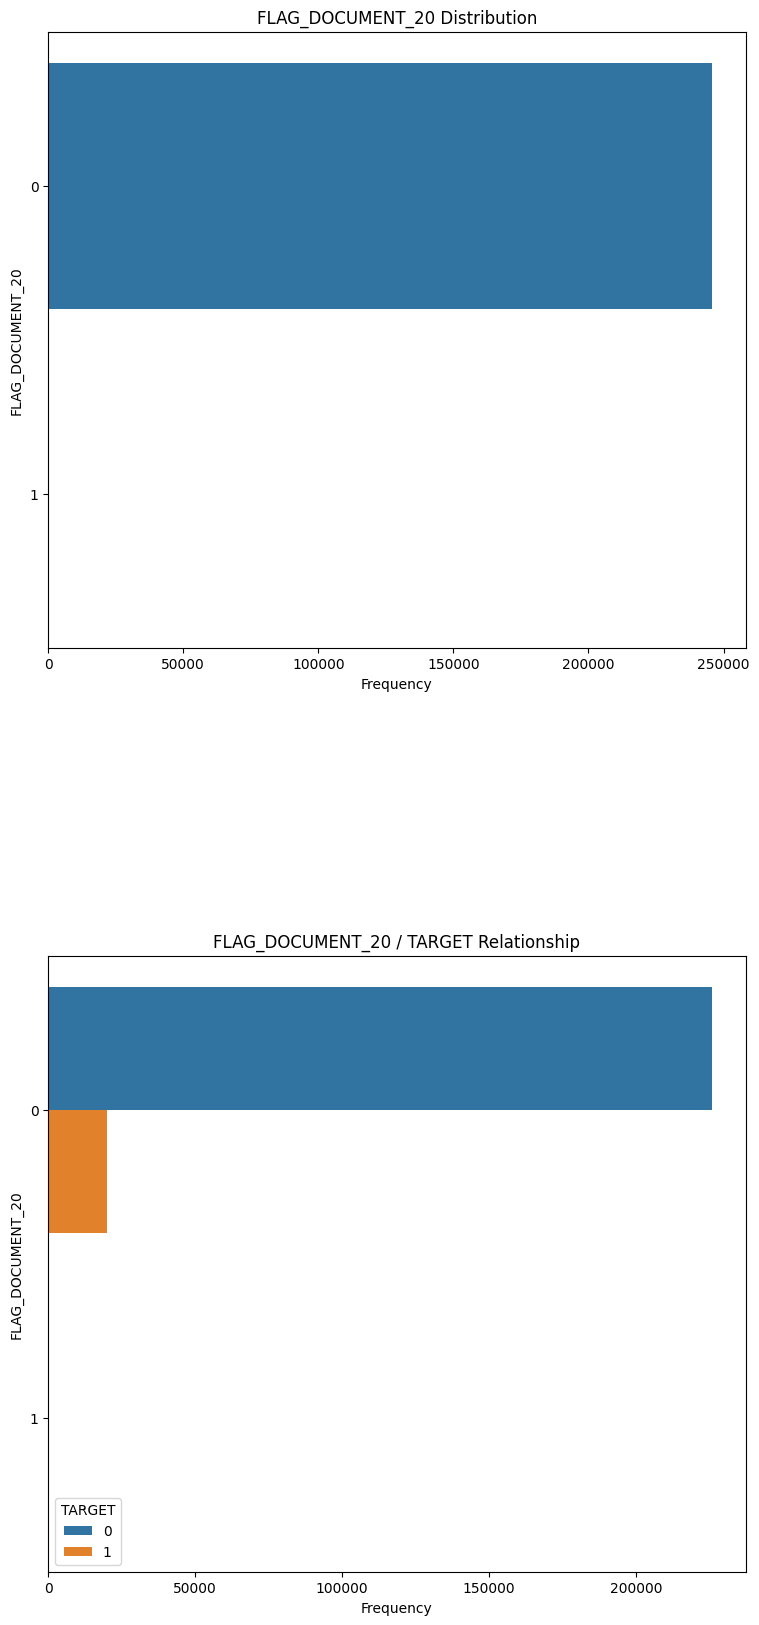

In [71]:
analyze_cat(categorical_features[47], eda_df)

FLAG_DOCUMENT_21 distribution:

FLAG_DOCUMENT_21
0    0.999691
1    0.000309
Name: proportion, dtype: float64

According to target:

FLAG_DOCUMENT_21  TARGET
0                 0         0.919218
                  1         0.080782
1                 0         0.881579
                  1         0.118421
Name: proportion, dtype: float64



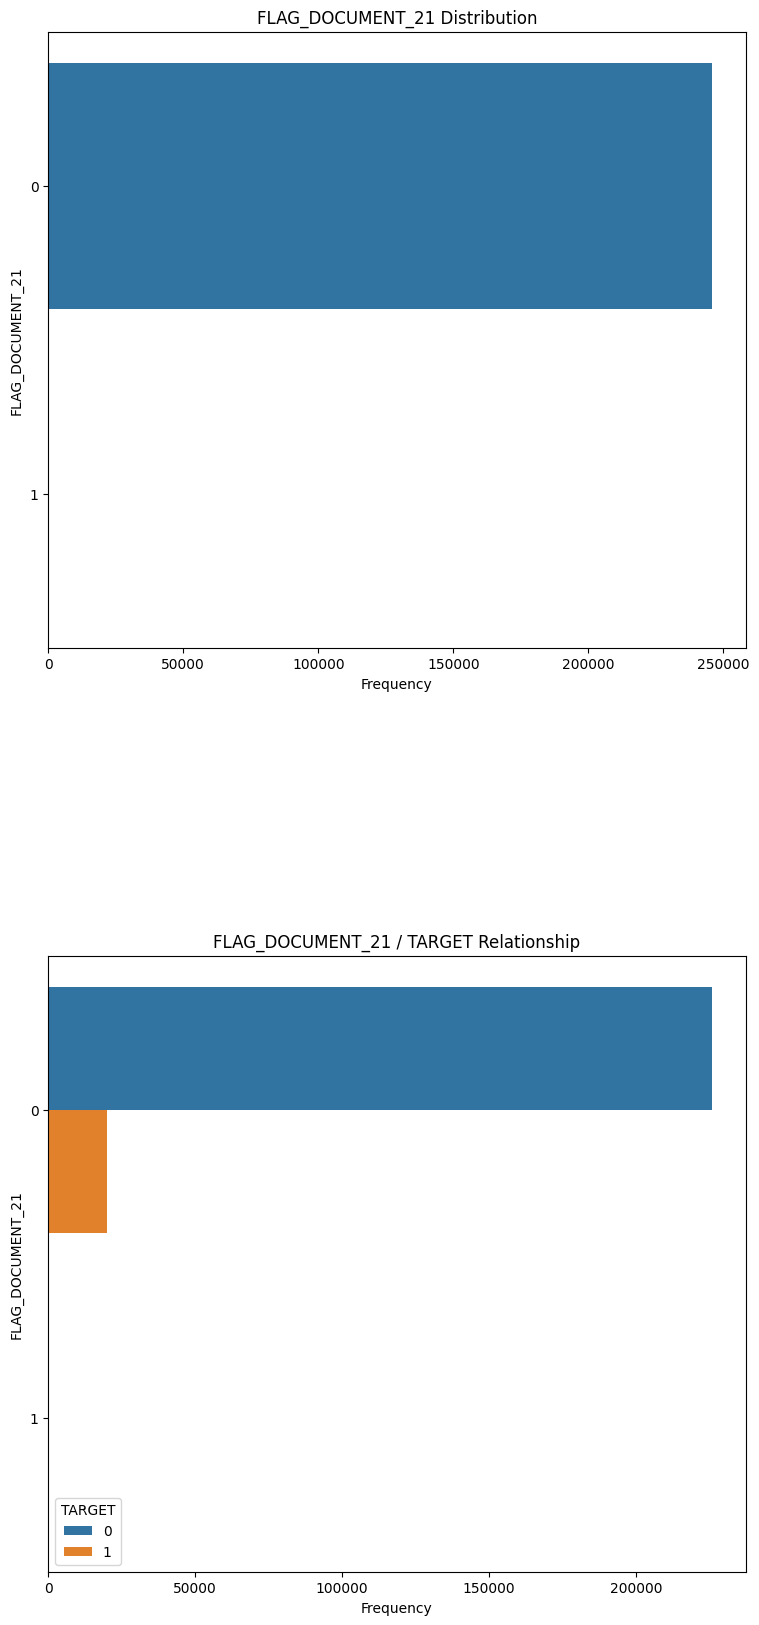

In [72]:
analyze_cat(categorical_features[48], eda_df)

#### Notes:
* Most of features are highly imbalanced across different categories.
* Alot of fearures don't show any change of target distribution across the categories. 

**Decisions:**
* Drop unimportant features.

## Numerical Features:

In [82]:
numerical_features = ['DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_3',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'HOUR_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_2',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REG_REGION_NOT_WORK_REGION',
 'REGION_POPULATION_RELATIVE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'CNT_CHILDREN']

In [83]:
len(numerical_features)

22

DAYS_EMPLOYED Distribution:

count    246008.000000
mean      67760.970542
std      139474.710101
min           0.000000
25%         932.000000
50%        2218.000000
75%        5710.250000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

According to target:
           count          mean            std  min    25%     50%      75%       max
TARGET                                                                              
0       226132.0  69693.373729  141004.564224  0.0  965.0  2302.0  6082.00  365243.0
1        19876.0  45775.752314  118516.858083  0.0  679.0  1458.0  3290.25  365243.0


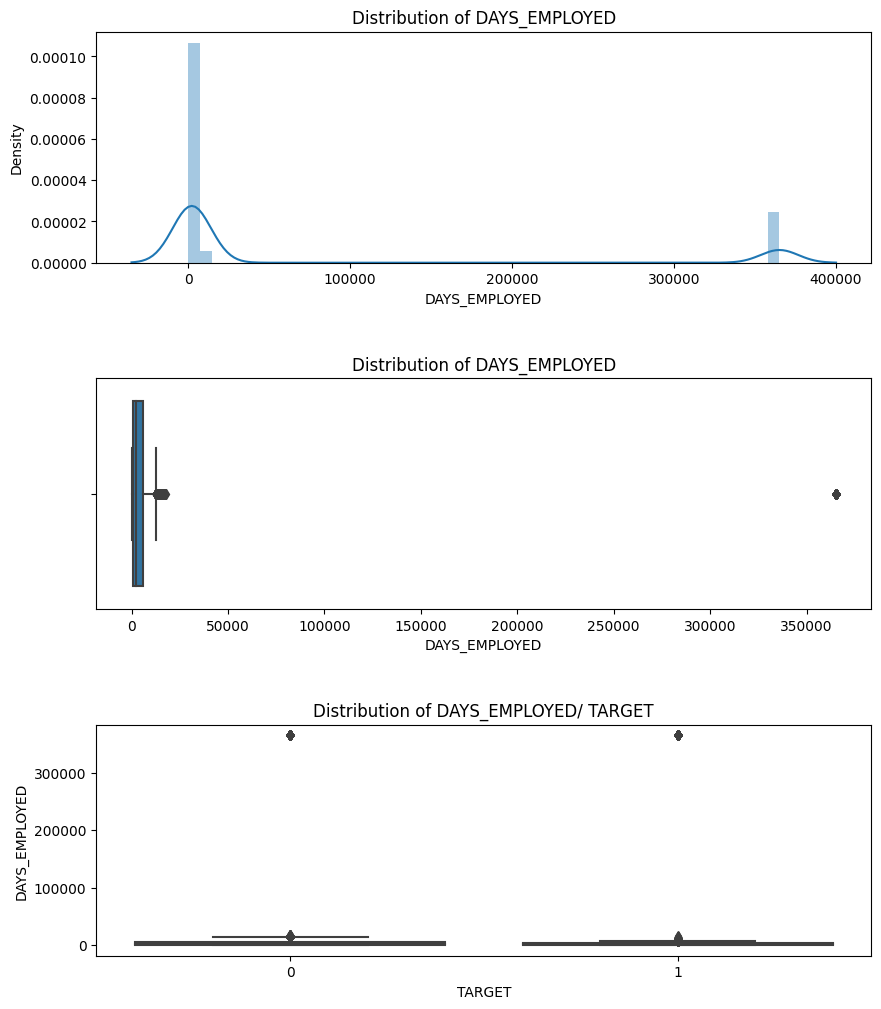

In [92]:
analyze_cont(numerical_features[0], eda_df)

DAYS_REGISTRATION Distribution:

count    246008.000000
mean       4985.212908
std        3521.395506
min           0.000000
25%        2006.000000
50%        4504.000000
75%        7482.000000
max       23416.000000
Name: DAYS_REGISTRATION, dtype: float64

According to target:
           count         mean          std  min     25%     50%     75%      max
TARGET                                                                          
0       226132.0  5028.759955  3536.991174  0.0  2042.0  4545.0  7552.0  23416.0
1        19876.0  4489.772137  3298.688294  0.0  1674.0  4060.0  6676.0  22928.0


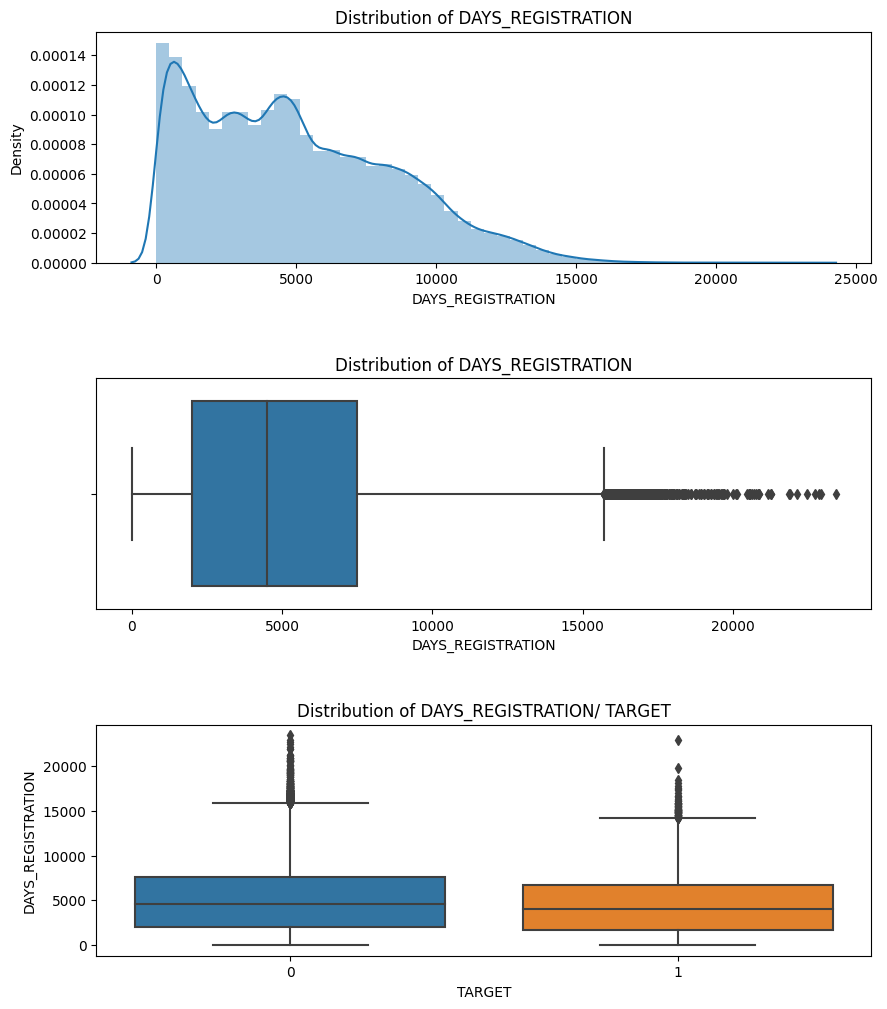

In [94]:
analyze_cont(numerical_features[1], eda_df)

CNT_FAM_MEMBERS Distribution:

count    246007.000000
mean          2.152642
std           0.908734
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       226131.0  2.150002  0.905024  1.0  2.0  2.0  3.0  20.0
1        19876.0  2.182683  0.949430  1.0  2.0  2.0  3.0  13.0


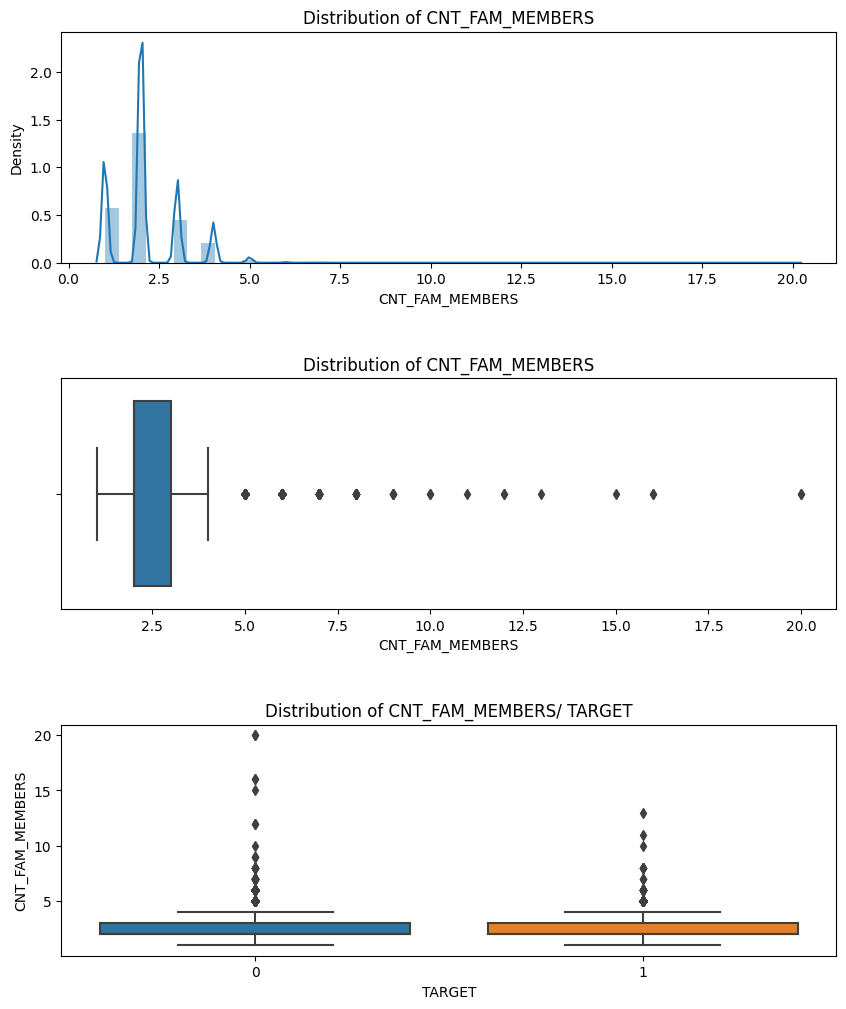

In [95]:
analyze_cont(numerical_features[2], eda_df)

OBS_30_CNT_SOCIAL_CIRCLE Distribution:

count    245203.000000
mean          1.421834
std           2.415520
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%    max
TARGET                                                         
0       225356.0  1.415596  2.419700  0.0  0.0  0.0  2.0  348.0
1        19847.0  1.492669  2.366443  0.0  0.0  0.0  2.0   30.0


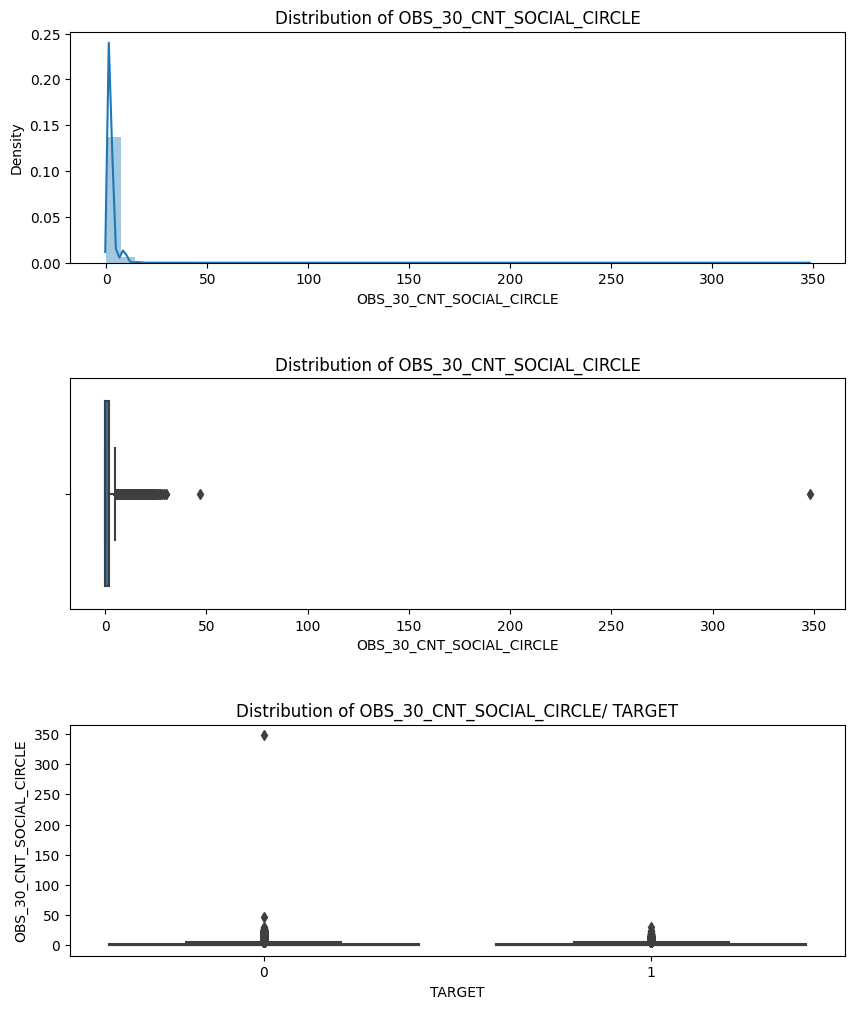

In [96]:
analyze_cont(numerical_features[3], eda_df)

EXT_SOURCE_3 Distribution:

count    197184.000000
mean          0.511034
std           0.194838
min           0.000527
25%           0.370650
50%           0.537070
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

According to target:
           count      mean       std       min       25%      50%       75%       max
TARGET                                                                               
0       181867.0  0.521217  0.190397  0.000527  0.385915  0.54781  0.673830  0.893976
1        15317.0  0.390123  0.205974  0.000527  0.222581  0.37910  0.551381  0.896010


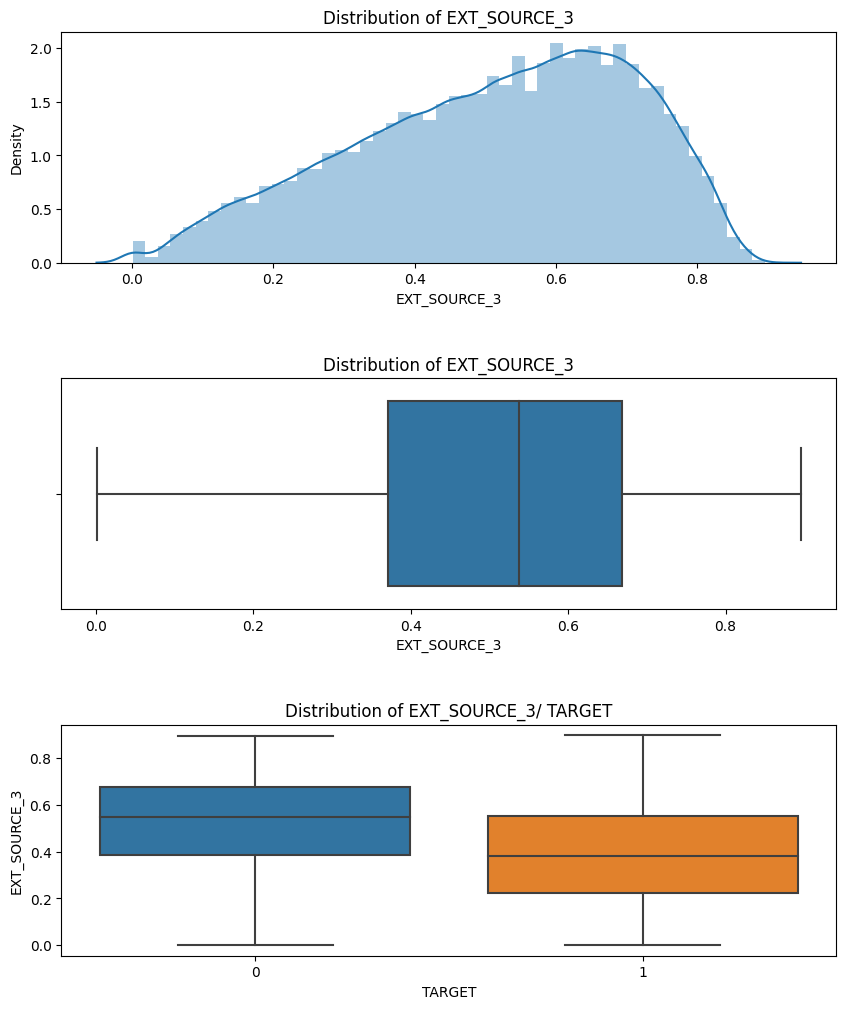

In [97]:
analyze_cont(numerical_features[4], eda_df)

LIVE_CITY_NOT_WORK_CITY Distribution:

count    246008.000000
mean          0.179149
std           0.383478
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       226132.0  0.175375  0.380289  0.0  0.0  0.0  0.0  1.0
1        19876.0  0.222077  0.415653  0.0  0.0  0.0  0.0  1.0


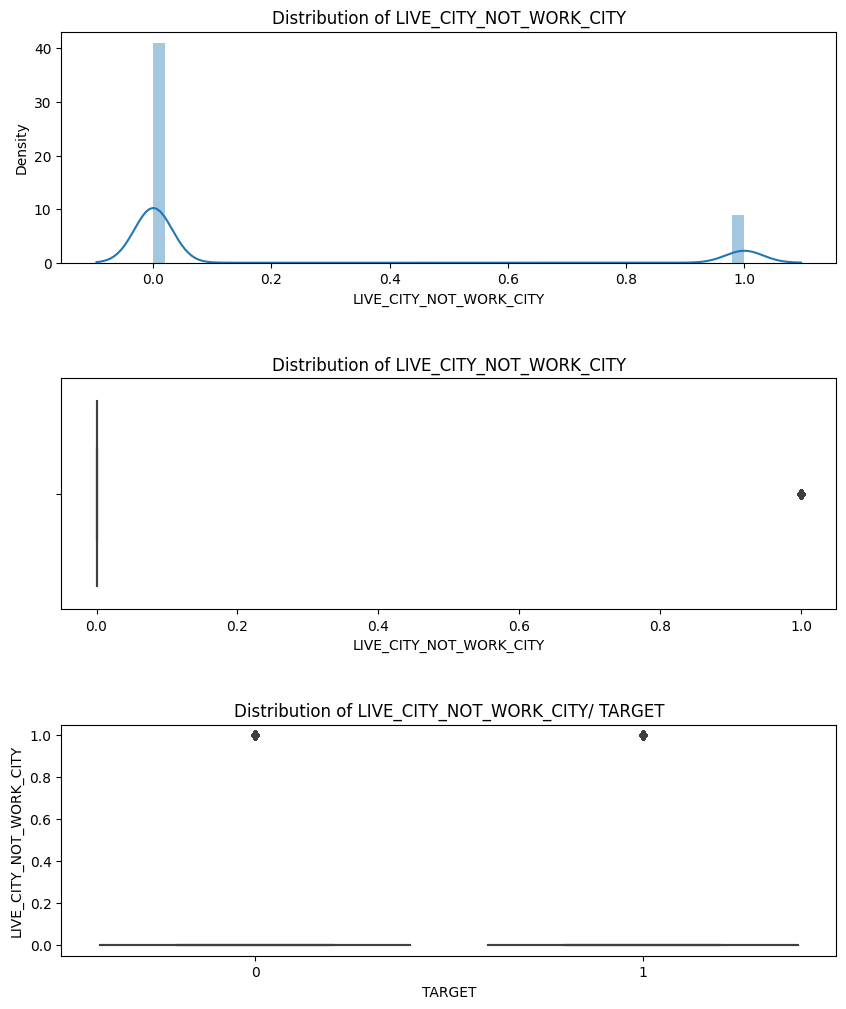

In [98]:
analyze_cont(numerical_features[5], eda_df)

AMT_REQ_CREDIT_BUREAU_DAY Distribution:

count    212797.000000
mean          0.006729
std           0.106693
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       196346.0  0.006621  0.106844  0.0  0.0  0.0  0.0  9.0
1        16451.0  0.008024  0.104878  0.0  0.0  0.0  0.0  4.0


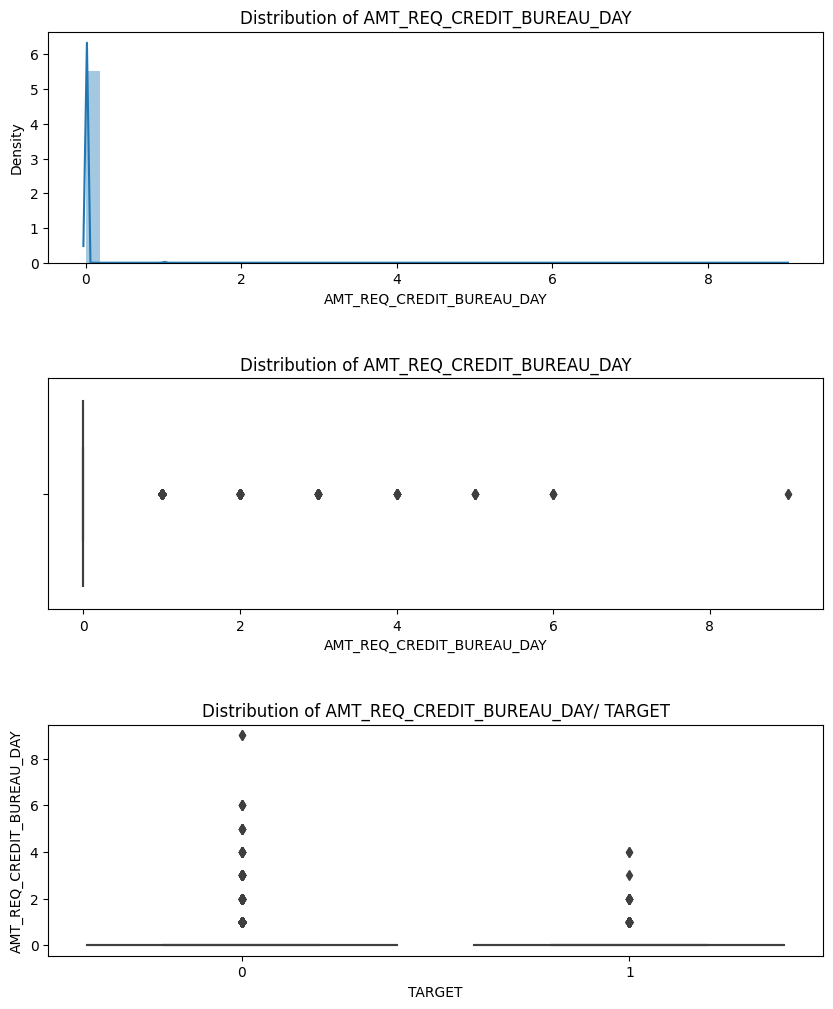

In [99]:
analyze_cont(numerical_features[6], eda_df)

AMT_GOODS_PRICE Distribution:

count    2.457840e+05
mean     5.389831e+05
std      3.700527e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

According to target:
           count           mean            std      min       25%       50%       75%        max
TARGET                                                                                          
0       225925.0  543444.048653  374461.595807  40500.0  238500.0  450000.0  688500.0  4050000.0
1        19859.0  488233.217508  311125.248053  45000.0  238500.0  450000.0  675000.0  3600000.0


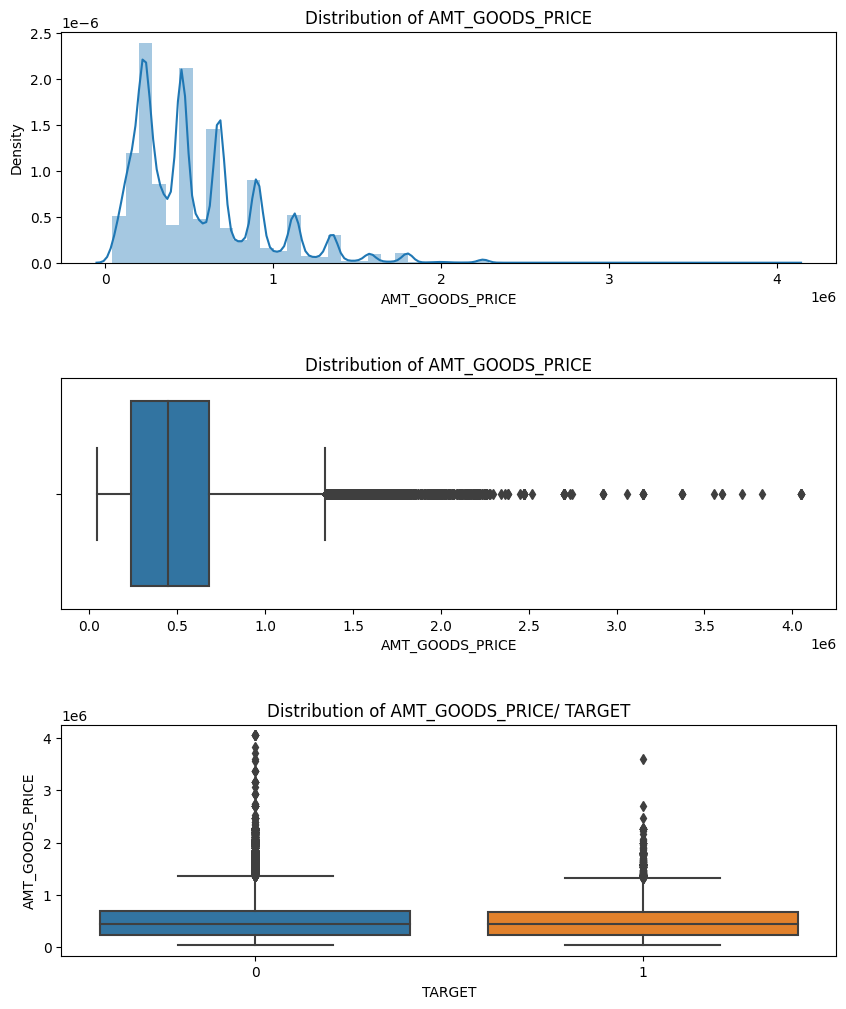

In [101]:
analyze_cont(numerical_features[7], eda_df)

AMT_CREDIT Distribution:

count    2.460080e+05
mean     5.996413e+05
std      4.030988e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

According to target:
           count           mean            std      min       25%       50%       75%        max
TARGET                                                                                          
0       226132.0  603409.779673  407544.281221  45000.0  270000.0  518562.0  813195.0  4050000.0
1        19876.0  556766.844234  345681.361709  45000.0  284400.0  495000.0  729792.0  4027680.0


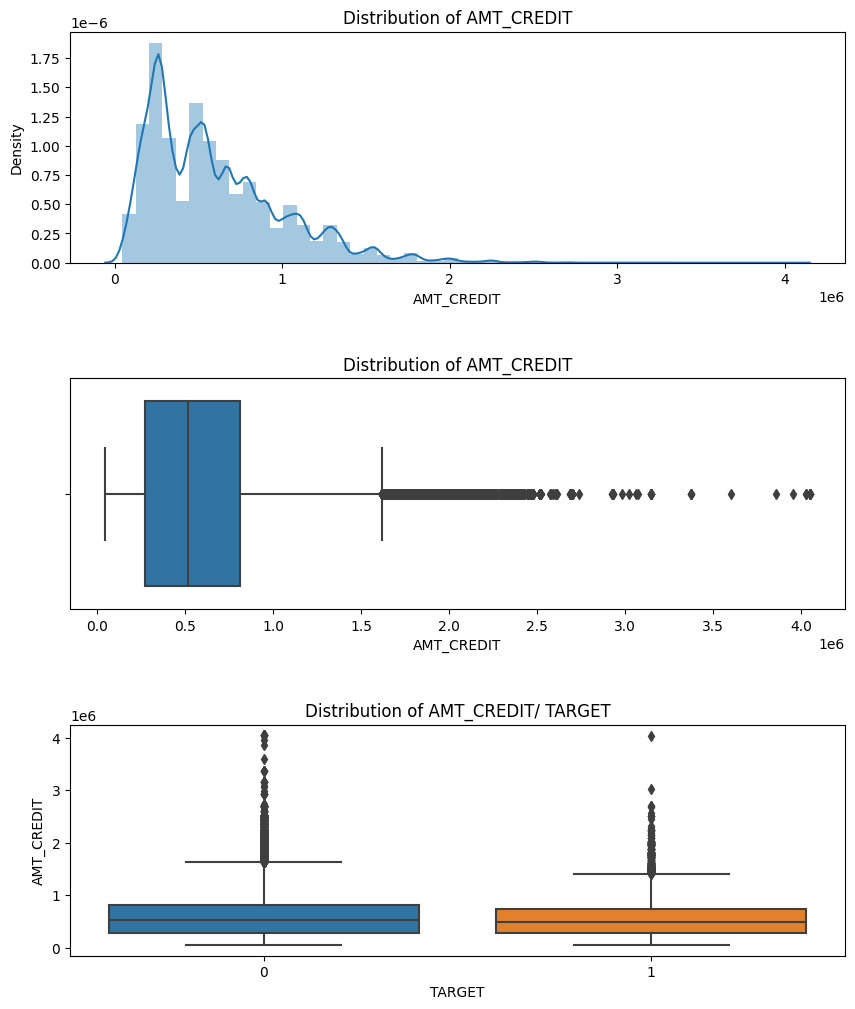

In [102]:
analyze_cont(numerical_features[8], eda_df)

AMT_ANNUITY Distribution:

count    245998.000000
mean      27120.236898
std       14510.664192
min        1615.500000
25%       16506.000000
50%       24903.000000
75%       34654.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

According to target:
           count          mean           std     min      25%      50%      75%       max
TARGET                                                                                   
0       226122.0  27174.365557  14677.491743  1615.5  16452.0  24876.0  34785.0  258025.5
1        19876.0  26504.434896  12440.160967  2722.5  17419.5  25299.0  32998.5  149211.0


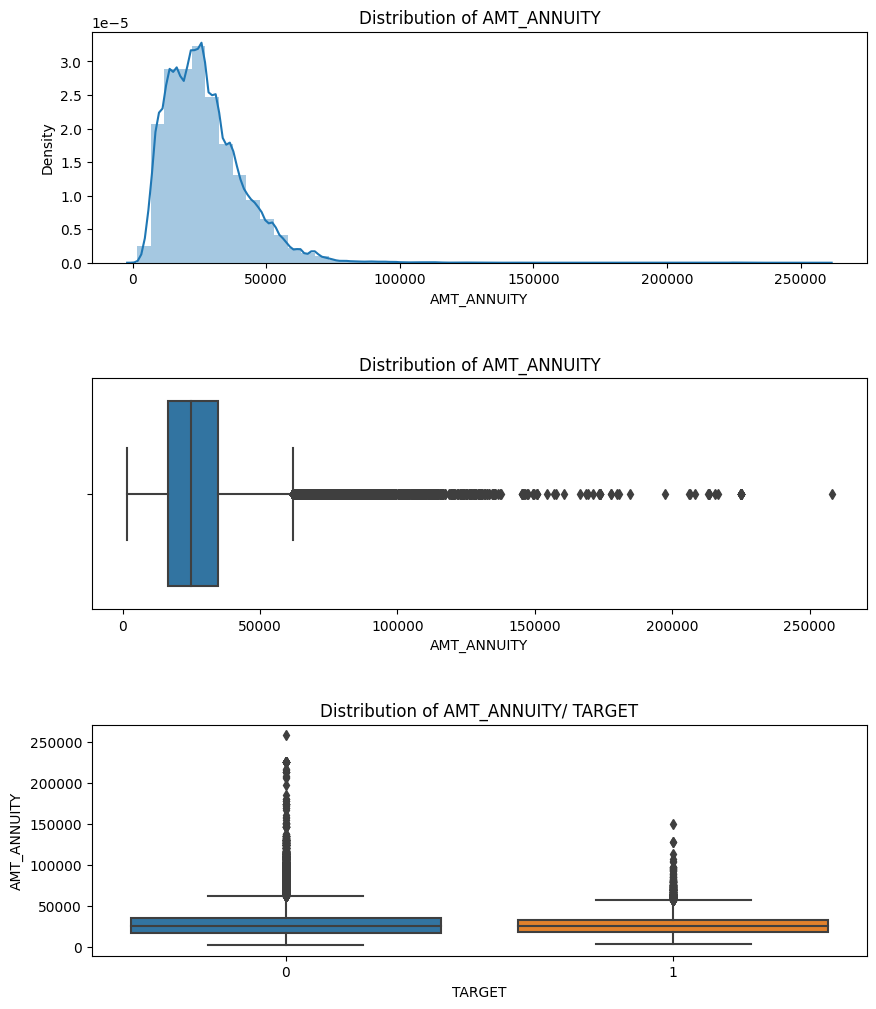

In [103]:
analyze_cont(numerical_features[9], eda_df)

DAYS_ID_PUBLISH Distribution:

count    246008.000000
mean       2992.976383
std        1509.083842
min           0.000000
25%        1719.000000
50%        3251.000000
75%        4297.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

According to target:
           count         mean          std  min      25%     50%     75%     max
TARGET                                                                          
0       226132.0  3016.338616  1506.137767  0.0  1756.00  3293.0  4311.0  7197.0
1        19876.0  2727.181022  1517.121145  0.0  1387.75  2788.0  4119.0  6207.0


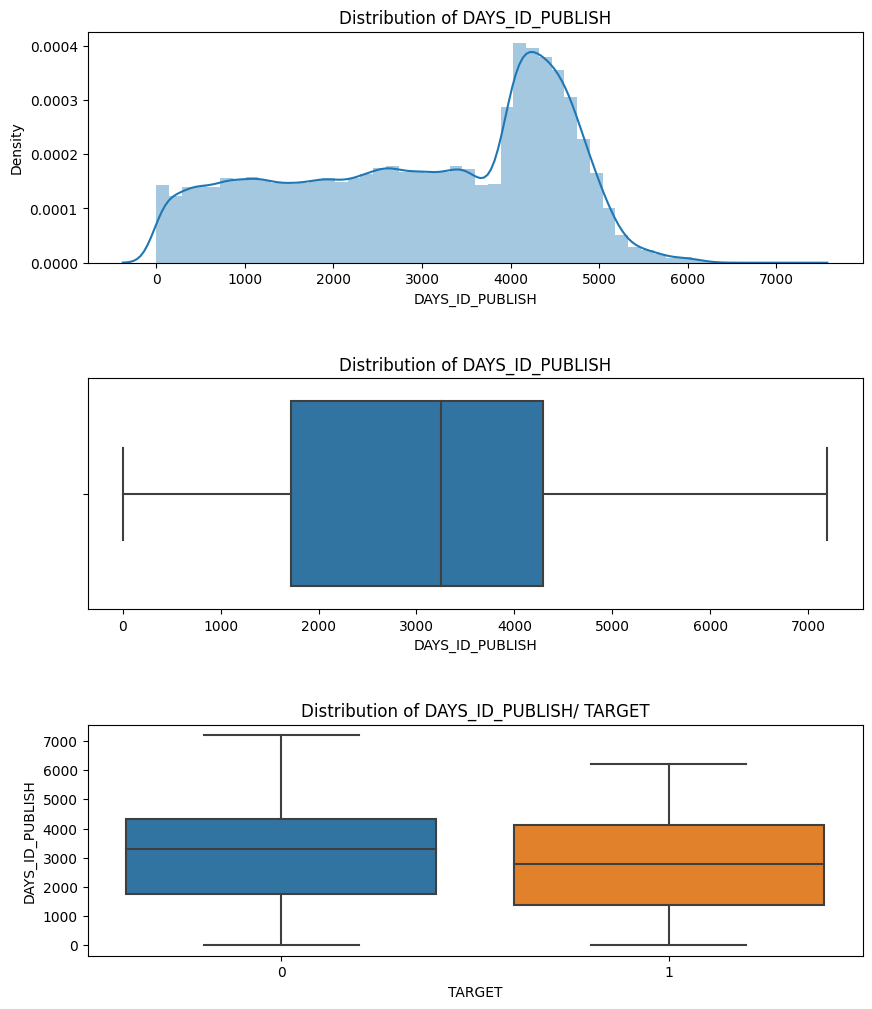

In [104]:
analyze_cont(numerical_features[10], eda_df)

DAYS_BIRTH Distribution:

count    246008.000000
mean      16038.934417
std        4361.270335
min        7489.000000
25%       12418.000000
50%       15755.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

According to target:
           count          mean          std     min      25%      50%       75%      max
TARGET                                                                                  
0       226132.0  16139.312322  4361.484395  7489.0  12542.0  15881.0  19791.00  25229.0
1        19876.0  14896.921111  4193.029100  7678.0  11406.0  14303.5  18054.25  25168.0


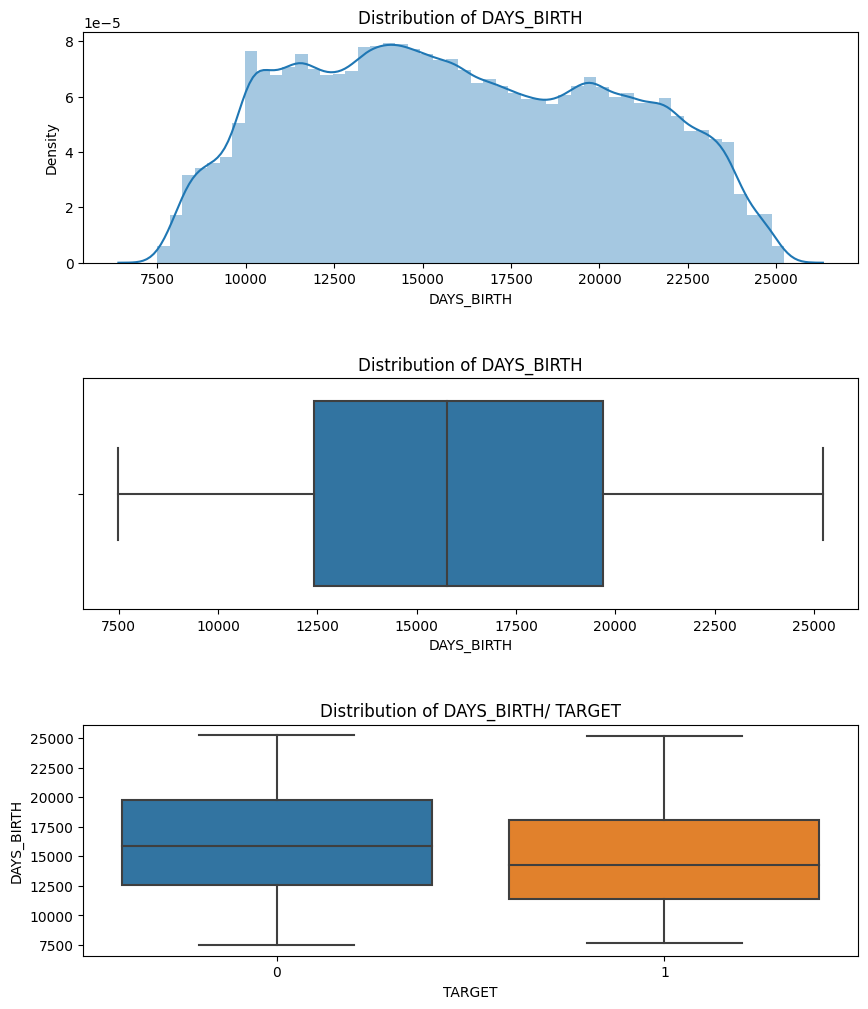

In [105]:
analyze_cont(numerical_features[11], eda_df)

HOUR_APPR_PROCESS_START Distribution:

count    246008.000000
mean         12.063360
std           3.268046
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

According to target:
           count       mean       std  min   25%   50%   75%   max
TARGET                                                            
0       226132.0  12.085357  3.264812  0.0  10.0  12.0  14.0  23.0
1        19876.0  11.813091  3.294368  0.0  10.0  12.0  14.0  23.0


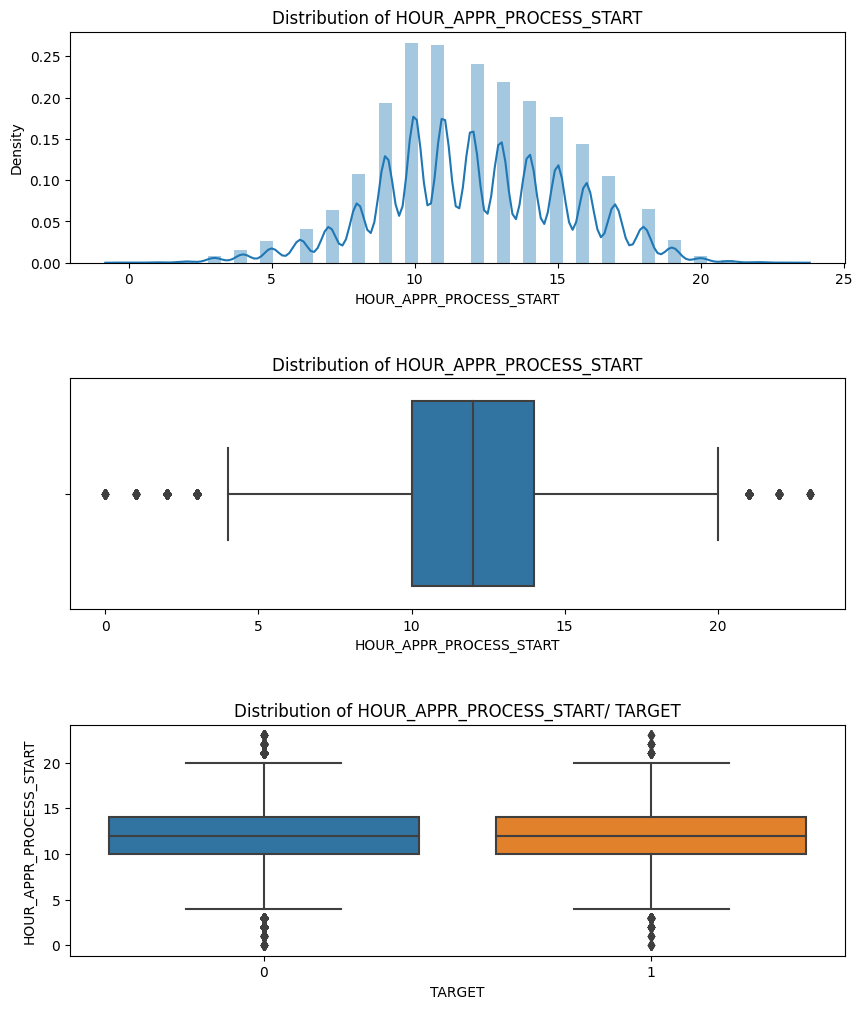

In [106]:
analyze_cont(numerical_features[12], eda_df)

DAYS_LAST_PHONE_CHANGE Distribution:

count    246007.000000
mean        962.679249
std         827.636821
min           0.000000
25%         273.000000
50%         756.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

According to target:
           count        mean         std  min    25%    50%     75%     max
TARGET                                                                     
0       226131.0  975.886451  832.016200  0.0  280.0  775.0  1586.0  4292.0
1        19876.0  812.419752  760.104066  0.0  194.0  600.0  1305.0  4070.0


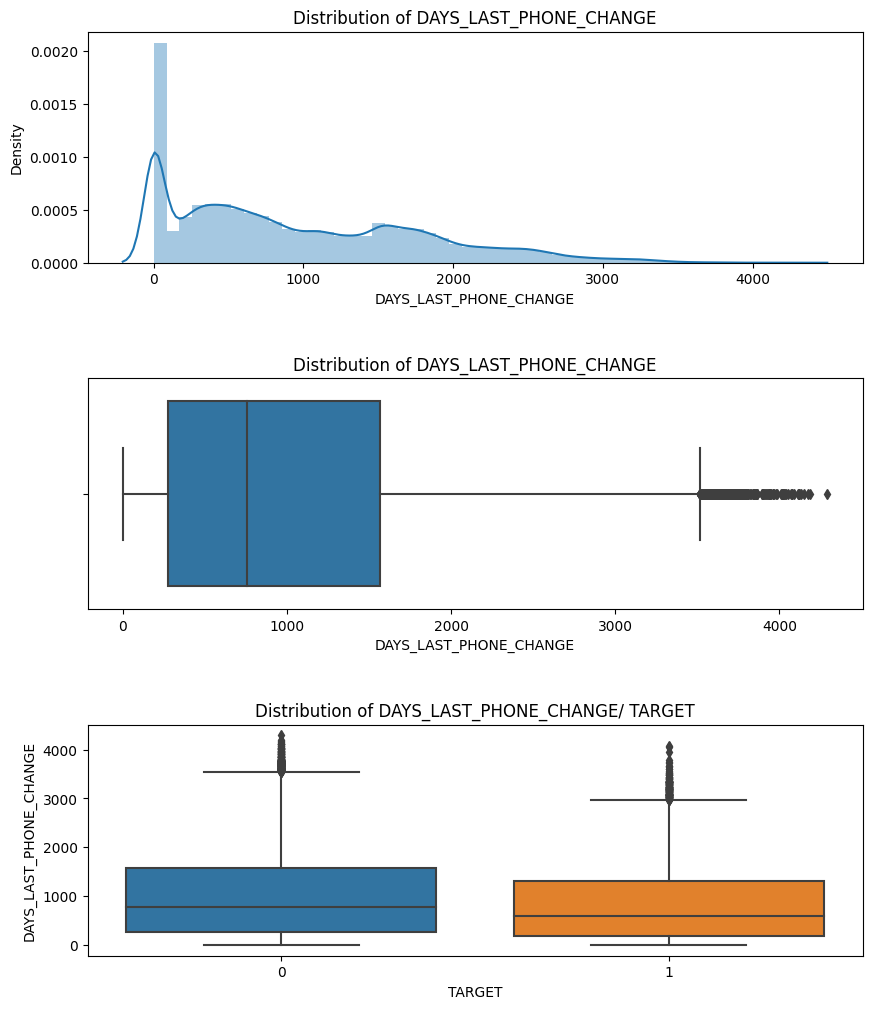

In [107]:
analyze_cont(numerical_features[13], eda_df)

EXT_SOURCE_2 Distribution:

count    2.454790e+05
mean     5.143846e-01
std      1.910533e-01
min      8.173617e-08
25%      3.922228e-01
50%      5.658916e-01
75%      6.637440e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

According to target:
           count      mean       std           min       25%       50%       75%       max
TARGET                                                                                    
0       225647.0  0.523380  0.186326  8.173617e-08  0.409457  0.573867  0.667807  0.855000
1        19832.0  0.412032  0.213087  5.002109e-06  0.241138  0.441073  0.595381  0.809908


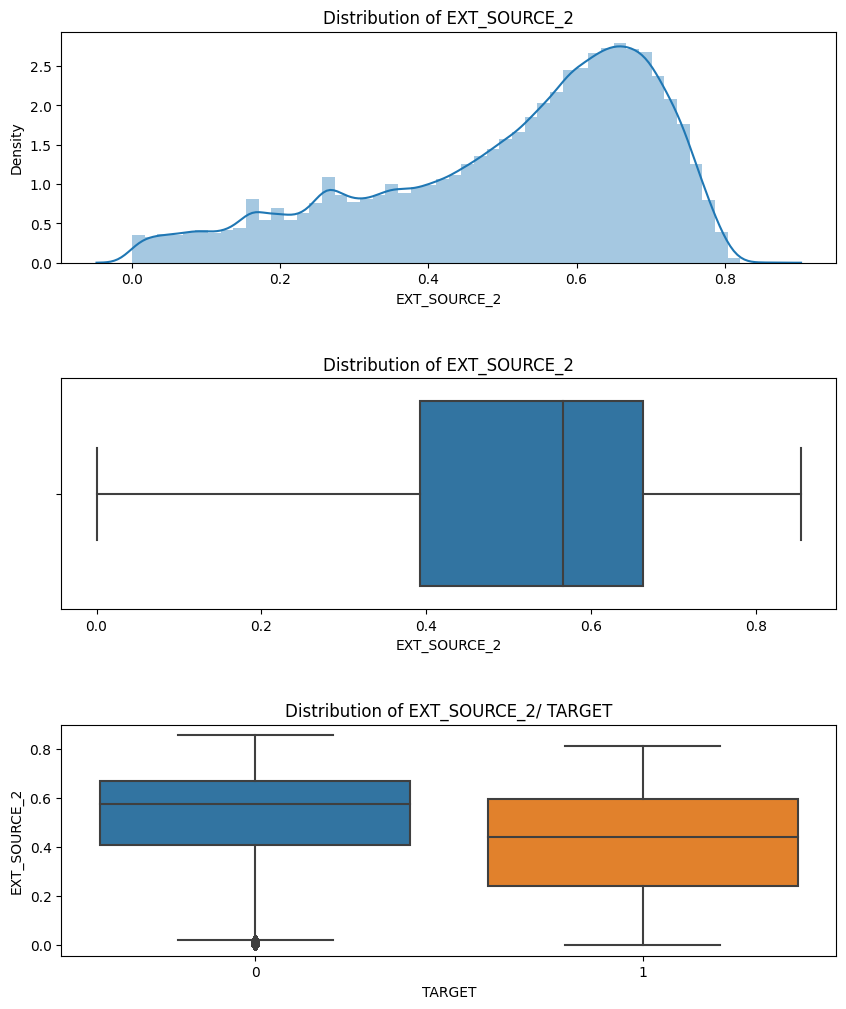

In [108]:
analyze_cont(numerical_features[14], eda_df)

OBS_60_CNT_SOCIAL_CIRCLE Distribution:

count    245203.000000
mean          1.404787
std           2.394182
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%    max
TARGET                                                         
0       225356.0  1.398685  2.398440  0.0  0.0  0.0  2.0  344.0
1        19847.0  1.474077  2.344235  0.0  0.0  0.0  2.0   29.0


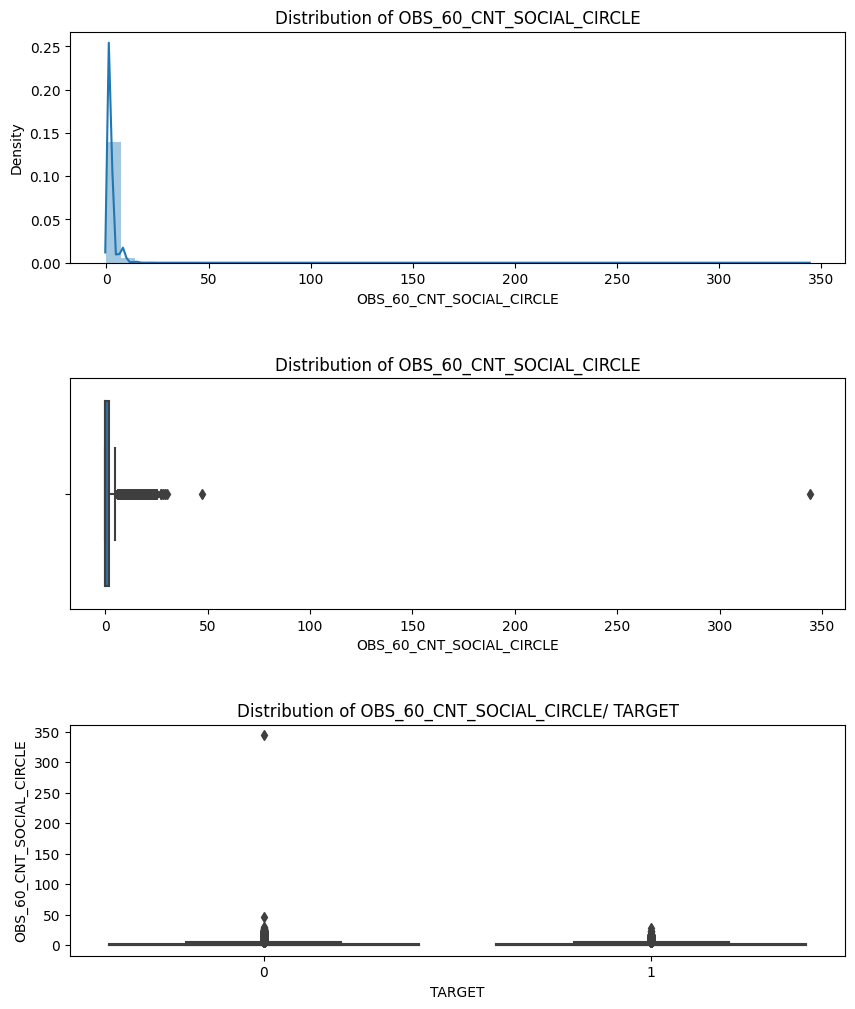

In [109]:
analyze_cont(numerical_features[15], eda_df)

REG_REGION_NOT_WORK_REGION Distribution:

count    246008.000000
mean          0.050921
std           0.219837
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%  max
TARGET                                                       
0       226132.0  0.050510  0.218996  0.0  0.0  0.0  0.0  1.0
1        19876.0  0.055595  0.229143  0.0  0.0  0.0  0.0  1.0


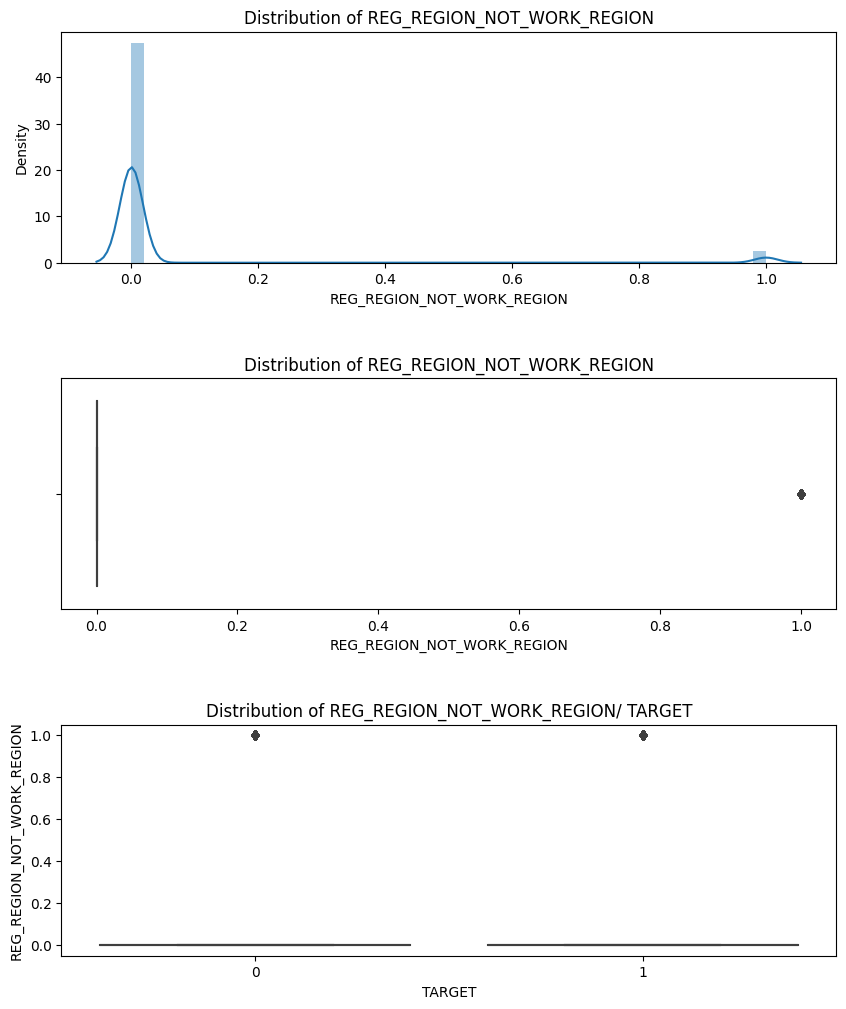

In [110]:
analyze_cont(numerical_features[16], eda_df)

REGION_POPULATION_RELATIVE Distribution:

count    246008.000000
mean          0.020855
std           0.013818
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

According to target:
           count      mean       std       min       25%       50%       75%       max
TARGET                                                                                
0       226132.0  0.021006  0.013961  0.000290  0.010006  0.018850  0.028663  0.072508
1        19876.0  0.019135  0.011944  0.000533  0.009630  0.018634  0.025164  0.072508


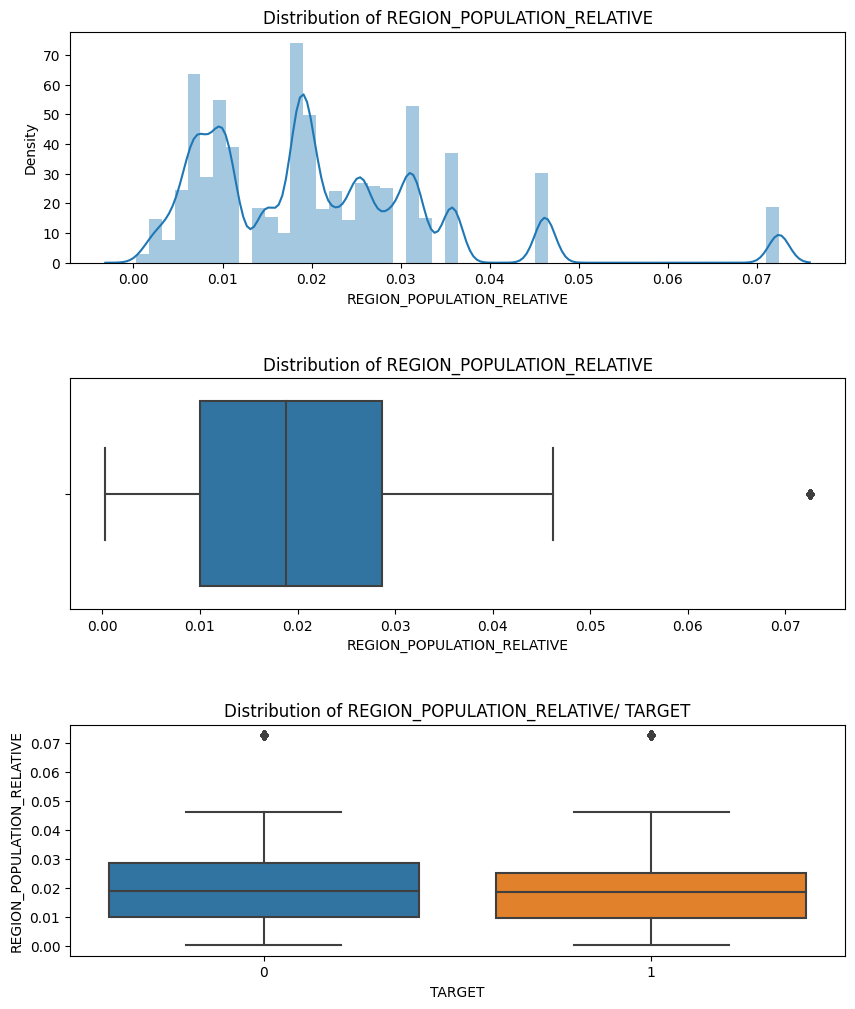

In [111]:
analyze_cont(numerical_features[17], eda_df)

DEF_30_CNT_SOCIAL_CIRCLE Distribution:

count    245203.000000
mean          0.143155
std           0.447389
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       225356.0  0.138825  0.440500  0.0  0.0  0.0  0.0  34.0
1        19847.0  0.192321  0.516722  0.0  0.0  0.0  0.0   5.0


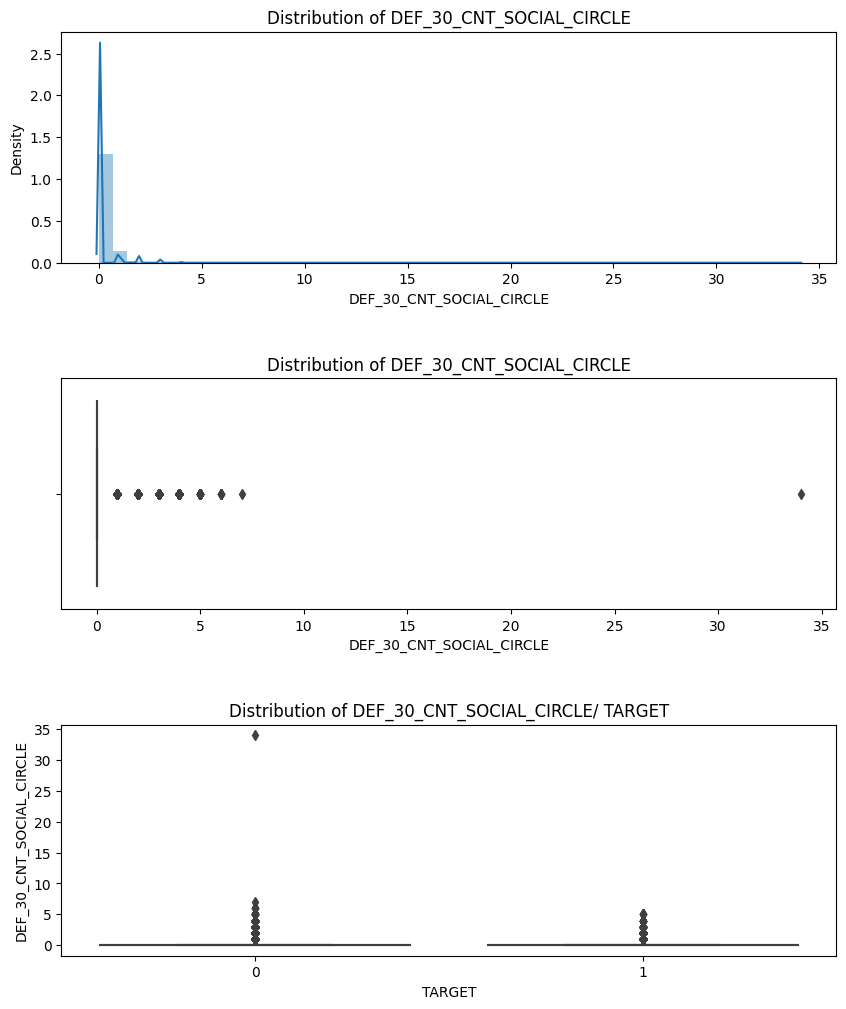

In [112]:
analyze_cont(numerical_features[18], eda_df)

DEF_60_CNT_SOCIAL_CIRCLE Distribution:

count    245203.000000
mean          0.100113
std           0.363496
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       225356.0  0.096652  0.356780  0.0  0.0  0.0  0.0  24.0
1        19847.0  0.139417  0.430568  0.0  0.0  0.0  0.0   5.0


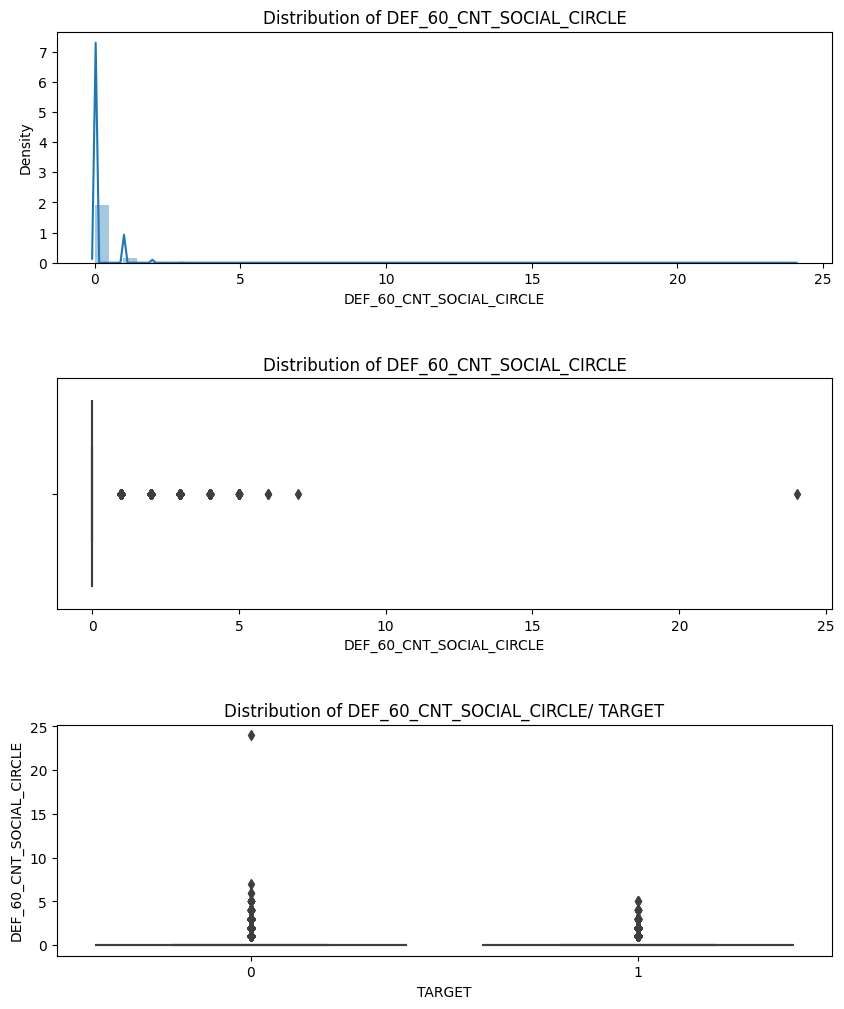

In [113]:
analyze_cont(numerical_features[19], eda_df)

AMT_INCOME_TOTAL Distribution:

count    2.460080e+05
mean     1.684589e+05
std      1.045299e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.350000e+07
Name: AMT_INCOME_TOTAL, dtype: float64

According to target:
           count           mean           std      min       25%       50%       75%         max
TARGET                                                                                          
0       226132.0  169090.661669  105796.50926  25650.0  112500.0  148500.0  202500.0  13500000.0
1        19876.0  161271.511446   88542.83467  25650.0  112500.0  135000.0  202500.0   3150000.0


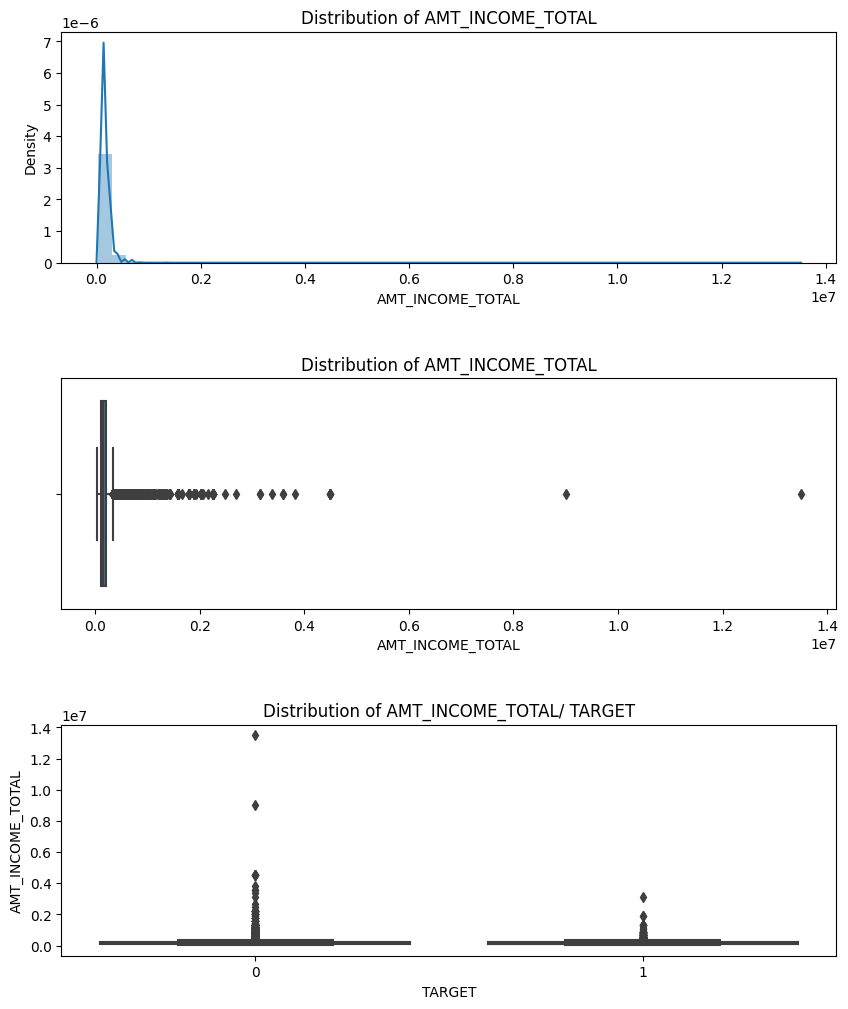

In [114]:
analyze_cont(numerical_features[20], eda_df)

CNT_CHILDREN Distribution:

count    246008.000000
mean          0.416230
std           0.720665
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

According to target:
           count      mean       std  min  25%  50%  75%   max
TARGET                                                        
0       226132.0  0.412034  0.717277  0.0  0.0  0.0  1.0  19.0
1        19876.0  0.463977  0.756530  0.0  0.0  0.0  1.0  11.0


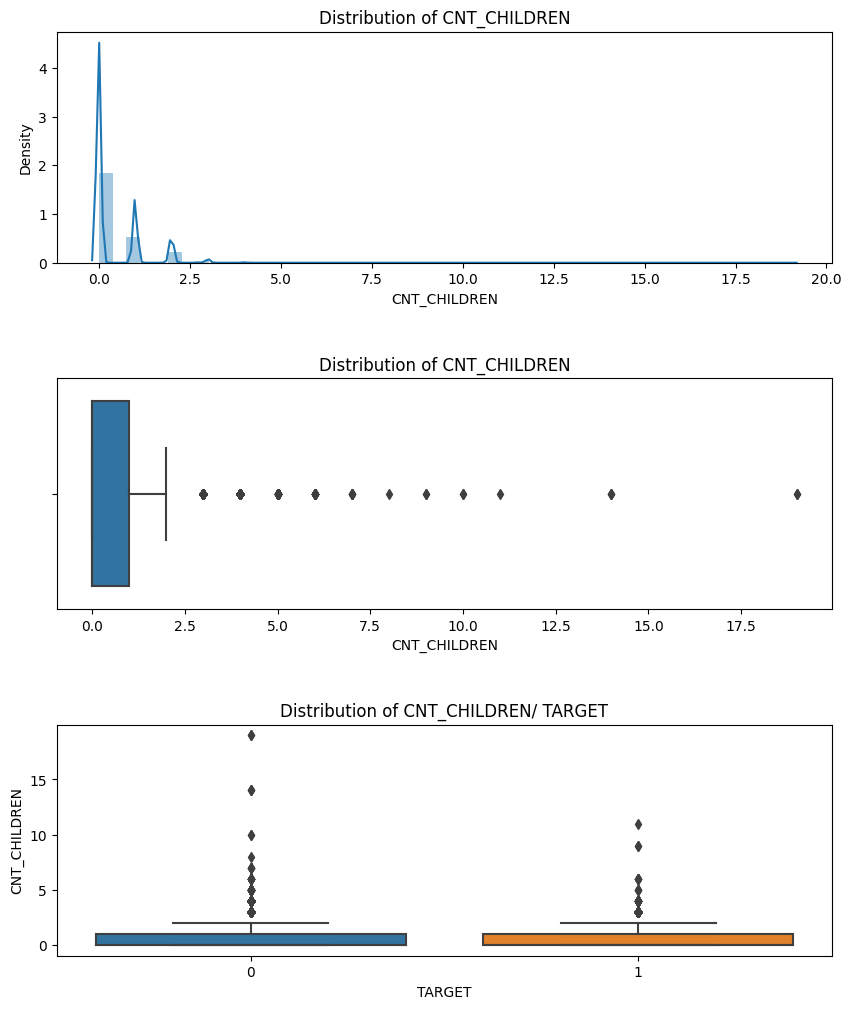

In [115]:
analyze_cont(numerical_features[21], eda_df)

# Analyzing Previous Application Data:

In [116]:
df2 = prev_apps.copy()

In [117]:
# check nulls
null_dist = df2.isna().mean() *100
null_dist

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

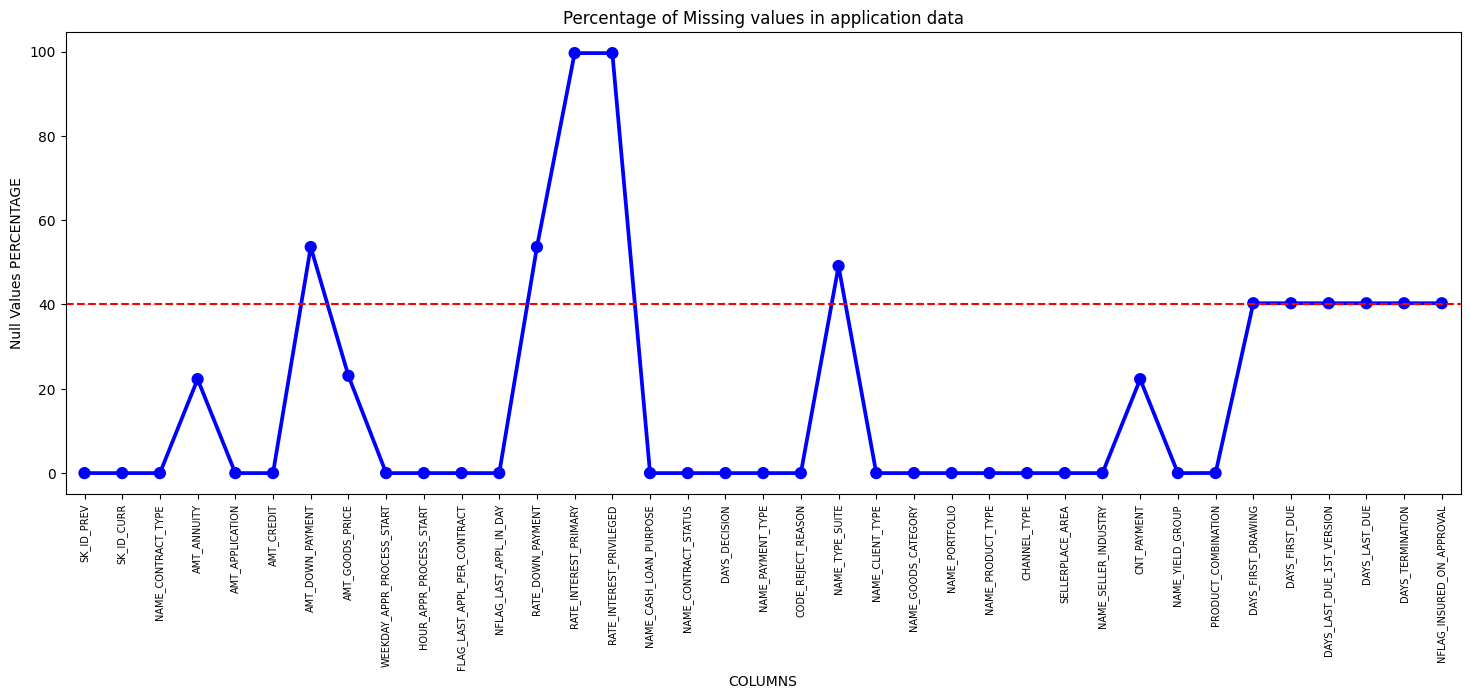

In [118]:
null_applicationDF = pd.DataFrame(null_dist).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [119]:
null_applicationDF[null_applicationDF['Null Values Percentage']> 40].shape

(11, 2)

In [120]:
null_applicationDF[null_applicationDF['Null Values Percentage']> 40]

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [121]:
df2[df2.isna().any(axis = 1)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0           2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1           0.000000               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater                Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle     POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                   XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action             Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high            Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle          Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs  

**Same as we did before we will drop columns with high nulls percentages.**

In [122]:
drop_cols = null_dist[null_dist > 40].index.tolist()
df2 = df2.drop(columns=drop_cols)
df2.shape

(1670214, 26)

In [123]:
# Fix Negatives
neg_cols = ['DAYS_DECISION', 'SELLERPLACE_AREA']
for col in neg_cols:
    df2[col] = abs(df2[col])

In [137]:
categorical_features = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT',
                       'NAME_CASH_LOAN_PURPOSE',
                        'NAME_CONTRACT_STATUS',
                        'NAME_PAYMENT_TYPE',
                        'CODE_REJECT_REASON',
                        'NAME_CLIENT_TYPE',
                        'NAME_GOODS_CATEGORY',
                        'NAME_PORTFOLIO',
                        'NAME_PRODUCT_TYPE',
                        'CHANNEL_TYPE',
                        'NAME_SELLER_INDUSTRY',
                        'NAME_YIELD_GROUP',
                        'PRODUCT_COMBINATION'
                    
                       ]

In [138]:
numerical_features= ['AMT_ANNUITY', 
                    'AMT_APPLICATION',
                     'AMT_CREDIT',
                     'AMT_GOODS_PRICE',
                     'HOUR_APPR_PROCESS_START',
                     'NFLAG_LAST_APPL_IN_DAY',
                     'DAYS_DECISION',
                     'SELLERPLACE_AREA',
                     'CNT_PAYMENT',
                    
                    ]

In [127]:
# We will get the TARGET from current applications
df1 = eda_df[['SK_ID_CURR', 'TARGET']]

In [128]:
combined_df = pd.merge(df1, df2, on ='SK_ID_CURR', how = 'inner')
combined_df.shape

(1130889, 27)

In [130]:
# Look at the number of applications that proceed the current application for each applicant
combined_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().sort_values()

SK_ID_CURR
249362     1
381581     1
153922     1
302167     1
153927     1
          ..
280586    61
345161    62
389950    64
242412    68
173680    72
Name: SK_ID_PREV, Length: 232825, dtype: int64

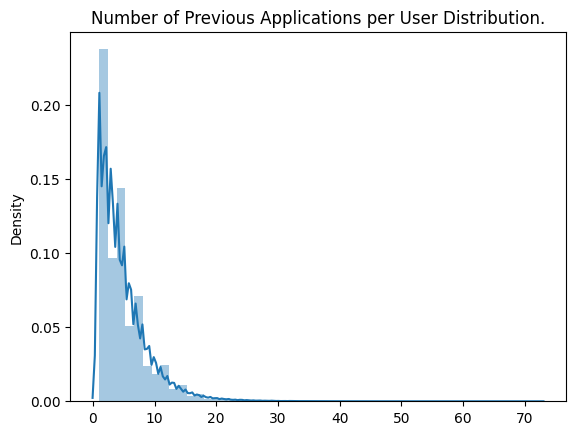

In [133]:
sns.distplot(combined_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().values)
plt.title('Number of Previous Applications per User Distribution.')
plt.show()

### Categorical Features:

In [139]:
len(categorical_features)

15

NAME_CONTRACT_TYPE distribution:

NAME_CONTRACT_TYPE
Cash loans         0.443921
Consumer loans     0.441940
Revolving loans    0.113930
XNA                0.000210
Name: proportion, dtype: float64

According to target:

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         0.909204
                    1         0.090796
Consumer loans      0         0.923021
                    1         0.076979
Revolving loans     0         0.895073
                    1         0.104927
XNA                 0         0.793249
                    1         0.206751
Name: proportion, dtype: float64



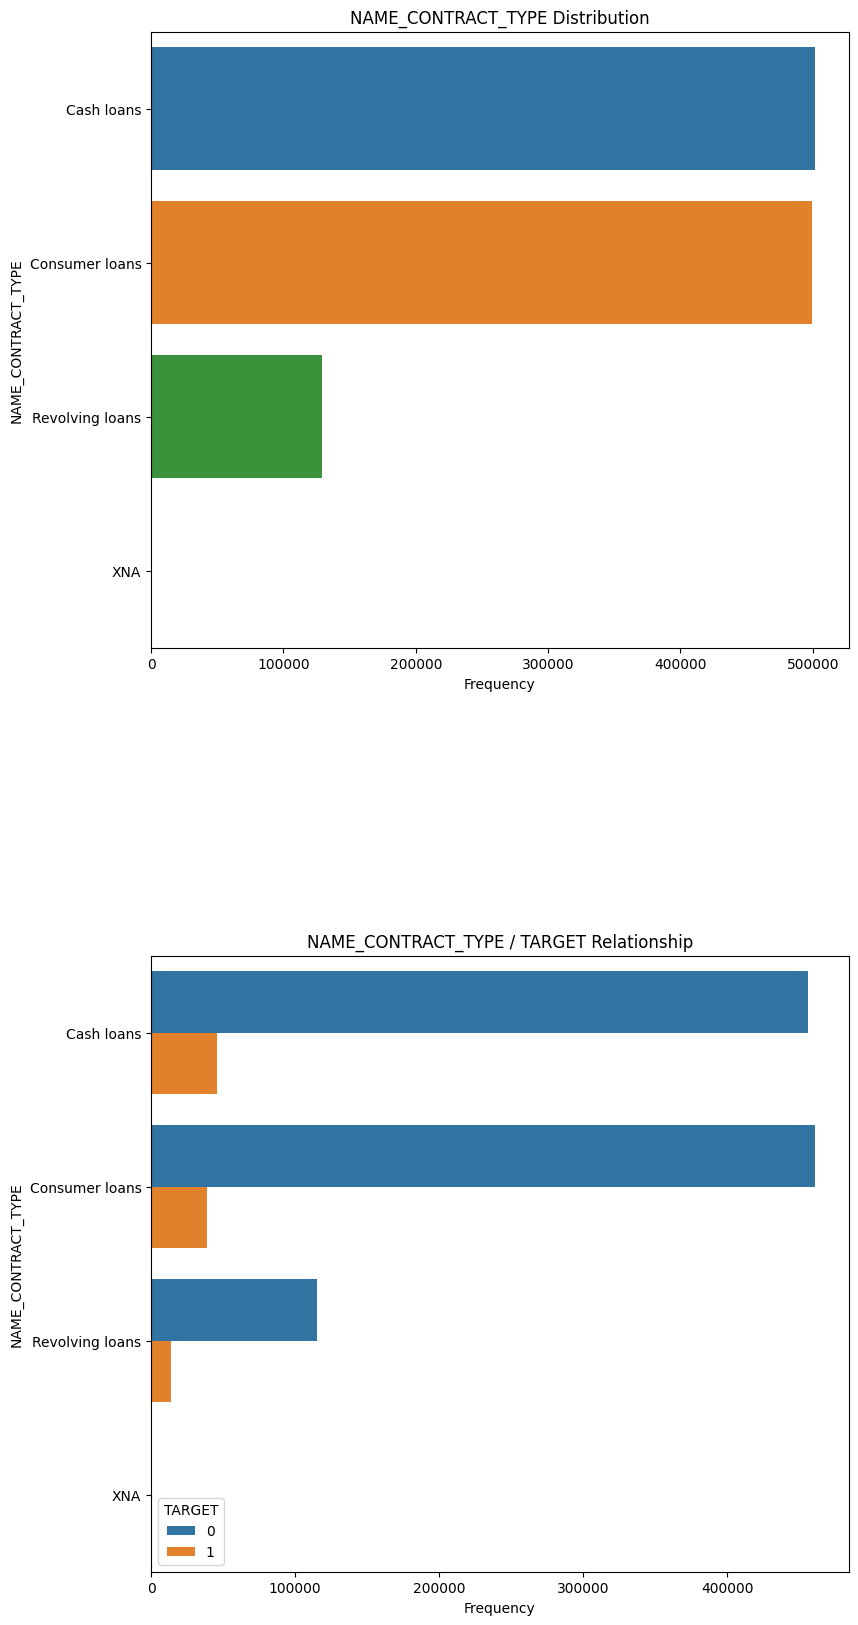

In [140]:
analyze_cat(categorical_features[0], combined_df)

WEEKDAY_APPR_PROCESS_START distribution:

WEEKDAY_APPR_PROCESS_START
WEDNESDAY    0.152440
MONDAY       0.152095
TUESDAY      0.151857
FRIDAY       0.150866
THURSDAY     0.149095
SATURDAY     0.144607
SUNDAY       0.099041
Name: proportion, dtype: float64

According to target:

WEEKDAY_APPR_PROCESS_START  TARGET
FRIDAY                      0         0.912504
                            1         0.087496
MONDAY                      0         0.911925
                            1         0.088075
SATURDAY                    0         0.916403
                            1         0.083597
SUNDAY                      0         0.919458
                            1         0.080542
THURSDAY                    0         0.911452
                            1         0.088548
TUESDAY                     0         0.912754
                            1         0.087246
WEDNESDAY                   0         0.913332
                            1         0.086668
Name: proportion, dtype: flo

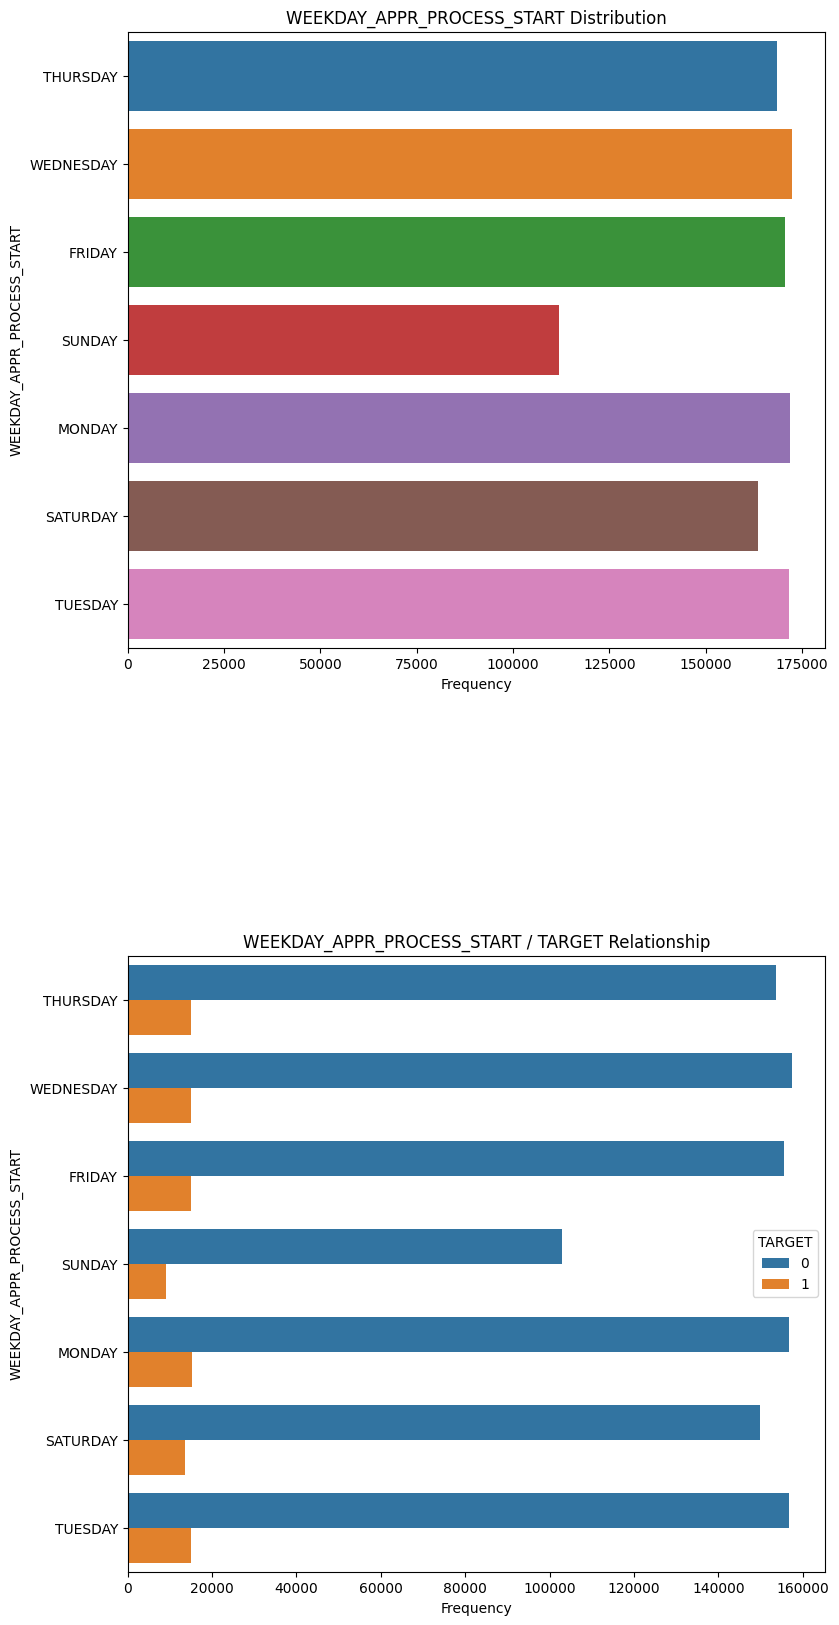

In [141]:
analyze_cat(categorical_features[1], combined_df)

FLAG_LAST_APPL_PER_CONTRACT distribution:

FLAG_LAST_APPL_PER_CONTRACT
Y    0.994768
N    0.005232
Name: proportion, dtype: float64

According to target:

FLAG_LAST_APPL_PER_CONTRACT  TARGET
N                            0         0.888626
                             1         0.111374
Y                            0         0.913808
                             1         0.086192
Name: proportion, dtype: float64



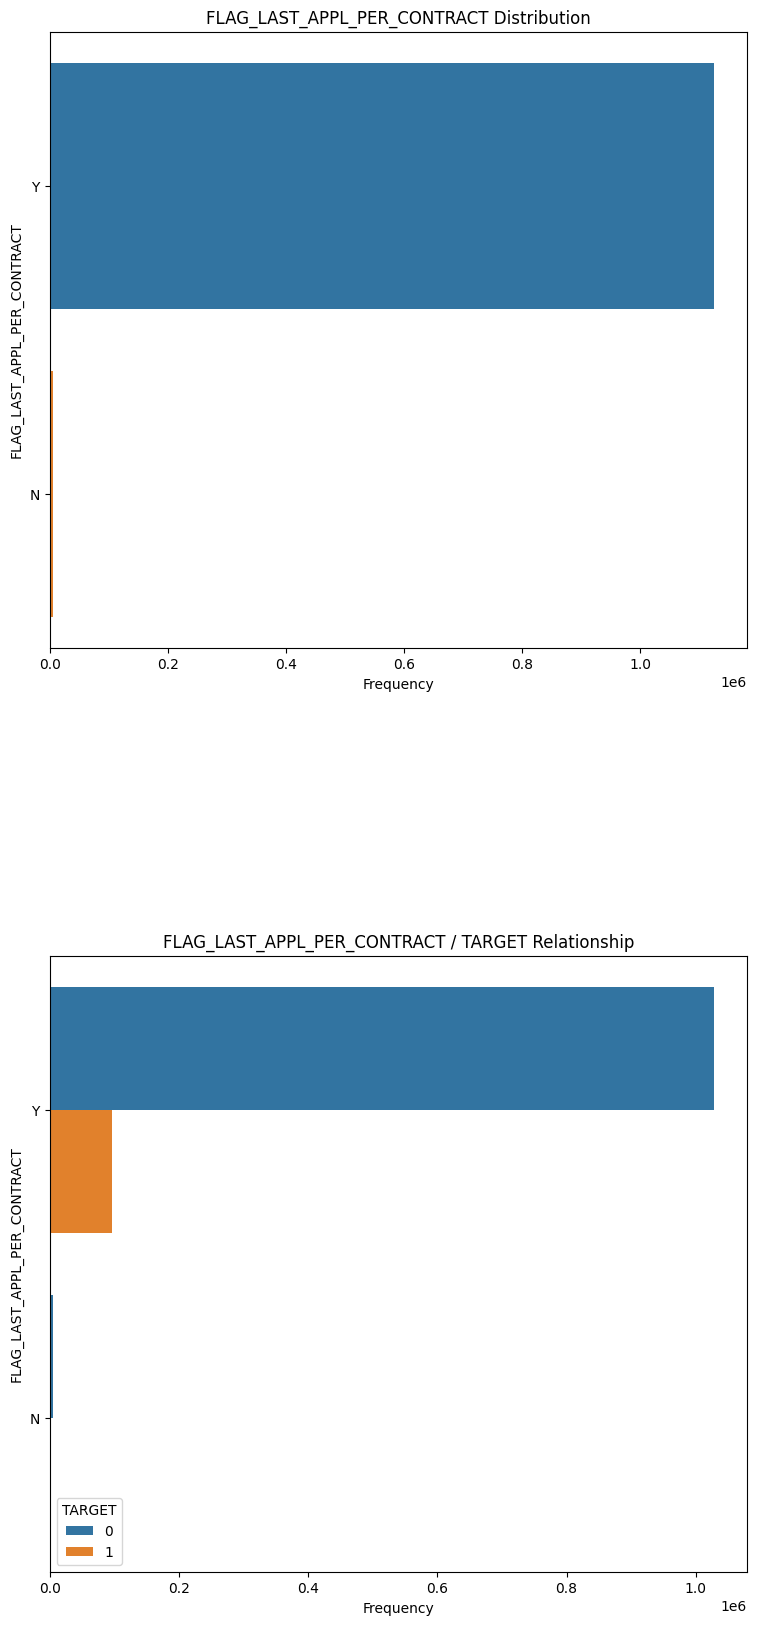

In [142]:
analyze_cat(categorical_features[2], combined_df)

In [ ]:
analyze_cat(categorical_features[3], combined_df)

NAME_CASH_LOAN_PURPOSE distribution:

NAME_CASH_LOAN_PURPOSE
XAP                                 0.556079
XNA                                 0.401984
Repairs                             0.014225
Other                               0.009476
Urgent needs                        0.005123
Buying a used car                   0.001764
Building a house or an annex        0.001650
Everyday expenses                   0.001455
Medicine                            0.001329
Payments on other loans             0.001104
Education                           0.000932
Journey                             0.000728
Purchase of electronic equipment    0.000660
Buying a new car                    0.000613
Wedding / gift / holiday            0.000564
Buying a home                       0.000497
Car repairs                         0.000491
Furniture                           0.000464
Buying a holiday home / land        0.000318
Business development                0.000240
Gasification / water supply         0.0

NAME_CONTRACT_STATUS distribution:

NAME_CONTRACT_STATUS
Approved        0.626807
Canceled        0.183618
Refused         0.173426
Unused offer    0.016149
Name: proportion, dtype: float64

According to target:

NAME_CONTRACT_STATUS  TARGET
Approved              0         0.924162
                      1         0.075838
Canceled              0         0.908616
                      1         0.091384
Refused               0         0.880801
                      1         0.119199
Unused offer          0         0.917264
                      1         0.082736
Name: proportion, dtype: float64



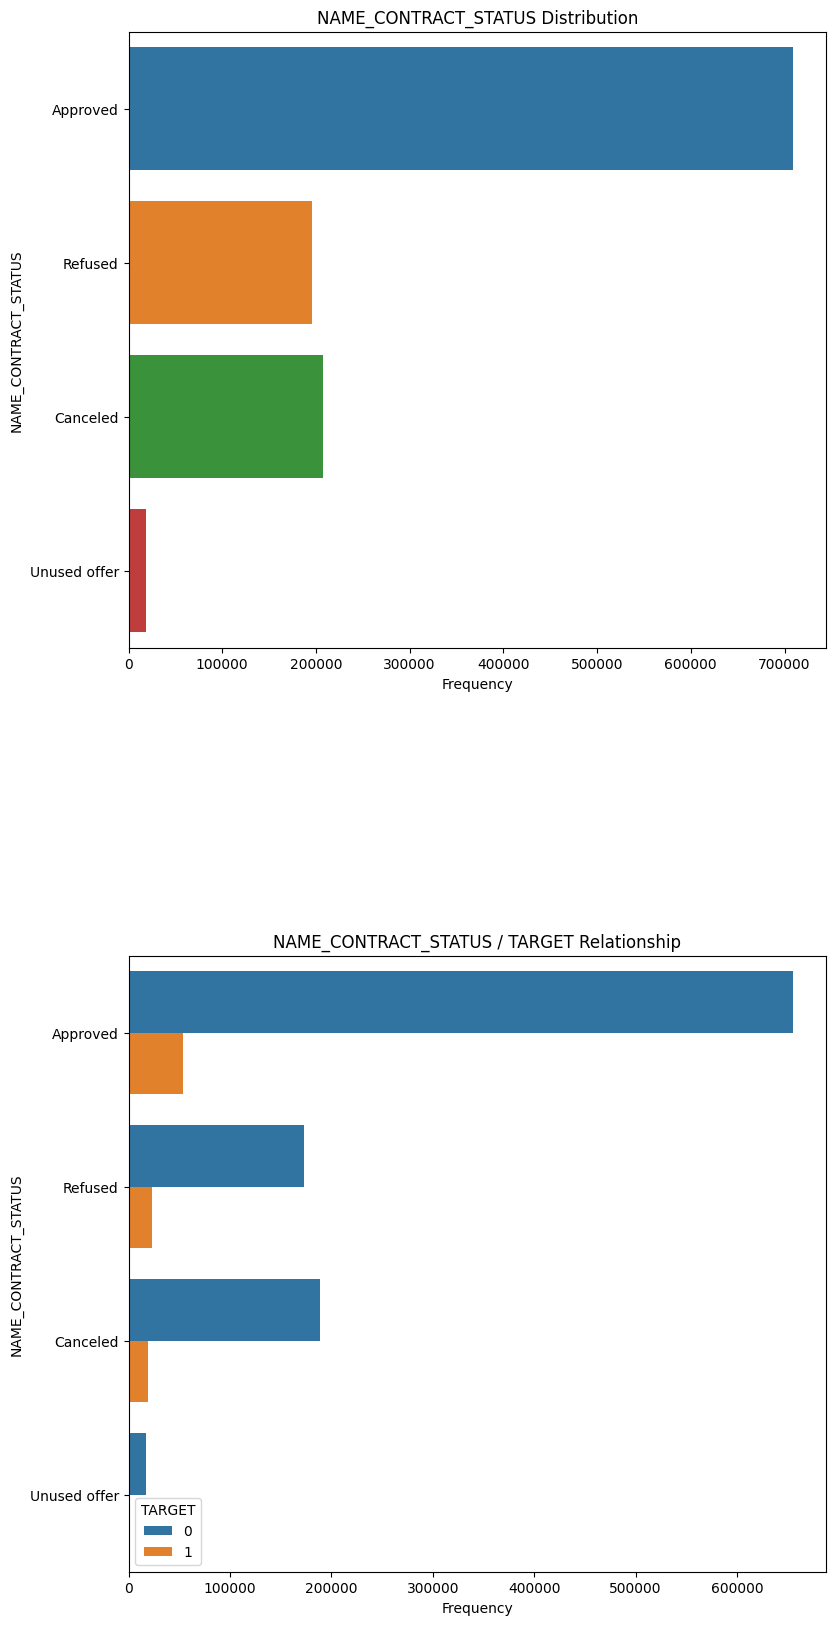

In [144]:
analyze_cat(categorical_features[4], combined_df)

NAME_PAYMENT_TYPE distribution:

NAME_PAYMENT_TYPE
Cash through the bank                        0.624383
XNA                                          0.369893
Non-cash from your account                   0.005048
Cashless from the account of the employer    0.000676
Name: proportion, dtype: float64

According to target:

NAME_PAYMENT_TYPE                          TARGET
Cash through the bank                      0         0.919256
                                           1         0.080744
Cashless from the account of the employer  0         0.916230
                                           1         0.083770
Non-cash from your account                 0         0.920476
                                           1         0.079524
XNA                                        0         0.904159
                                           1         0.095841
Name: proportion, dtype: float64



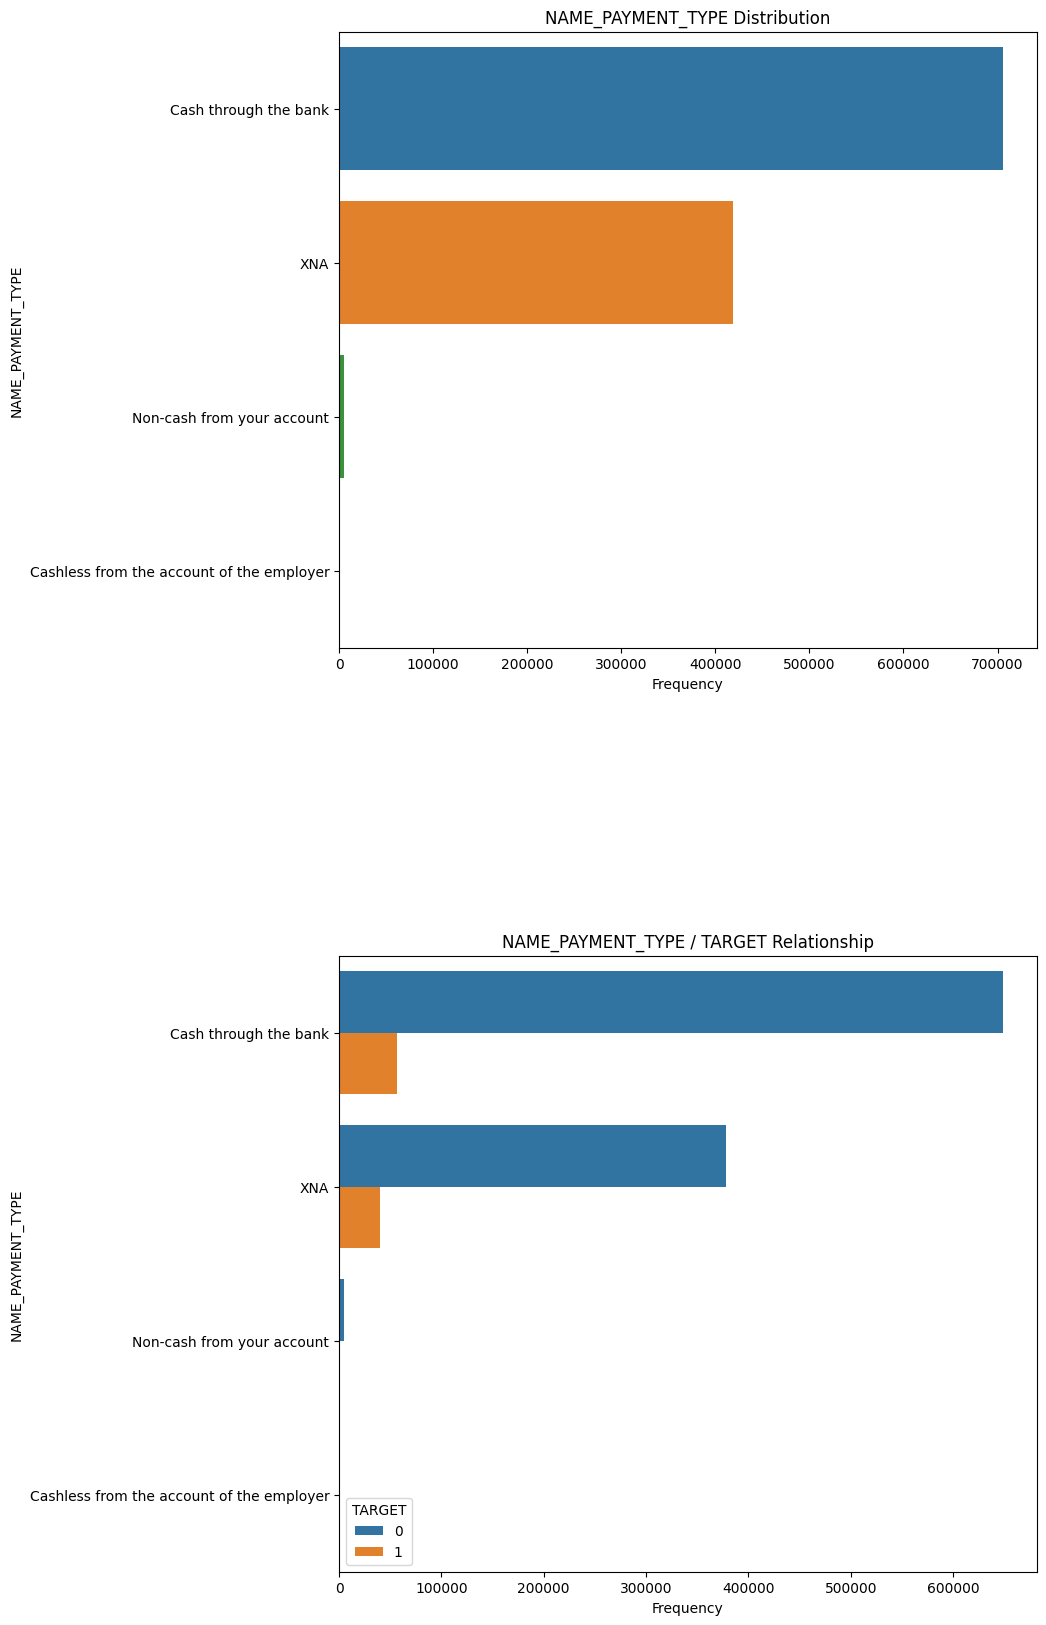

In [145]:
analyze_cat(categorical_features[5], combined_df)

CODE_REJECT_REASON distribution:

CODE_REJECT_REASON
XAP       0.810422
HC        0.103291
LIMIT     0.033635
SCO       0.023076
CLIENT    0.016149
SCOFR     0.007690
XNA       0.003113
VERIF     0.002168
SYSTEM    0.000455
Name: proportion, dtype: float64

According to target:

CODE_REJECT_REASON  TARGET
CLIENT              0         0.917264
                    1         0.082736
HC                  0         0.883513
                    1         0.116487
LIMIT               0         0.876068
                    1         0.123932
SCO                 0         0.899372
                    1         0.100628
SCOFR               0         0.791767
                    1         0.208233
SYSTEM              0         0.924272
                    1         0.075728
VERIF               0         0.914763
                    1         0.085237
XAP                 0         0.920639
                    1         0.079361
XNA                 0         0.894348
                    1         

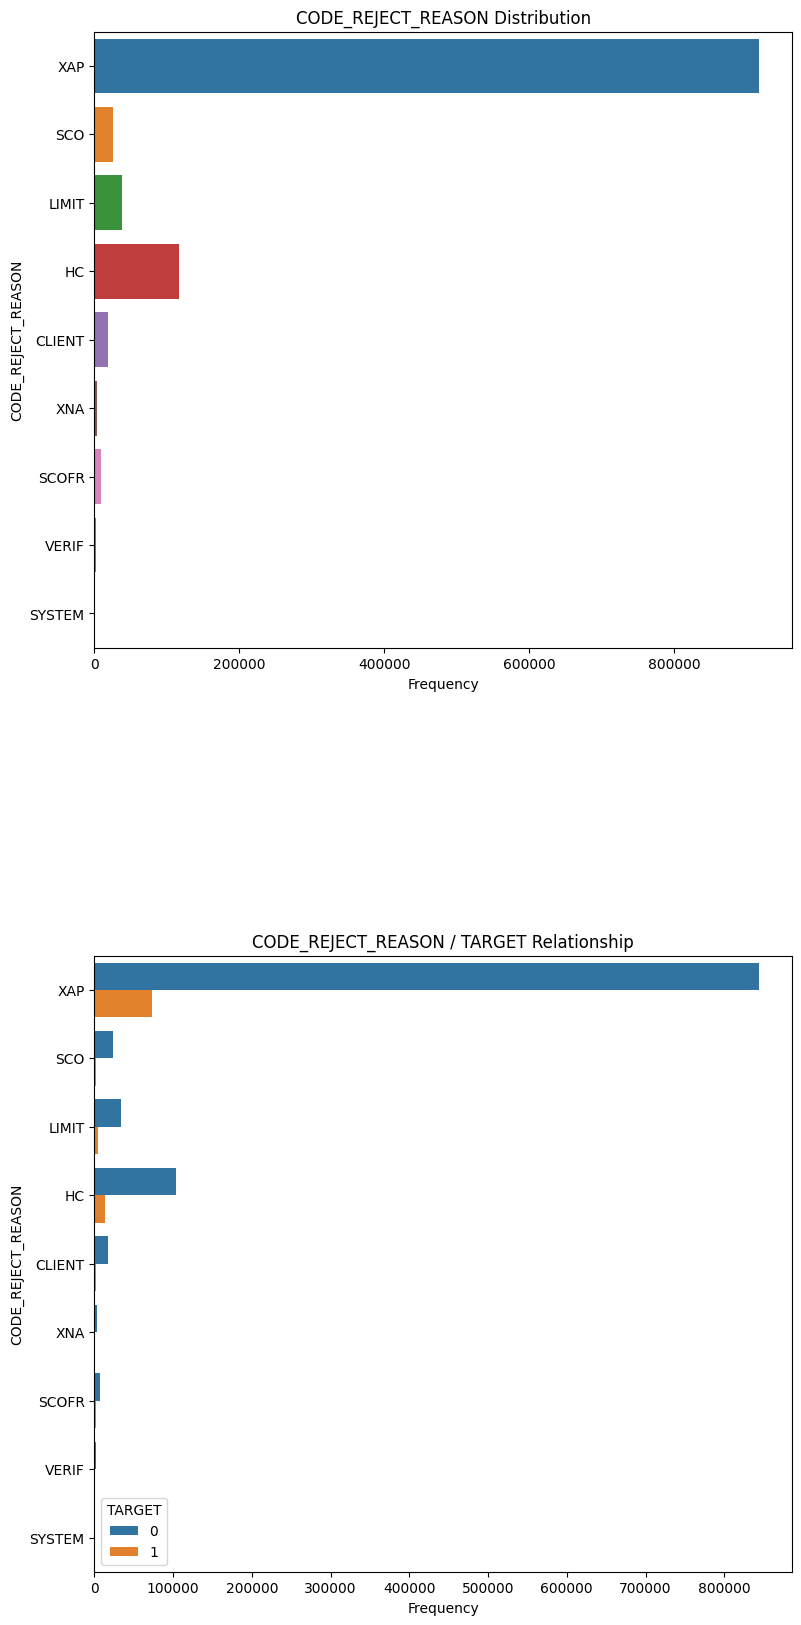

In [146]:
analyze_cat(categorical_features[6], combined_df)

NAME_CLIENT_TYPE distribution:

NAME_CLIENT_TYPE
Repeater     0.733963
New          0.183675
Refreshed    0.081261
XNA          0.001101
Name: proportion, dtype: float64

According to target:

NAME_CLIENT_TYPE  TARGET
New               0         0.909959
                  1         0.090041
Refreshed         0         0.926494
                  1         0.073506
Repeater          0         0.913206
                  1         0.086794
XNA               0         0.901205
                  1         0.098795
Name: proportion, dtype: float64



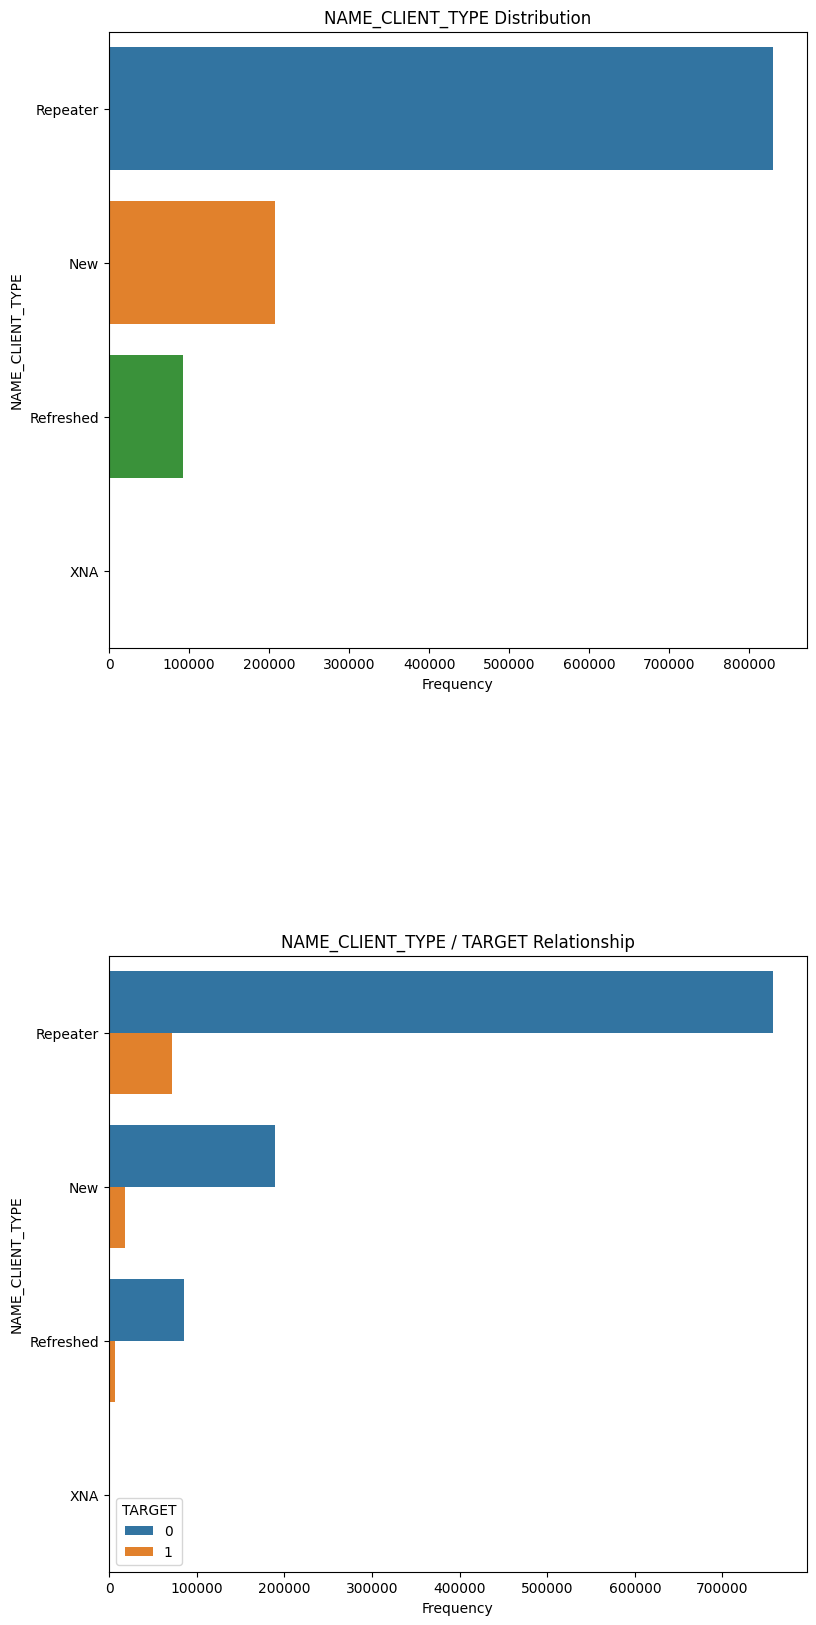

In [147]:
analyze_cat(categorical_features[7], combined_df)

In [ ]:
analyze_cat(categorical_features[8], combined_df)

NAME_GOODS_CATEGORY distribution:

NAME_GOODS_CATEGORY
XNA                         0.564261
Mobile                      0.136980
Consumer Electronics        0.073859
Computers                   0.063654
Audio/Video                 0.060434
Furniture                   0.032059
Photo / Cinema Equipment    0.015376
Construction Materials      0.015157
Clothing and Accessories    0.013860
Auto Accessories            0.004420
Jewelry                     0.003650
Homewares                   0.003047
Medical Supplies            0.002287
Vehicles                    0.001992
Sport and Leisure           0.001789
Other                       0.001659
Gardening                   0.001637
Office Appliances           0.001422
Tourism                     0.000960
Medicine                    0.000919
Direct Sales                0.000236
Fitness                     0.000118
Additional Service          0.000075
Education                   0.000060
Insurance                   0.000048
Weapon              

NAME_PORTFOLIO distribution:

NAME_PORTFOLIO
POS      0.418743
Cash     0.277448
XNA      0.217272
Cards    0.086280
Cars     0.000257
Name: proportion, dtype: float64

According to target:

NAME_PORTFOLIO  TARGET
Cards           0         0.898148
                1         0.101852
Cars            0         0.938144
                1         0.061856
Cash            0         0.911726
                1         0.088274
POS             0         0.923753
                1         0.076247
XNA             0         0.902881
                1         0.097119
Name: proportion, dtype: float64



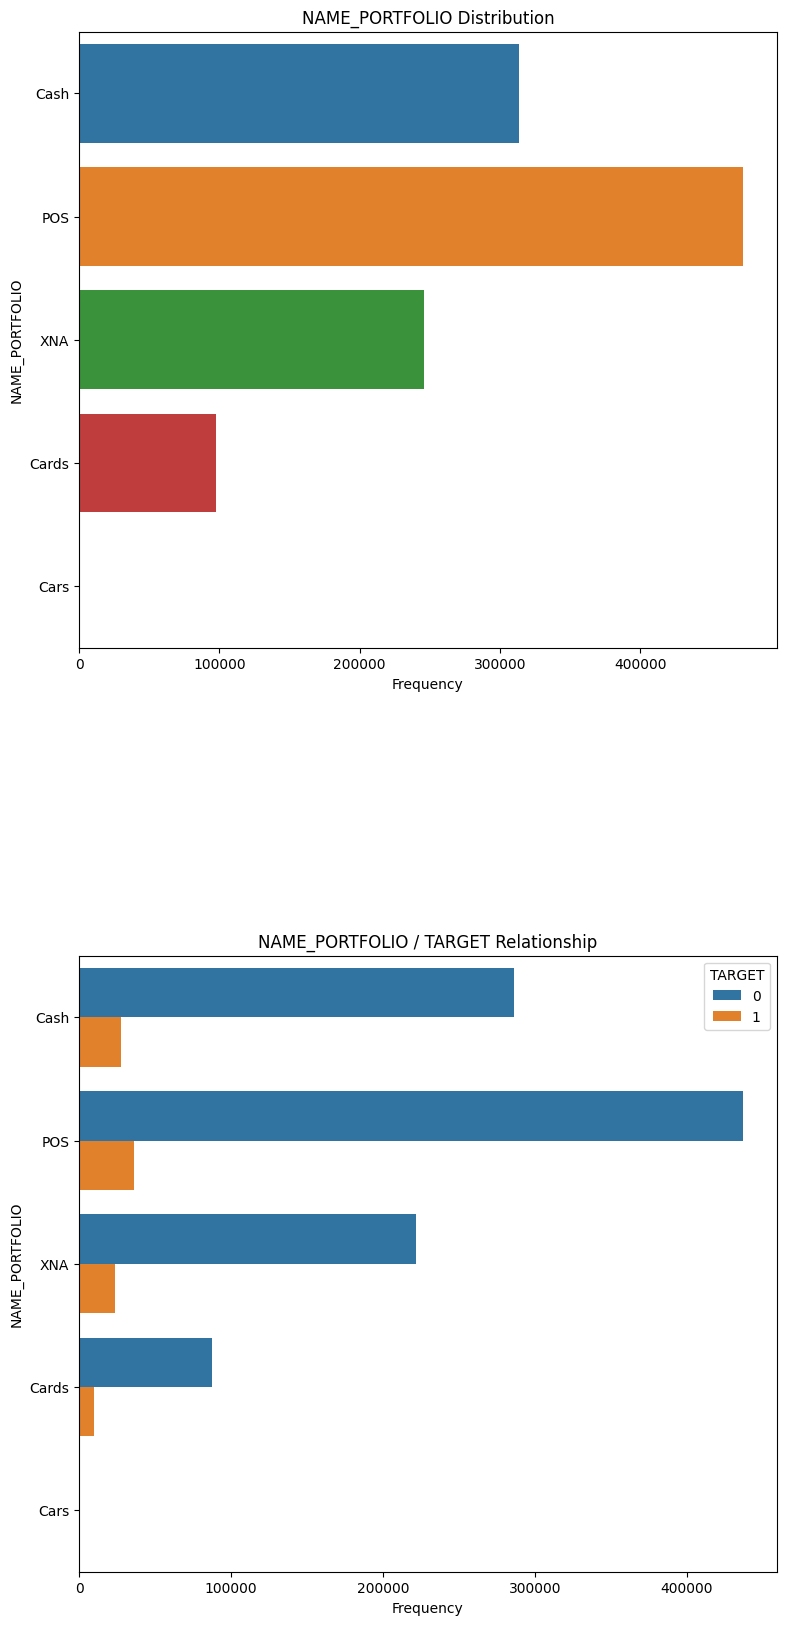

In [ ]:
analyze_cat(categorical_features[9], combined_df)

NAME_PRODUCT_TYPE distribution:

NAME_PRODUCT_TYPE
XNA        0.636272
x-sell     0.273163
walk-in    0.090565
Name: proportion, dtype: float64

According to target:

NAME_PRODUCT_TYPE  TARGET
XNA                0         0.916632
                   1         0.083368
walk-in            0         0.875072
                   1         0.124928
x-sell             0         0.919590
                   1         0.080410
Name: proportion, dtype: float64



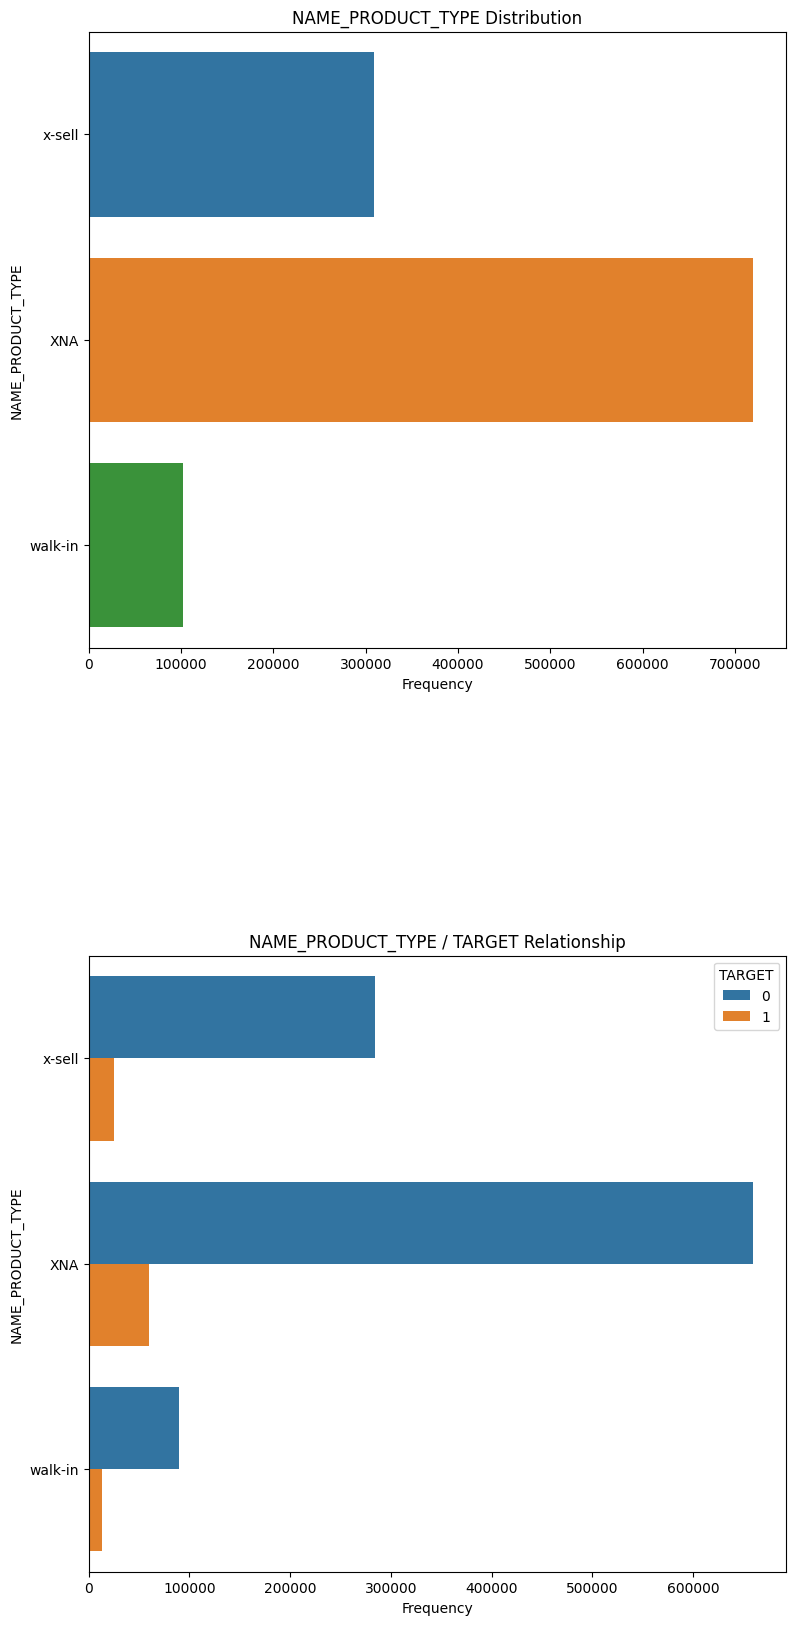

In [ ]:
analyze_cat(categorical_features[10], combined_df)

CHANNEL_TYPE distribution:

CHANNEL_TYPE
Credit and cash offices       0.425314
Country-wide                  0.299296
Stone                         0.129803
Regional / Local              0.065147
Contact center                0.041466
AP+ (Cash loan)               0.034982
Channel of corporate sales    0.003716
Car dealer                    0.000277
Name: proportion, dtype: float64

According to target:

CHANNEL_TYPE                TARGET
AP+ (Cash loan)             0         0.873739
                            1         0.126261
Car dealer                  0         0.942492
                            1         0.057508
Channel of corporate sales  0         0.938125
                            1         0.061875
Contact center              0         0.898535
                            1         0.101465
Country-wide                0         0.917322
                            1         0.082678
Credit and cash offices     0         0.909976
                            1         0

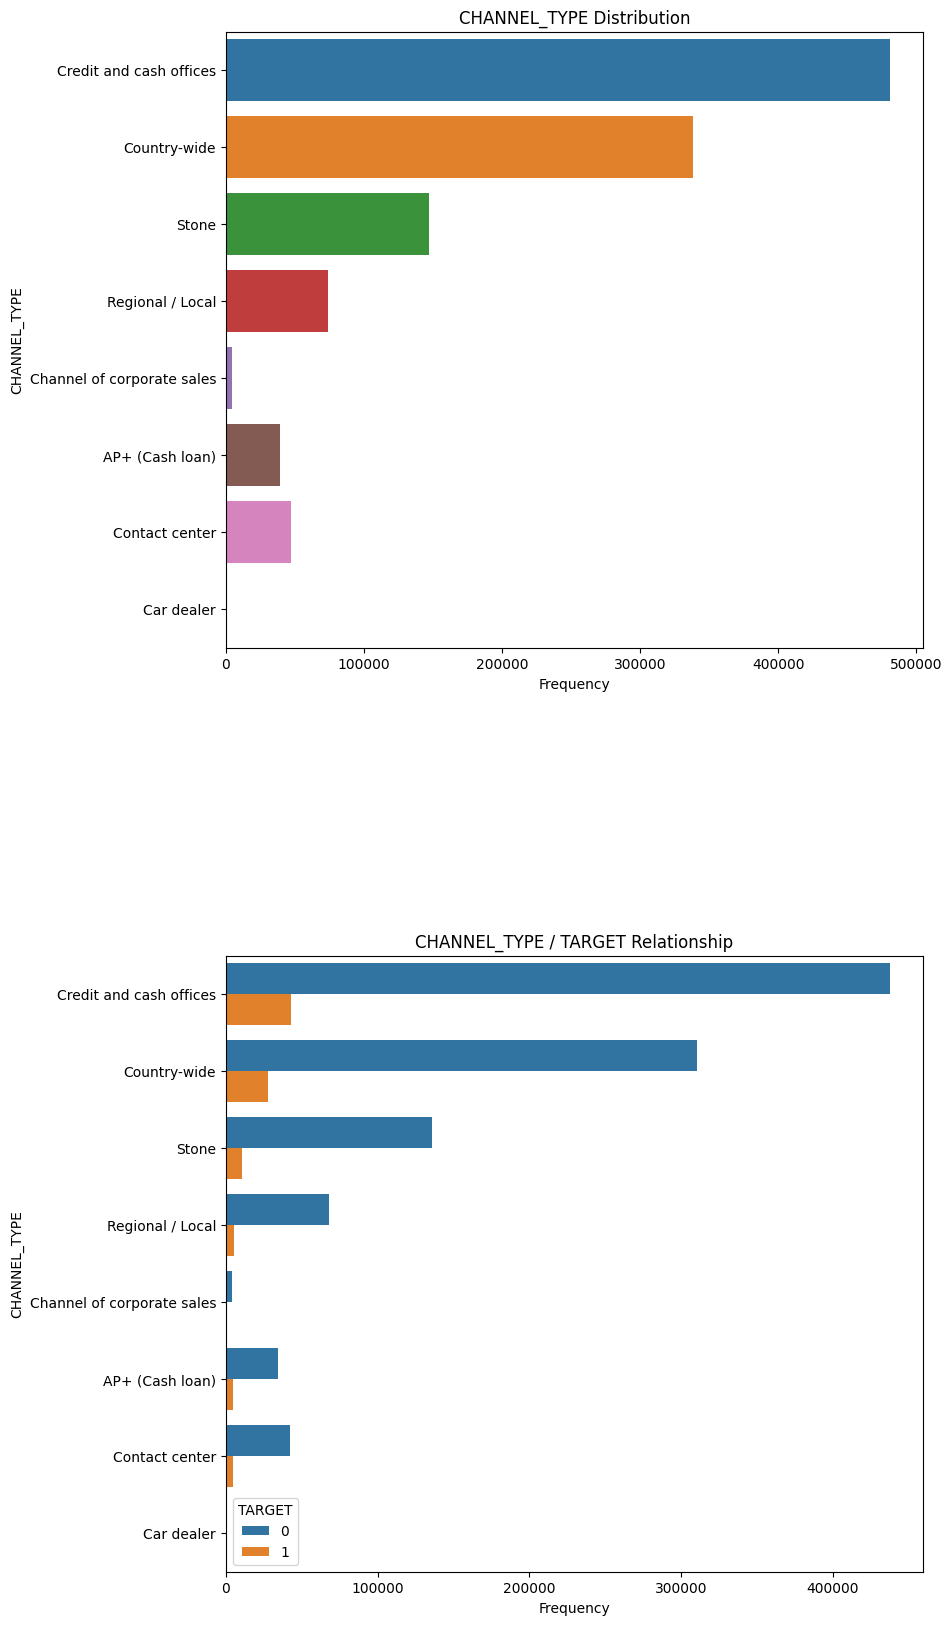

In [ ]:
analyze_cat(categorical_features[11], combined_df)

NAME_SELLER_INDUSTRY distribution:

NAME_SELLER_INDUSTRY
XNA                     0.506239
Consumer electronics    0.241412
Connectivity            0.168753
Furniture               0.034559
Construction            0.018041
Clothing                0.014056
Industry                0.011672
Auto technology         0.002862
Jewelry                 0.001490
MLM partners            0.000653
Tourism                 0.000264
Name: proportion, dtype: float64

According to target:

NAME_SELLER_INDUSTRY  TARGET
Auto technology       0         0.892184
                      1         0.107816
Clothing              0         0.944703
                      1         0.055297
Connectivity          0         0.907829
                      1         0.092171
Construction          0         0.934663
                      1         0.065337
Consumer electronics  0         0.924527
                      1         0.075473
Furniture             0         0.939742
                      1         0.060258
Ind

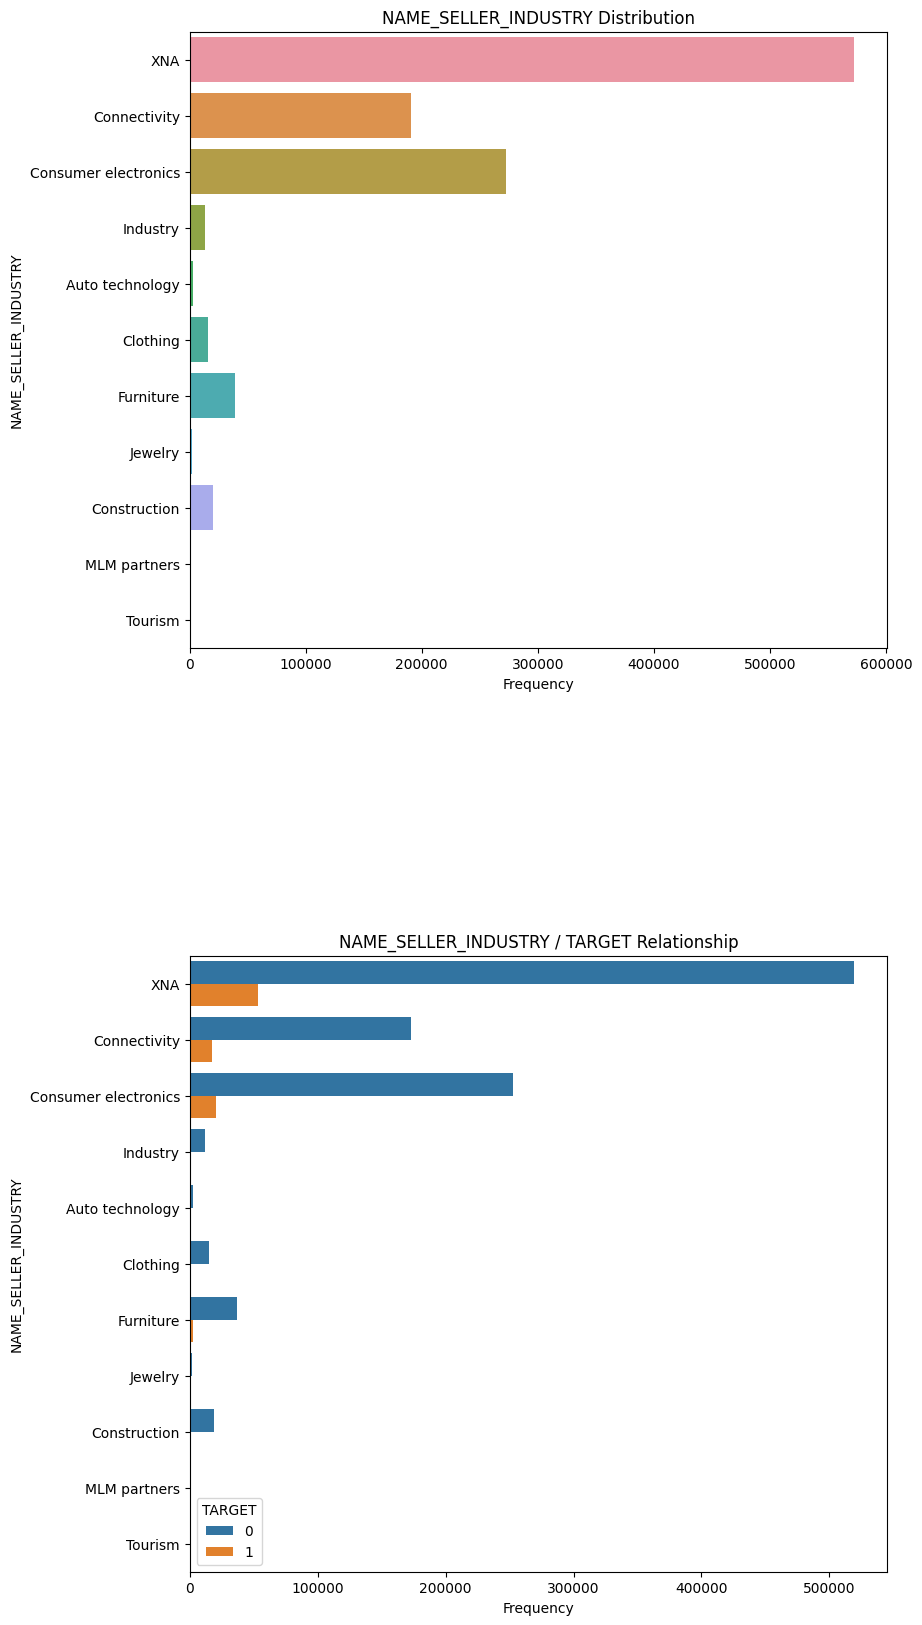

In [152]:
analyze_cat(categorical_features[12], combined_df)

NAME_YIELD_GROUP distribution:

NAME_YIELD_GROUP
XNA           0.303551
middle        0.230202
high          0.216448
low_normal    0.194360
low_action    0.055438
Name: proportion, dtype: float64

According to target:

NAME_YIELD_GROUP  TARGET
XNA               0         0.901536
                  1         0.098464
high              0         0.904114
                  1         0.095886
low_action        0         0.935751
                  1         0.064249
low_normal        0         0.929145
                  1         0.070855
middle            0         0.920298
                  1         0.079702
Name: proportion, dtype: float64



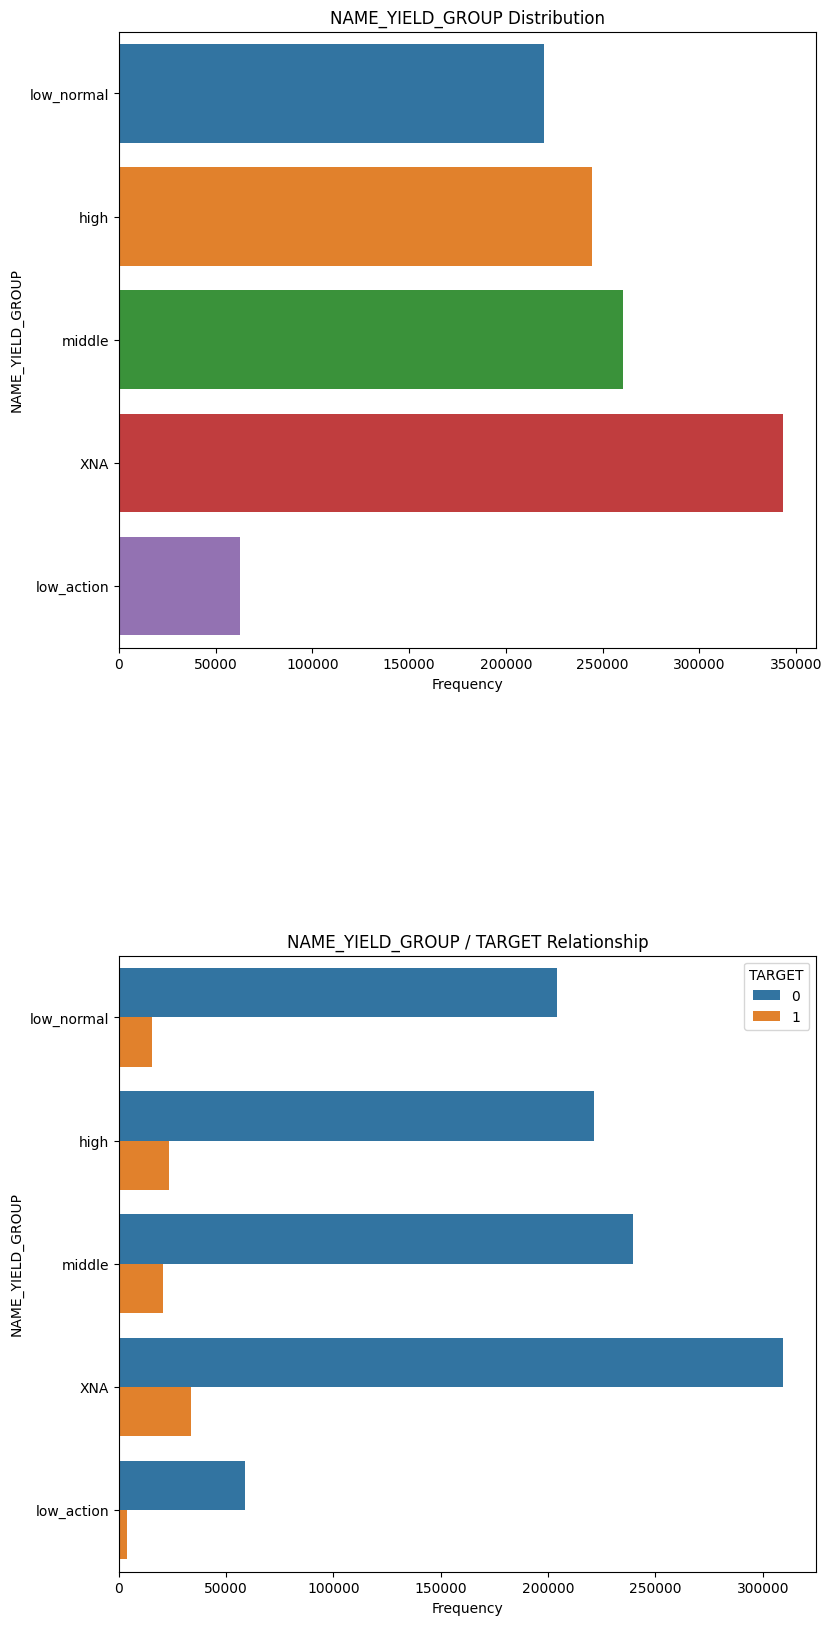

In [153]:
analyze_cat(categorical_features[13], combined_df)

PRODUCT_COMBINATION distribution:

PRODUCT_COMBINATION
Cash                              0.166507
POS household with interest       0.160086
POS mobile with interest          0.135210
Cash X-Sell: middle               0.085308
Cash X-Sell: low                  0.078455
Card Street                       0.066793
POS industry with interest        0.059031
POS household without interest    0.050437
Card X-Sell                       0.047160
Cash Street: high                 0.036577
Cash X-Sell: high                 0.035859
Cash Street: middle               0.021205
Cash Street: low                  0.020102
POS other with interest           0.014317
POS mobile without interest       0.014045
POS industry without interest     0.007430
POS others without interest       0.001476
Name: proportion, dtype: float64

According to target:

PRODUCT_COMBINATION             TARGET
Card Street                     0         0.887010
                                1         0.112990
Card X-Sell      

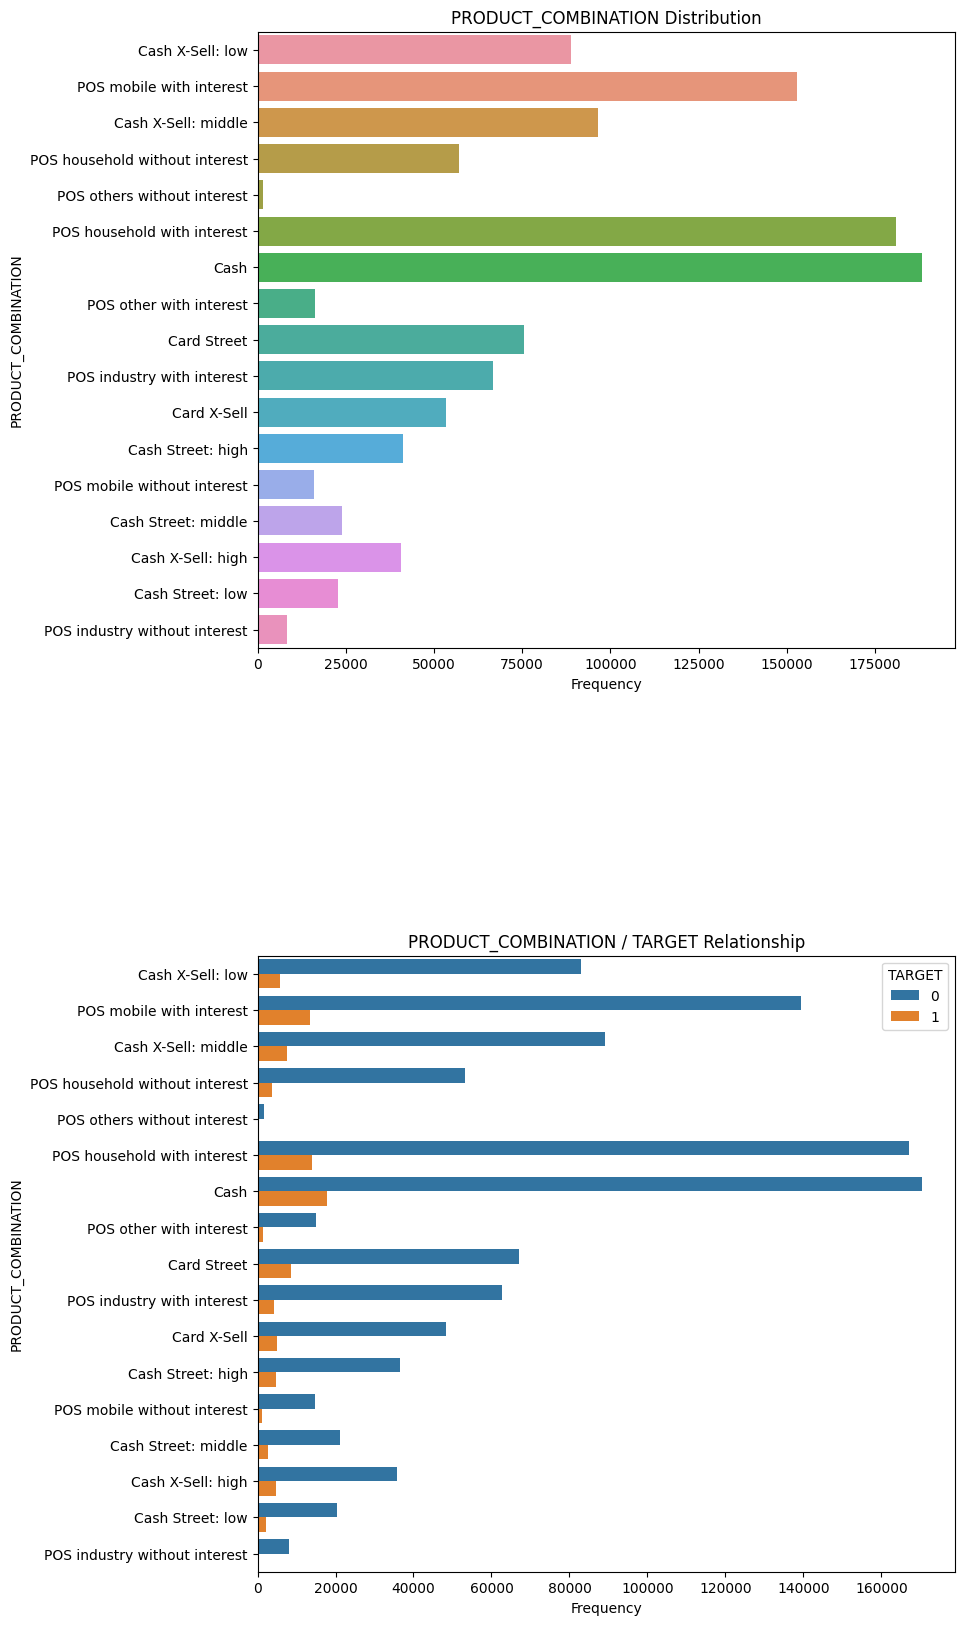

In [154]:
analyze_cat(categorical_features[14], combined_df)

### Numerical Features:

In [156]:
len(numerical_features)

9

AMT_ANNUITY Distribution:

count    885177.000000
mean      15838.366924
std       14737.528159
min           0.000000
25%        6251.940000
50%       11227.500000
75%       20416.635000
max      417927.645000
Name: AMT_ANNUITY, dtype: float64

According to target:
           count          mean           std  min         25%        50%        75%         max
TARGET                                                                                         
0       811417.0  15908.546372  14842.113877  0.0  6286.50000  11249.370  20490.885  417927.645
1        73760.0  15066.338756  13509.809939  0.0  5905.51875  10865.025  19828.485  281027.250


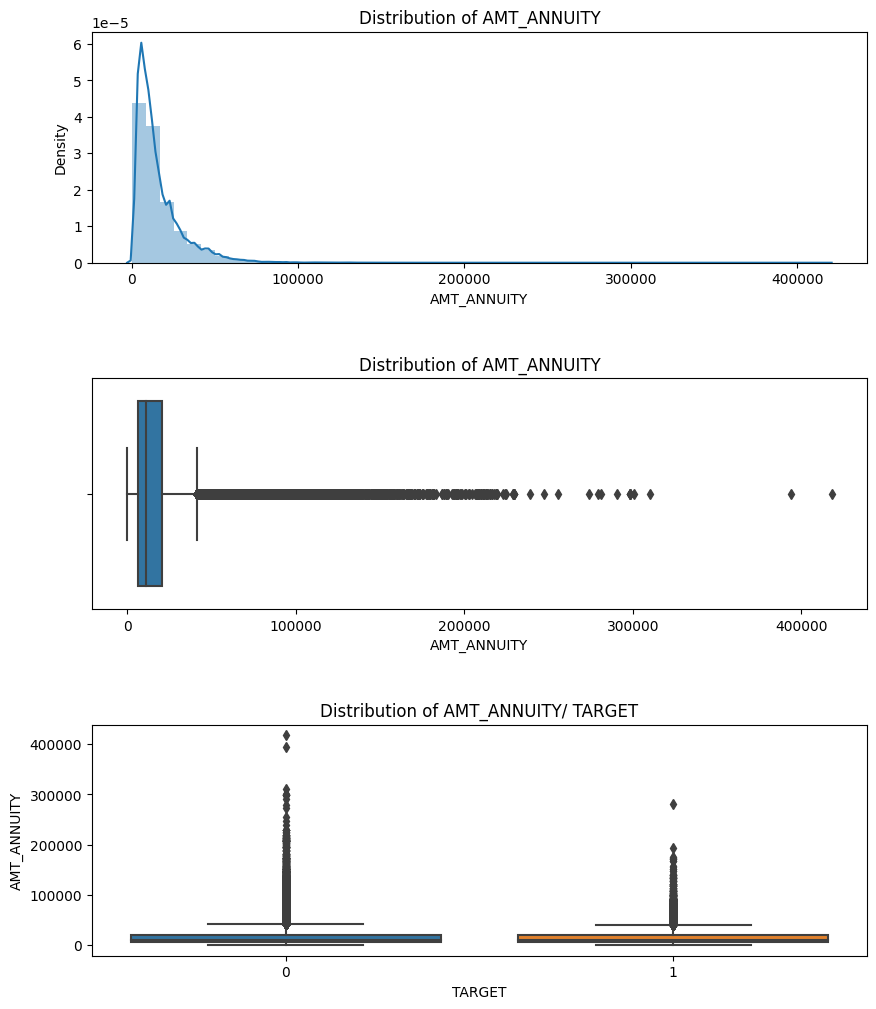

In [158]:
analyze_cont(numerical_features[0], combined_df)

AMT_APPLICATION Distribution:

count    1.130889e+06
mean     1.753338e+05
std      2.938614e+05
min      0.000000e+00
25%      1.975050e+04
50%      7.082550e+04
75%      1.800000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64

According to target:
            count           mean            std  min      25%      50%       75%        max
TARGET                                                                                     
0       1033266.0  175921.887243  294679.791179  0.0  20205.0  71667.0  180000.0  5850000.0
1         97623.0  169109.548338  284982.082645  0.0      0.0  66060.0  180000.0  3982500.0


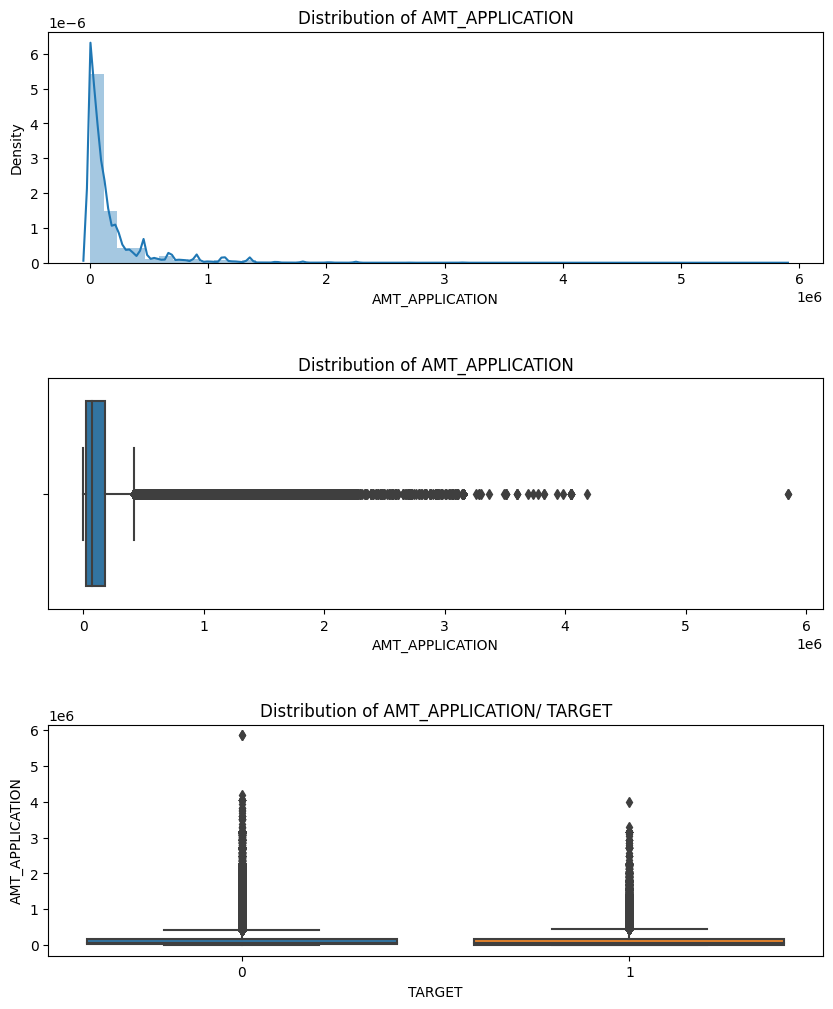

In [159]:
analyze_cont(numerical_features[1], combined_df)

AMT_CREDIT Distribution:

count    1.130888e+06
mean     1.964464e+05
std      3.196651e+05
min      0.000000e+00
25%      2.487600e+04
50%      8.060850e+04
75%      2.158065e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64

According to target:
            count           mean            std  min      25%      50%       75%        max
TARGET                                                                                     
0       1033266.0  196763.207180  320167.181487  0.0  25344.0  80995.5  215640.0  4509688.5
1         97622.0  193093.398296  314283.428246  0.0  20205.0  74488.5  225000.0  3524220.0


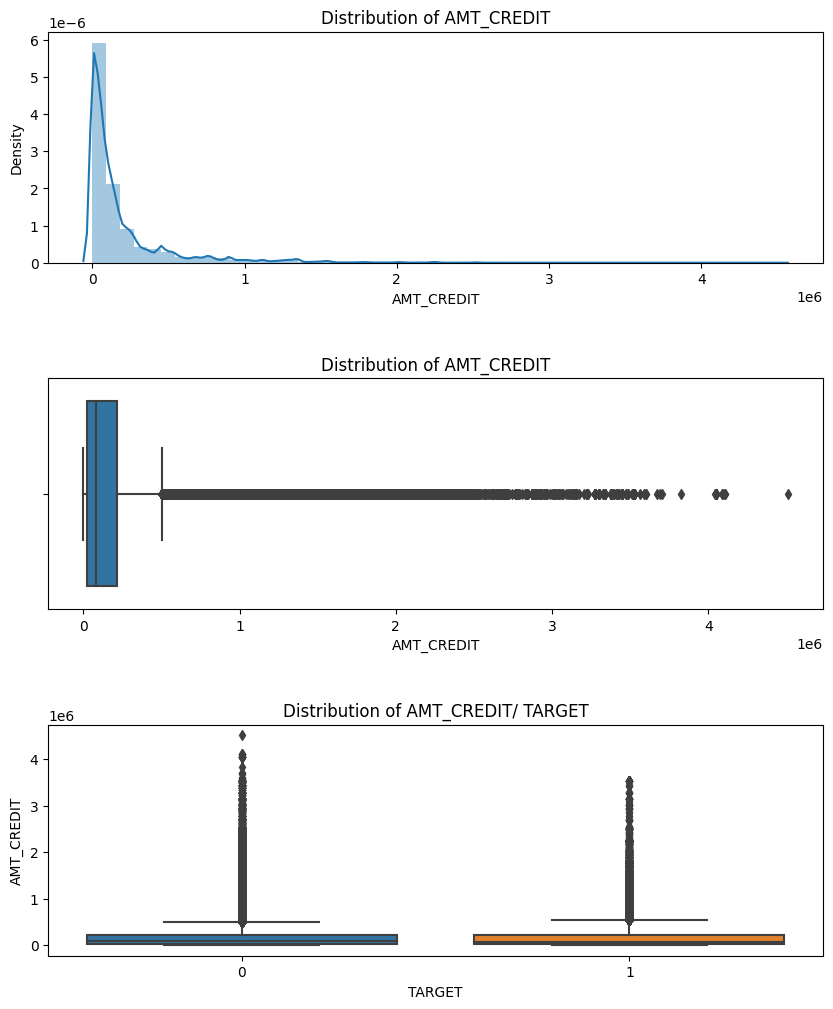

In [160]:
analyze_cont(numerical_features[2], combined_df)

AMT_GOODS_PRICE Distribution:

count    8.753450e+05
mean     2.265546e+05
std      3.162021e+05
min      0.000000e+00
25%      4.975650e+04
50%      1.102500e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64

According to target:
           count           mean            std  min      25%       50%        75%        max
TARGET                                                                                      
0       802161.0  226633.309578  316826.803494  0.0  50175.0  110250.0  229500.00  5850000.0
1        73184.0  225691.598401  309272.303935  0.0  46305.0  110700.0  236013.75  3982500.0


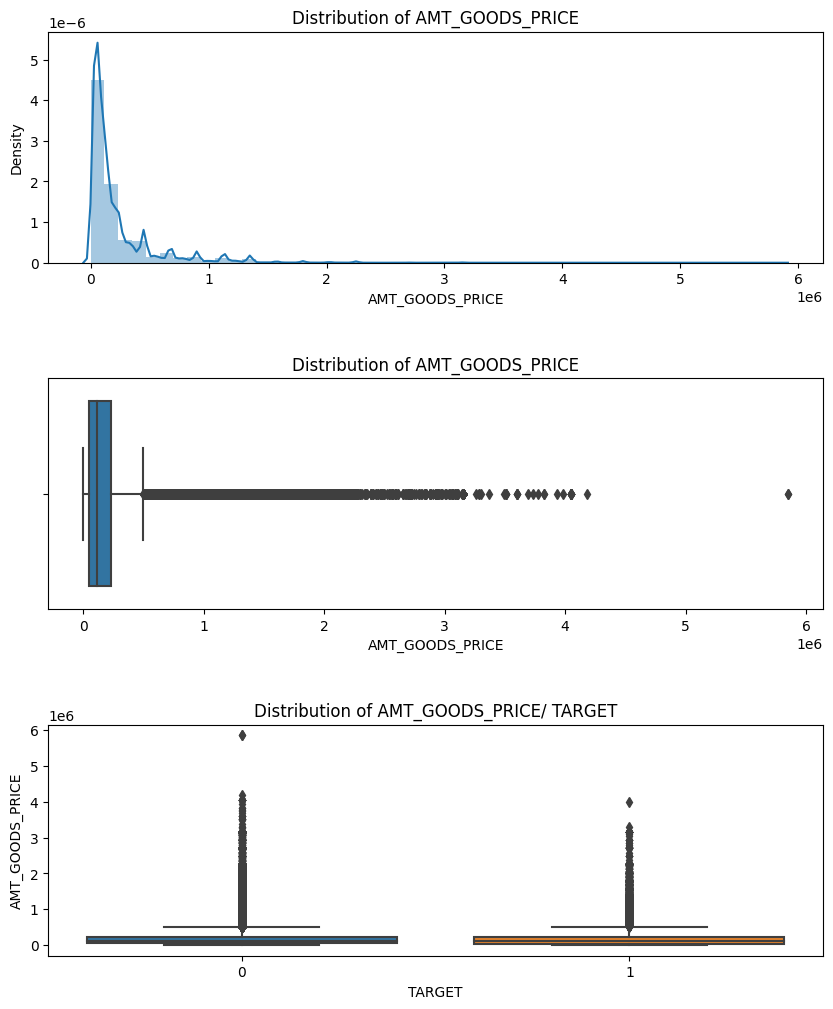

In [161]:
analyze_cont(numerical_features[3], combined_df)

HOUR_APPR_PROCESS_START Distribution:

count    1.130889e+06
mean     1.247646e+01
std      3.330392e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64

According to target:
            count       mean       std  min   25%   50%   75%   max
TARGET                                                             
0       1033266.0  12.502939  3.328110  0.0  10.0  12.0  15.0  23.0
1         97623.0  12.196204  3.341631  0.0  10.0  12.0  15.0  23.0


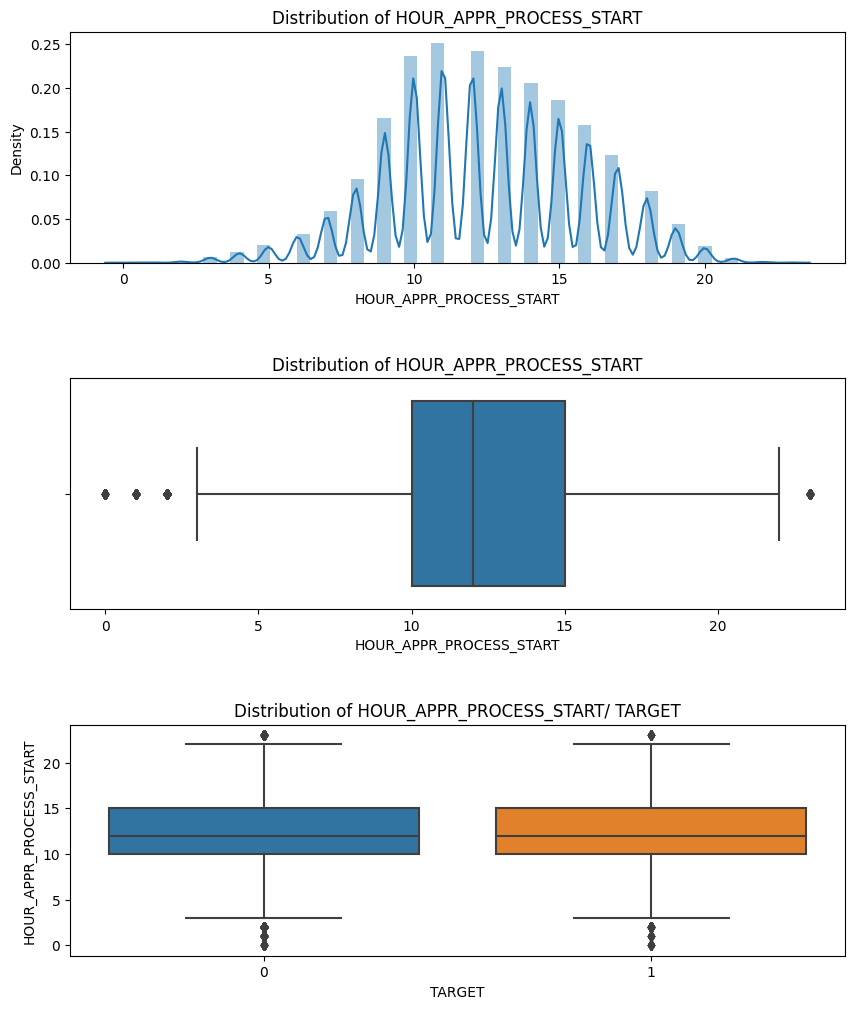

In [162]:
analyze_cont(numerical_features[4], combined_df)

NFLAG_LAST_APPL_IN_DAY Distribution:

count    1.130889e+06
mean     9.963905e-01
std      5.997103e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

According to target:
            count      mean       std  min  25%  50%  75%  max
TARGET                                                        
0       1033266.0  0.996452  0.059459  0.0  1.0  1.0  1.0  1.0
1         97623.0  0.995739  0.065140  0.0  1.0  1.0  1.0  1.0


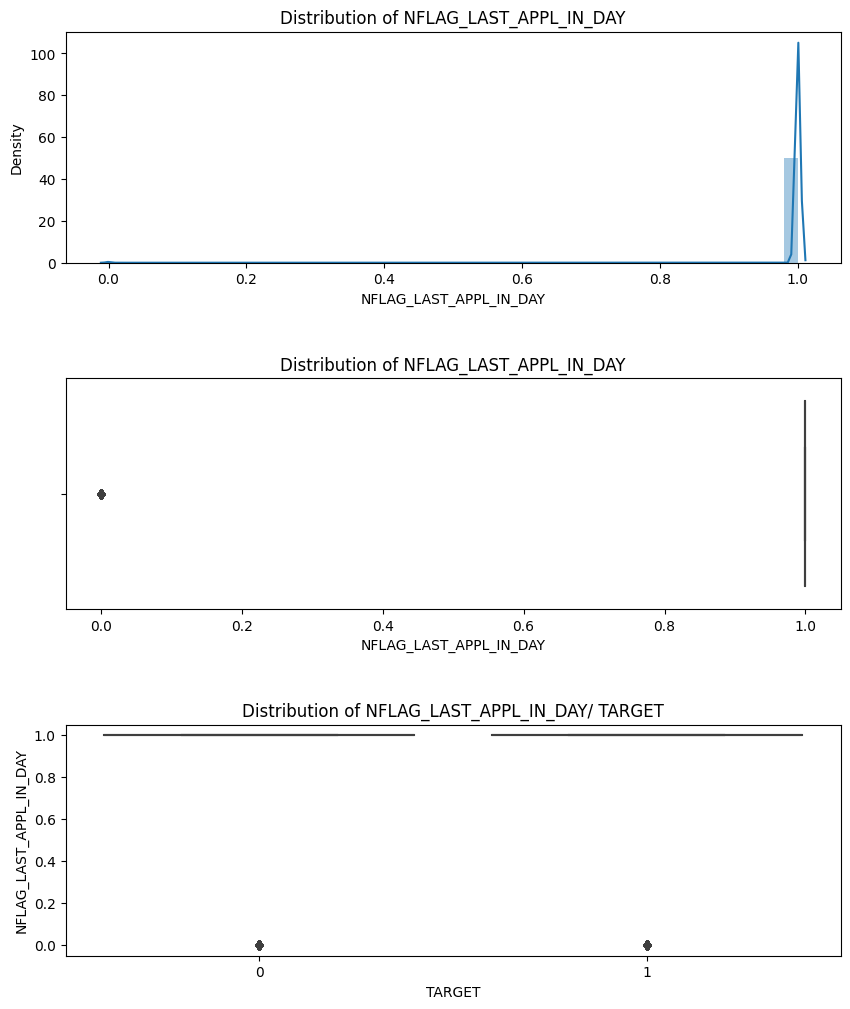

In [163]:
analyze_cont(numerical_features[5], combined_df)

DAYS_DECISION Distribution:

count    1.130889e+06
mean     8.803161e+02
std      7.836529e+02
min      1.000000e+00
25%      2.710000e+02
50%      5.820000e+02
75%      1.313000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

According to target:
            count        mean         std  min    25%    50%     75%     max
TARGET                                                                      
0       1033266.0  889.551140  787.712111  1.0  273.0  593.0  1335.0  2922.0
1         97623.0  782.569671  732.221666  2.0  251.0  492.0  1078.0  2922.0


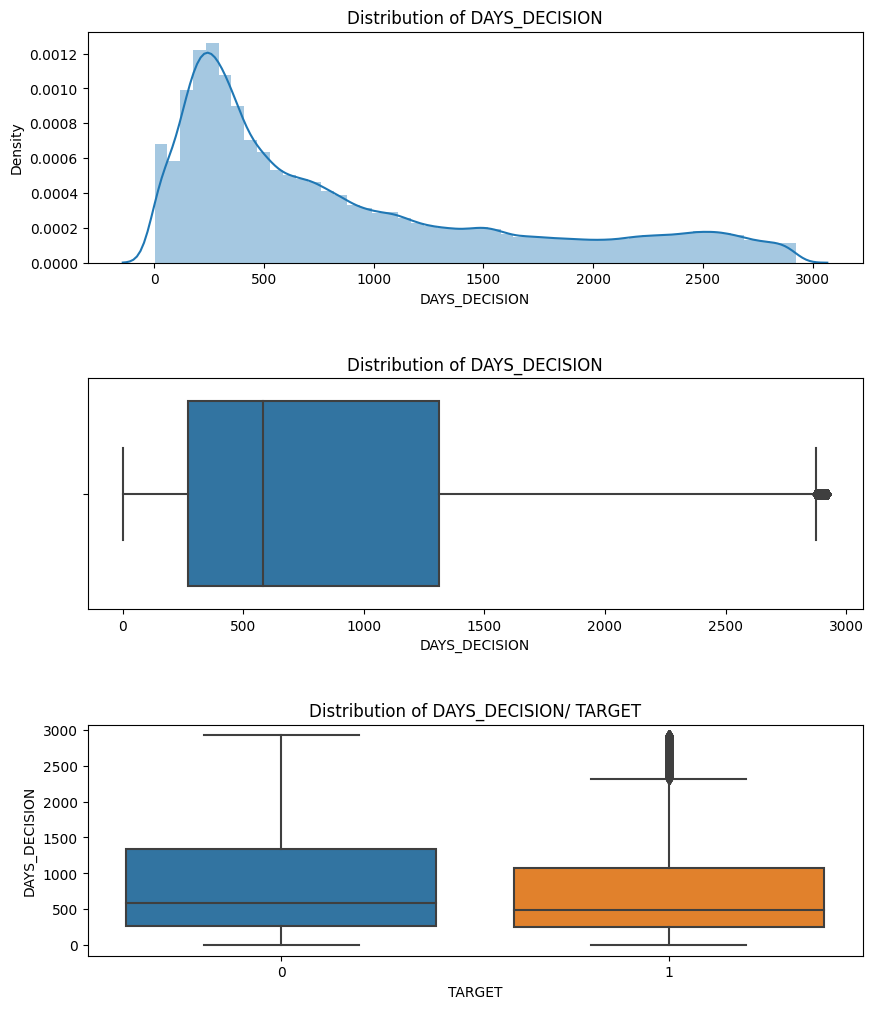

In [164]:
analyze_cont(numerical_features[6], combined_df)

SELLERPLACE_AREA Distribution:

count    1.130889e+06
mean     3.176314e+02
std      7.701066e+03
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      8.500000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

According to target:
            count        mean          std  min  25%  50%   75%        max
TARGET                                                                    
0       1033266.0  323.345345  8043.351258  0.0  1.0  4.0  90.0  4000000.0
1         97623.0  257.153601  1504.383848  0.0  1.0  1.0  56.0    74625.0


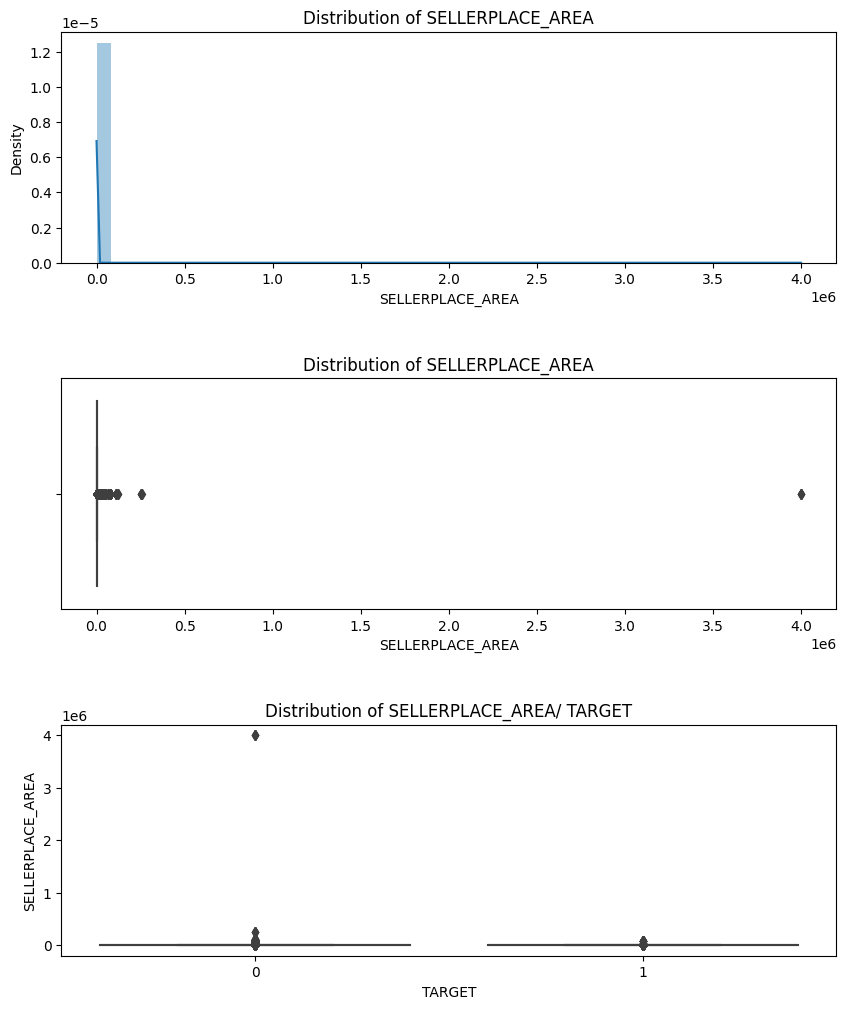

In [165]:
analyze_cont(numerical_features[7], combined_df)

CNT_PAYMENT Distribution:

count    885179.000000
mean         16.059594
std          14.567414
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

According to target:
           count       mean        std  min  25%   50%   75%   max
TARGET                                                            
0       811419.0  15.930511  14.426315  0.0  6.0  12.0  24.0  84.0
1        73760.0  17.479610  15.969257  0.0  6.0  12.0  24.0  84.0


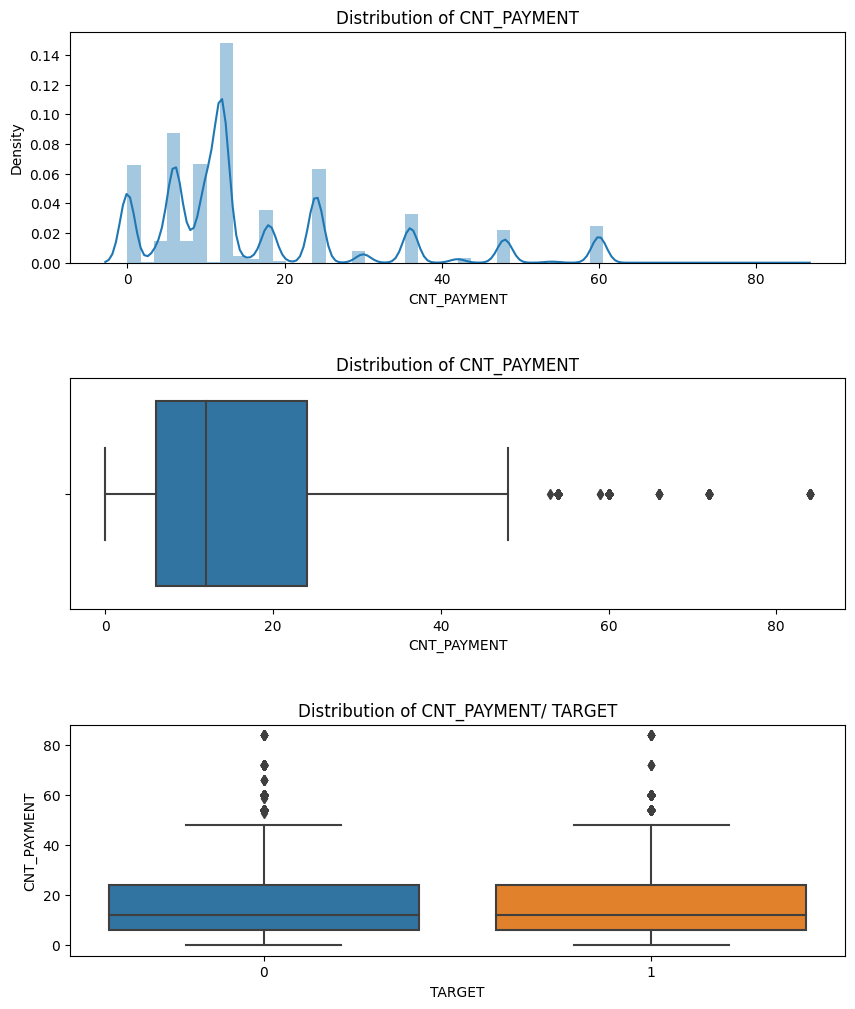

In [166]:
analyze_cont(numerical_features[8], combined_df)

**Analyzing previous applications doesn't show any interesting patterns for further investigation. However, some features may be important if accompanied with information about the users, whether they repayed or defaulted.**

**For modeling: I will use only some features from current applications, that show potential predictive power and test them more. For historical applications: I will drop them.**